# Precios de la vivienda: Técnicas avanzadas de regresión

### Descripción del problema
> En este proyecto, trabajaremos con el dataset de la competencia de Kaggle ["House Prices: Advanced Regression Techniques"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). El objetivo es predecir el precio de las viviendas en Ames, Iowa, utilizando técnicas avanzadas de regresión. Este dataset contiene 79 variables explicativas que describen aspectos de las viviendas, como el tamaño, la ubicación, la calidad de construcción, entre otros.

### Objetivo
> Construir un modelo de regresión que prediga con precisión el precio de las viviendas (`SalePrice`) basado en las características proporcionadas.


# Librerias

In [1]:
import pandas as pd
import zipfile

from utils_EDA import (analizar_columna_num, transformar_y_graficar_violin,
                       graficar_scatterplot, categorizaciones)


# Datos

In [4]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
with zipfile.ZipFile('house-prices-advanced-regression-techniques.zip', 'r') as zip_ref:
    zip_ref.extractall('../data')

In [2]:
data_train = pd.read_csv('../data/train.csv')
data_train.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0   1          60       RL         65.0     8450   Pave   NaN      Reg  \
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold   
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2  \
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

In [3]:
data_train.shape

(1460, 81)

# EDA

In [4]:
data_train.describe(include=['object'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig   
count      1460   1460    91     1460        1460      1460      1460  \
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish   
count       1460         1460       1460  ...       1379         1379  \
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType   
count        1379       1379       1460      7    281          54     1460  \
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

In [5]:
data_train.describe(include=['int64', 'float64'])

Id   MSSubClass  LotFrontage        LotArea  OverallQual   
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  \
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...   
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...  \
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch   
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  \
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

#### Datos Faltantes

In [6]:
null_counts = (data_train.isnull().sum() / len(data_train)) * 100
null_counts[null_counts > 0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

> **Existen variables con un alto porcentaje de datos nulos o faltantes, así como otras con un porcentaje menor, las cuales pueden ser tratadas posteriormente mediante técnicas de imputación o ajuste según su relevancia en el análisis.**

#### Datos Duplicados

In [7]:
data_train.duplicated().any()

False

> **No existen datos duplicados**

## Variables Numéricas

In [8]:
datos_num =data_train.select_dtypes(include=['float64', 'int64'])
datos_num

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond   
0        1          60         65.0     8450            7            5  \
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF   
0          2003          2003       196.0         706  ...           0  \
1          1976          1976         0.0         978  ...         298   
2          2001          2002       162.0         486  ...           0   
3          1915          1970         0.0         216  ...           0   
4          2000          2000       350.0         655  ...         192   
...         ...           ...         ...         ...  ...         ...   
1455       1999          2000         0.0           0  ...           0   
1456       1978          1988       119.0         790  ...         349   
1457       1941          2006         0.0         275  ...           0   
1458       1950          1996         0.0          49  ...         366   
1459       1965          1965         0.0         830  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal   
0              61              0          0            0         0        0  \
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 38 columns]

In [9]:
name_col_num = datos_num.columns.to_list()

---
### Variable 'MSSubClass'
---

> Esta variable identifica el tipo de vivienda

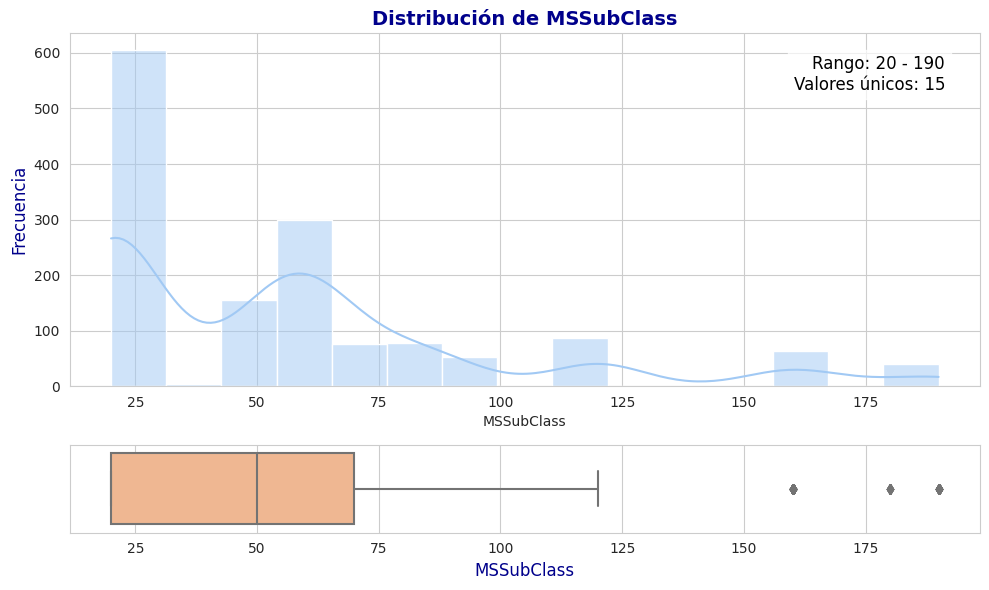

In [10]:
analizar_columna_num(name_col_num[1], datos_num)

> Dado el significado de la variable y la cantidad de valores únicos que presenta en los datos, **es recomendable convertirla de numérica a categórica**.

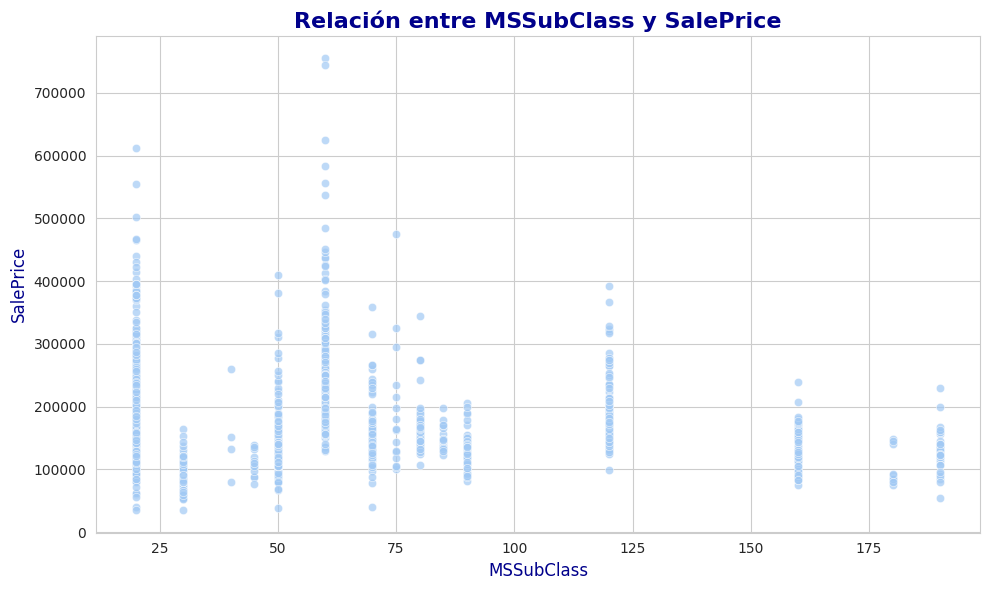

In [11]:
graficar_scatterplot(datos_num, name_col_num[1])

> Como se observa en el gráfico, algunas categorías presentan rangos de valores similares. Por ello, **agrupar estas dos categorías en una sola es una estrategia útil para reducir la dimensionalidad.**

##### Criterio de Agrupación de Categorías

1. **Agrupación Basada en Márgenes de Tolerancia**:
   - Las categorías se agrupan si los valores mínimos y máximos de la variable respuesta (`SalePrice`) caen dentro de un rango definido por un **margen de tolerancia** (e.g., 30%).

2. **Cálculo de los Márgenes**:
   - Para cada categoría, se calculan los límites inferior y superior del rango de `SalePrice`:
     - **Límite inferior**: `lim_min_actual * (1 - margen_tolerancia)`
     - **Límite superior**: `lim_max_actual * (1 + margen_tolerancia)`
   - Si los valores de `SalePrice` de una categoría están dentro de estos límites, se agrega al grupo actual.

3. **Formación de Grupos**:
   - Se inicia un grupo con la **primera categoría**.
   - Para cada categoría subsiguiente, se verifica si sus valores de `SalePrice` están dentro del rango de tolerancia del grupo actual.
   - Si no están dentro del rango, se cierra el grupo actual y se inicia uno nuevo.

4. **Resultado**:
   - Las categorías se agrupan en conjuntos donde los valores de `SalePrice` son similares dentro del margen de tolerancia especificado.
   - Cada grupo se etiqueta como **`Grupo 1`**, **`Grupo 2`**, etc., y se utiliza para visualizar la relación entre las categorías y la variable respuesta.

---

##### Ejemplo
Si el margen de tolerancia es **30%**, y el grupo actual tiene un `SalePrice` mínimo de **100,000** y máximo de **200,000**, una nueva categoría se agregará al grupo si su `SalePrice` mínimo está entre **70,000** y **130,000** y su máximo está entre **140,000** y **260,000**.

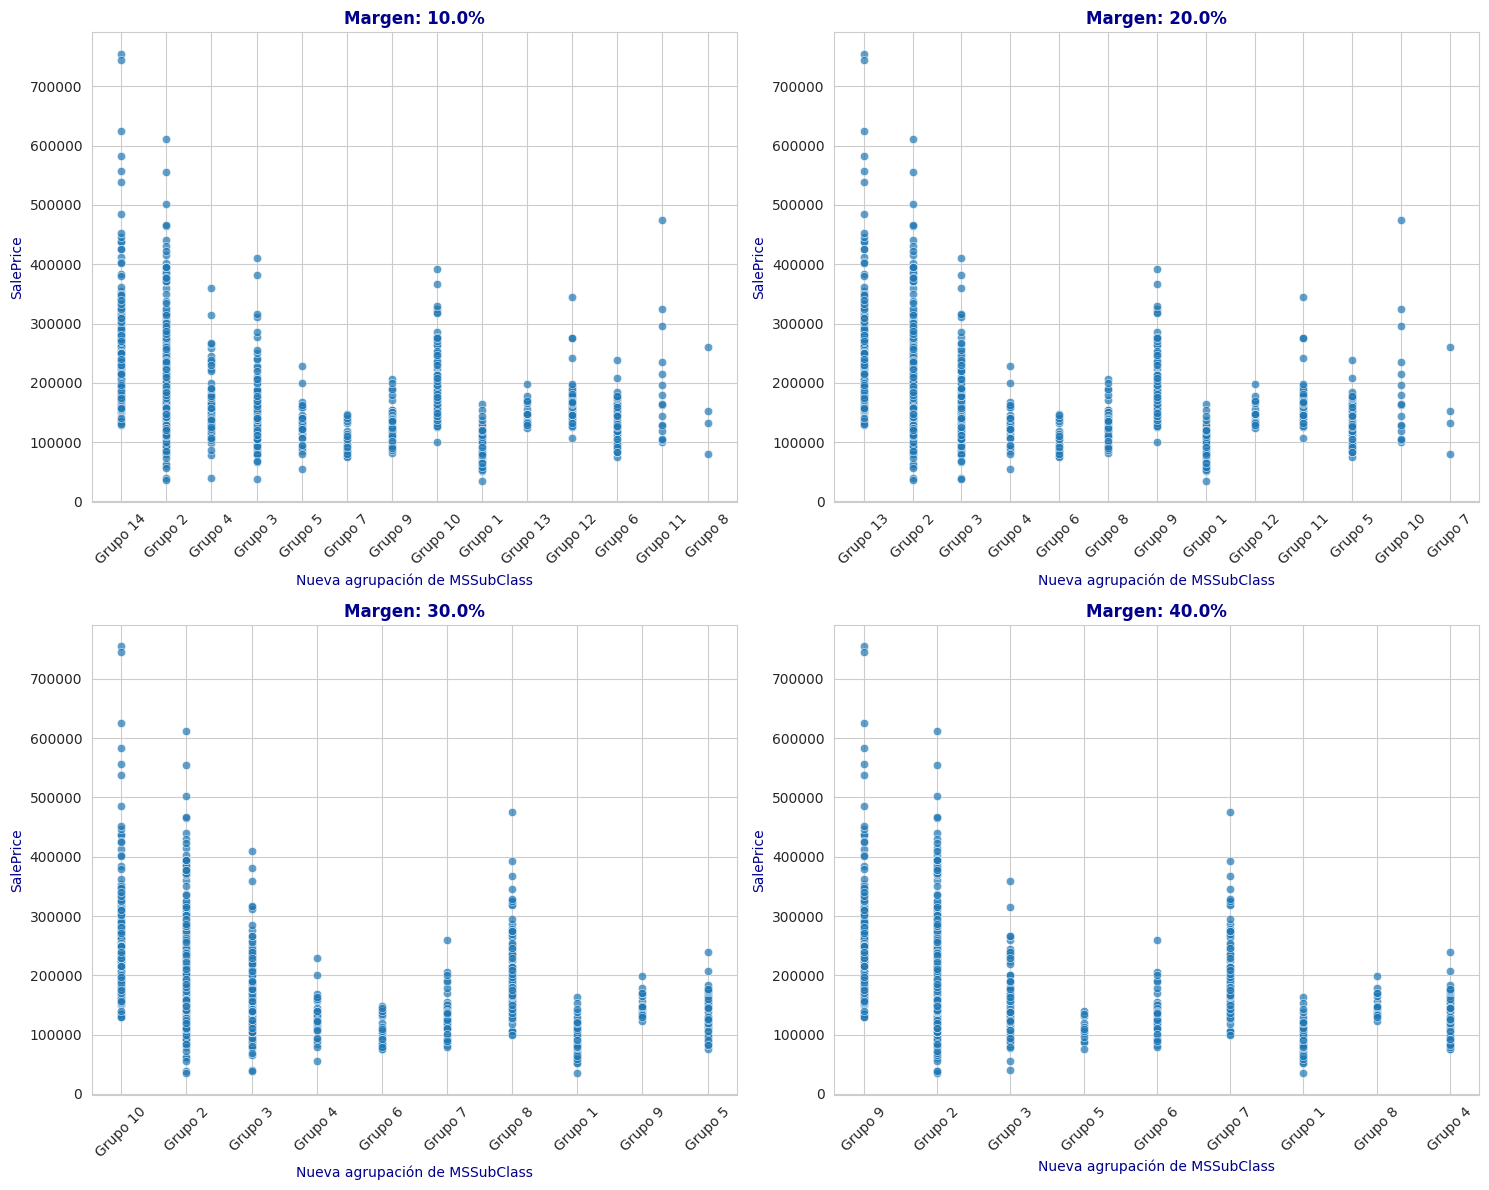

Margen 10.0%: [[30], [20], [50], [70], [190], [160], [180, 45], [40], [90], [120], [75], [80], [85], [60]]
Margen 20.0%: [[30], [20], [50, 70], [190], [160], [180, 45], [40], [90], [120], [75], [80], [85], [60]]
Margen 30.0%: [[30], [20], [50, 70], [190], [160], [180, 45], [40, 90], [120, 75, 80], [85], [60]]
Margen 40.0%: [[30], [20, 50], [70, 190], [160, 180], [45], [40, 90], [120, 75, 80], [85], [60]]


In [12]:
grupos = categorizaciones(datos_num, name_col_num[1])

Para la variable **`MSSubClass`**, se recomienda:

1. **Categorizar** la variable, ya que representa clases o tipos de viviendas.
2. **Agrupar categorías** que tienen valores similares en la variable respuesta (**`SalePrice`**), siguiendo el método de agrupación mencionado anteriormente.

#### Impacto en el Modelo
Es importante analizar el impacto que tiene en el modelo realizar la agrupación con diferentes **margen de tolerancia**. Este enfoque puede:

- **Reducir la complejidad** del modelo al disminuir el número de categorías.
- **Mejorar la generalización** al agrupar categorías con comportamientos similares en la variable respuesta.
- **Evitar el sobreajuste** al reducir el ruido en los datos.


> **Nota**: La agrupación debe validarse con métricas de evaluación del modelo para asegurar que no se pierde información crítica.

---
### Variable 'LotFrontage'
---


> Esta variable representa los metros lineales de calle conectado a la propiedad

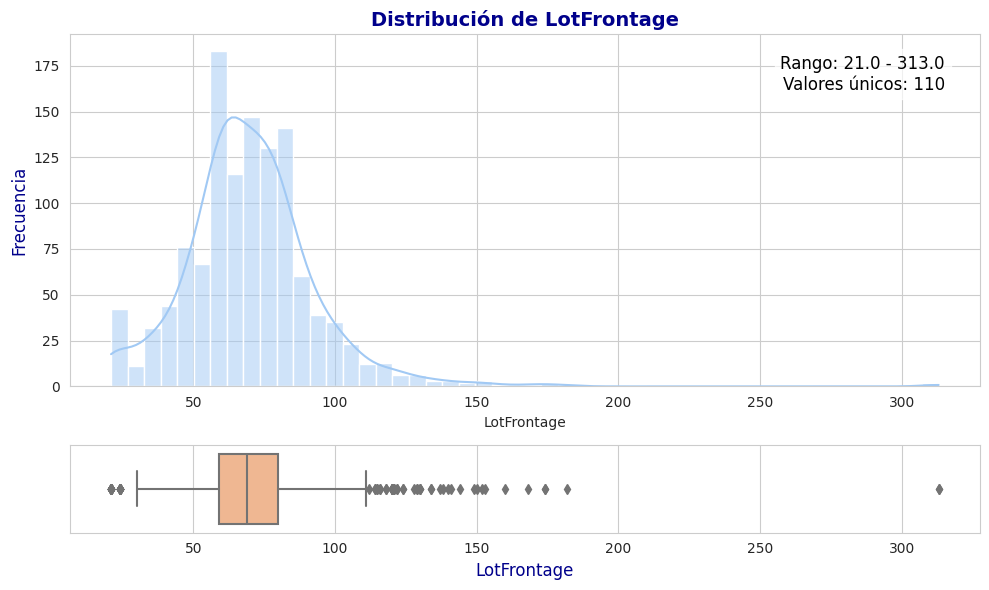

In [13]:
analizar_columna_num(name_col_num[2], datos_num)

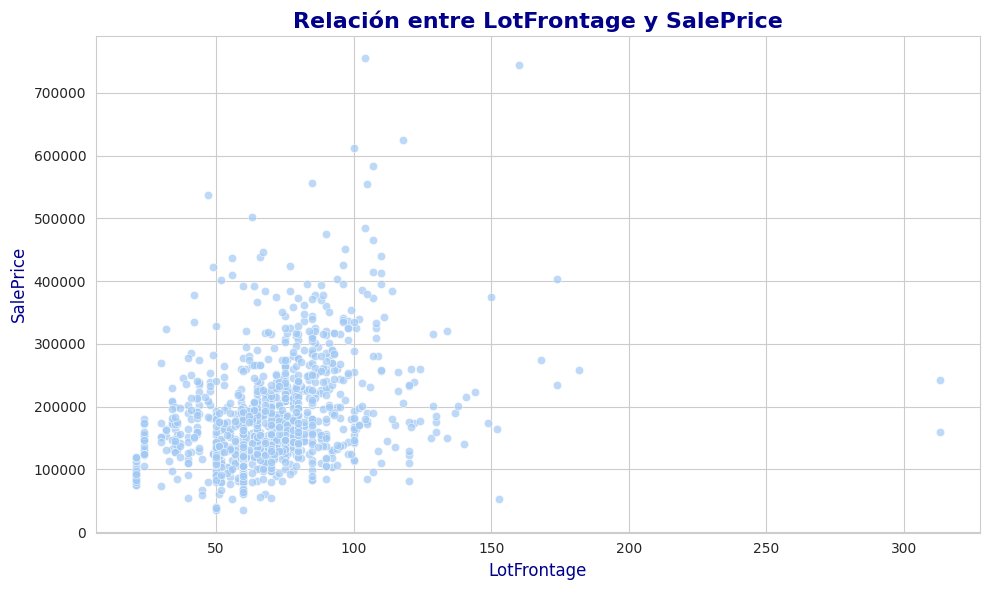

In [14]:
graficar_scatterplot(datos_num, name_col_num[2])

> A partir de los dos gráficos anteriores, se observa que los outliers no corresponden a valores atípicos anómalos. Por ello, se aplicarán transformaciones con el objetivo de atenuar su impacto en el análisis.

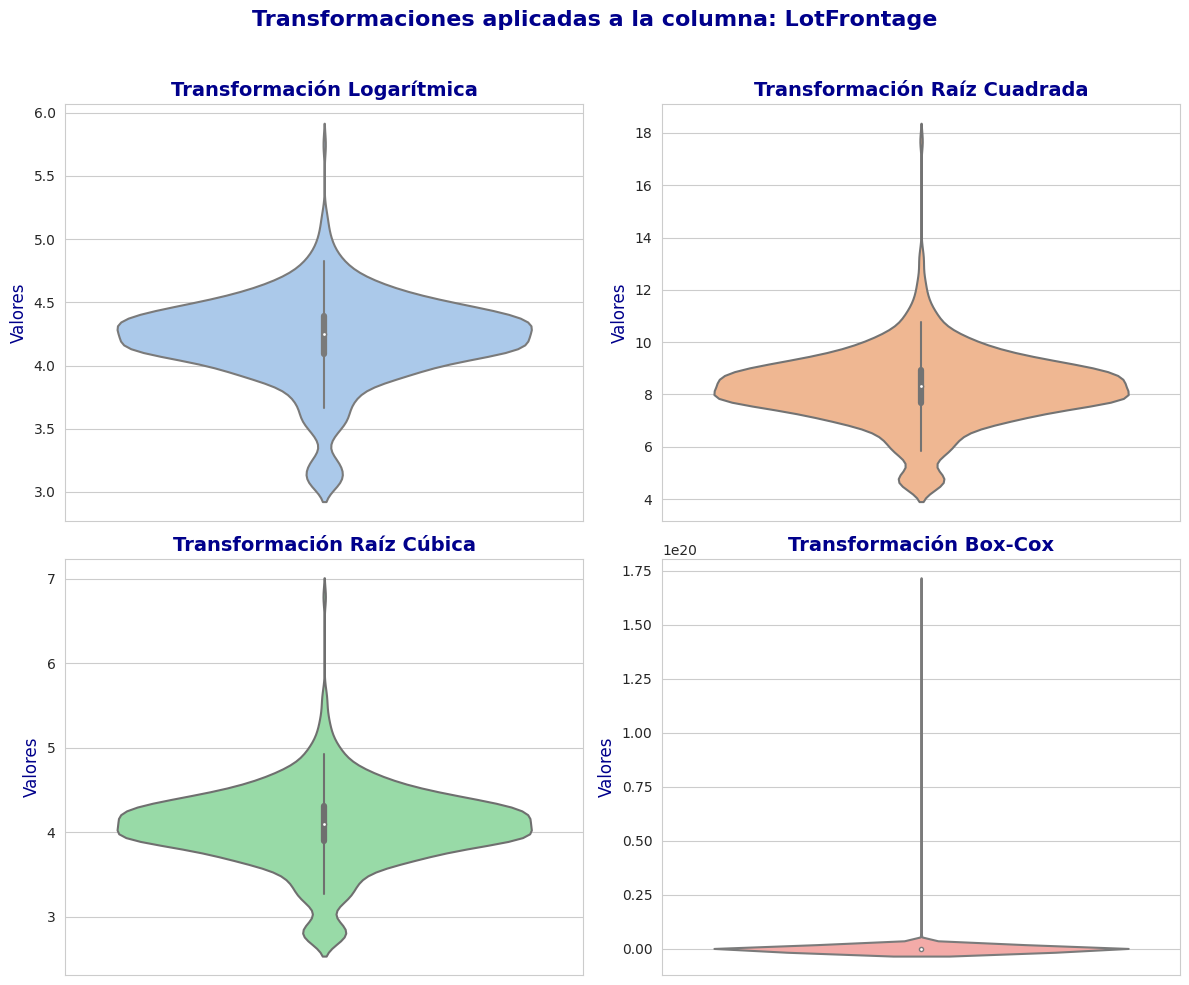

In [15]:
transformar_y_graficar_violin(datos_num, name_col_num[2])

> Al analizar las distintas transformaciones aplicadas a esta variable, se observa que la transformación **logarítmica y la raíz cúbica** son las más adecuadas, ya que ambas logran una distribución más concentrada y simétrica, además de reducir significativamente la dispersión de los datos.

---
### Variable LotArea
---

> Esta variable representa el tamaño del terreno en metros cuadrados

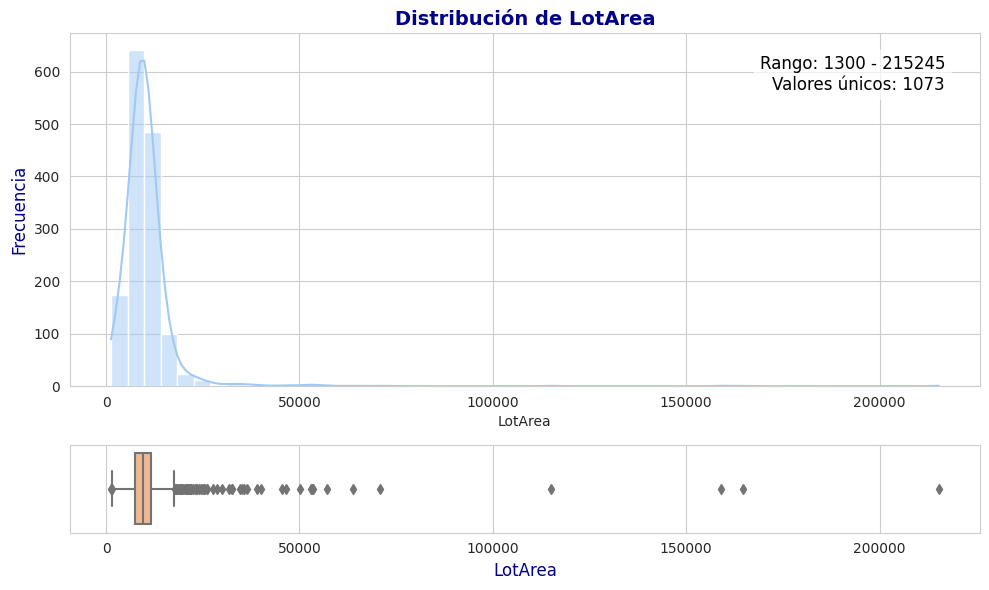

In [16]:
analizar_columna_num(name_col_num[3], datos_num)

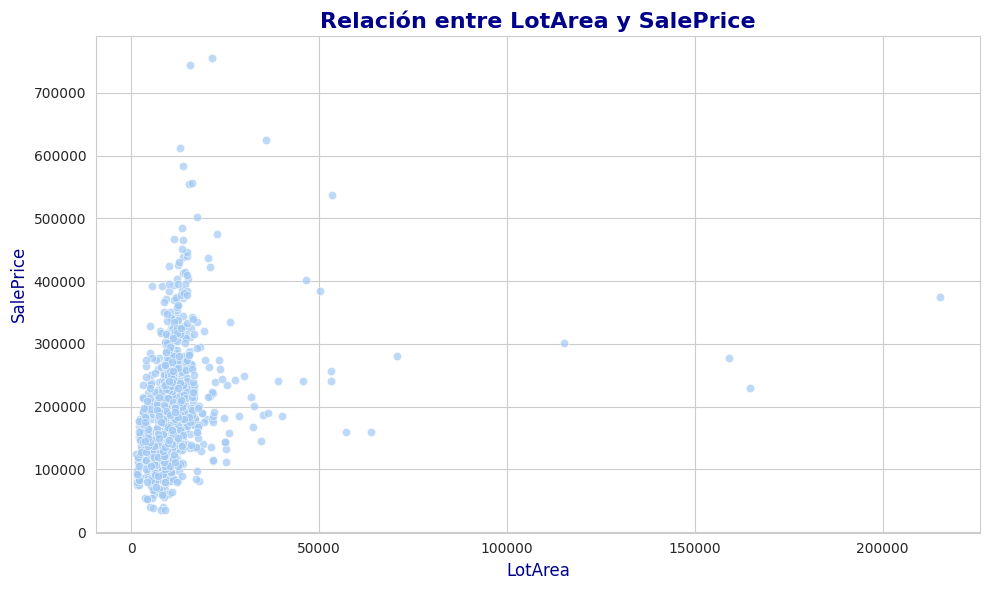

In [17]:
graficar_scatterplot(datos_num, name_col_num[3])

> Esta variable presenta varios outliers que, al parecer, no corresponden a valores anómalos. Por ello, se aplicarán transformaciones con el fin de atenuar su impacto en el análisis.

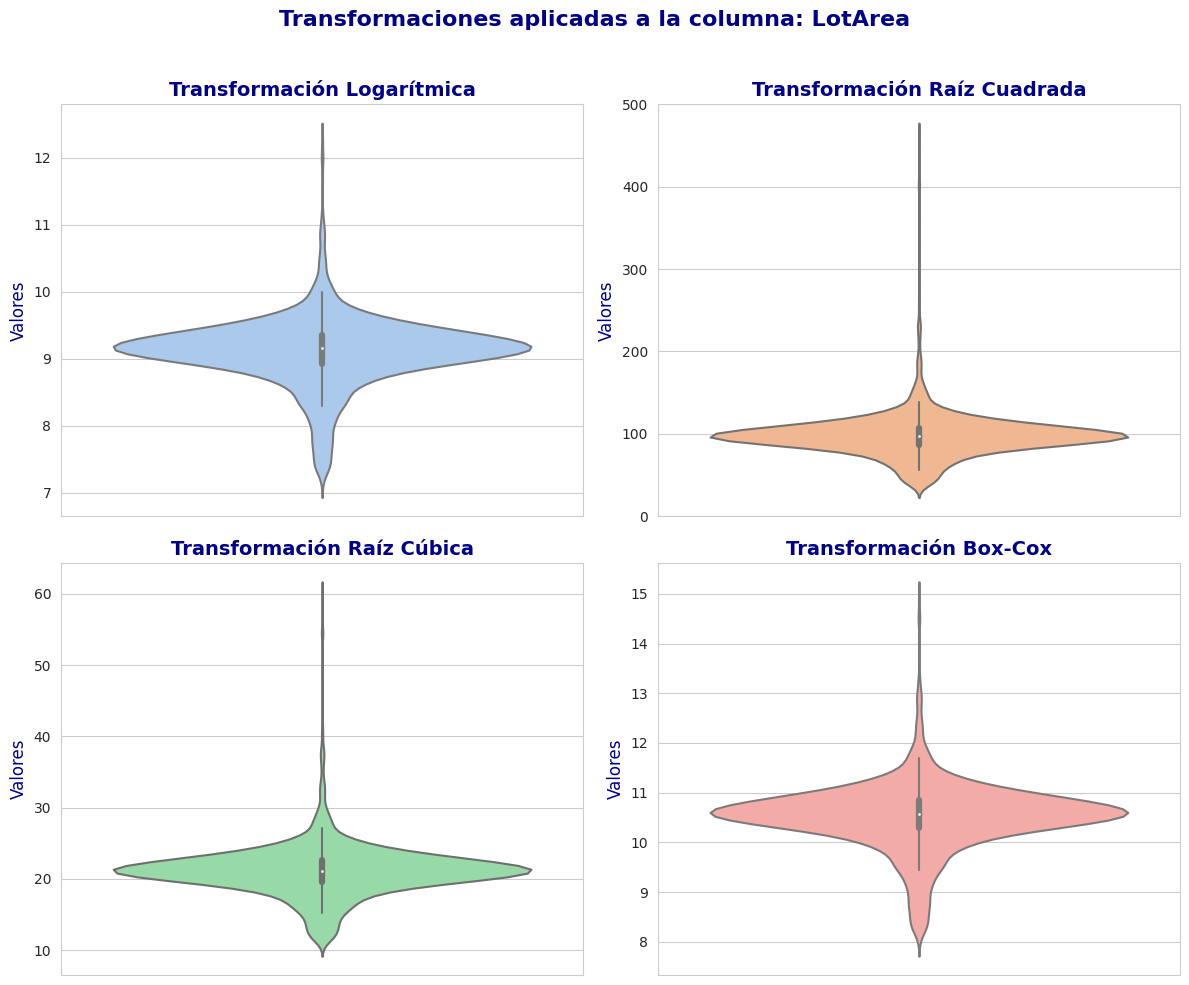

In [18]:
transformar_y_graficar_violin(datos_num, name_col_num[3])

> Al analizar las distintas transformaciones aplicadas a esta variable, se observa que la transformación **logarítmica y Box-Cox** son las más adecuadas, ya que ambas logran una distribución más concentrada y simétrica, además de reducir la dispersión de los datos.

---
### Variable OverallQual
---

> Esta variable califica el material general y el acabado de la casa.

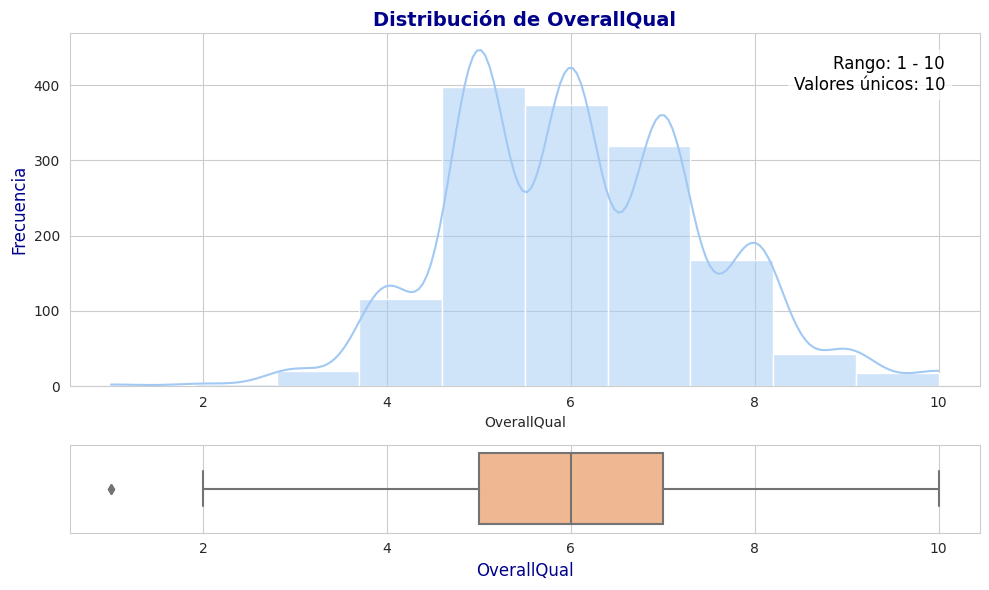

In [19]:
analizar_columna_num(name_col_num[4], datos_num)

> Dado el significado de la variable y la cantidad de valores únicos que presenta en los datos, **es recomendable convertirla de numérica a categórica**.

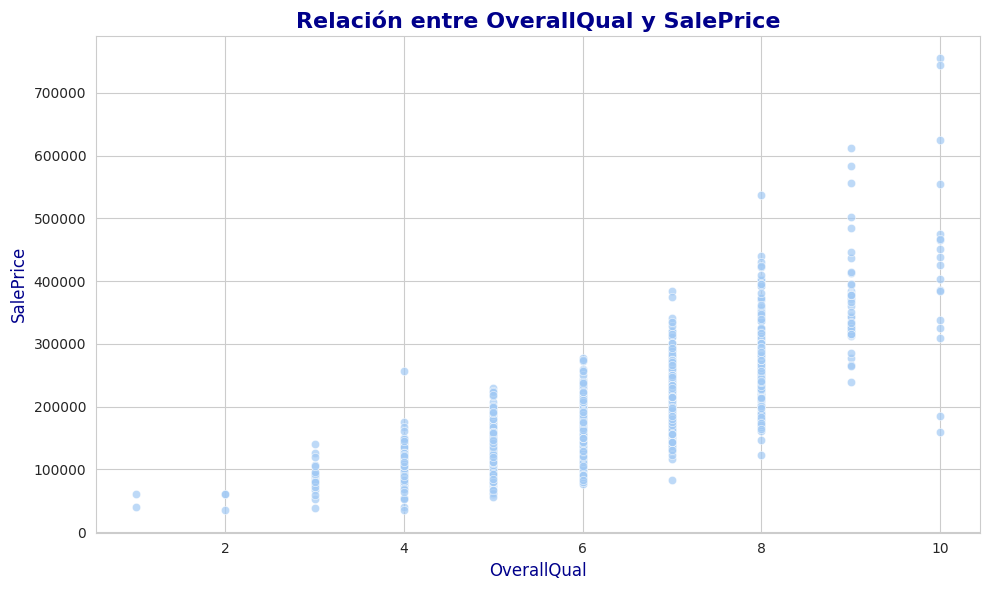

In [20]:
graficar_scatterplot(datos_num, name_col_num[4])

> Esta variable permite ser categorizada, y algunas de sus categorías pueden agruparse para facilitar el análisis.

---
### Variable OverallCond
---

> Esta variable califica el estado general de la casa.

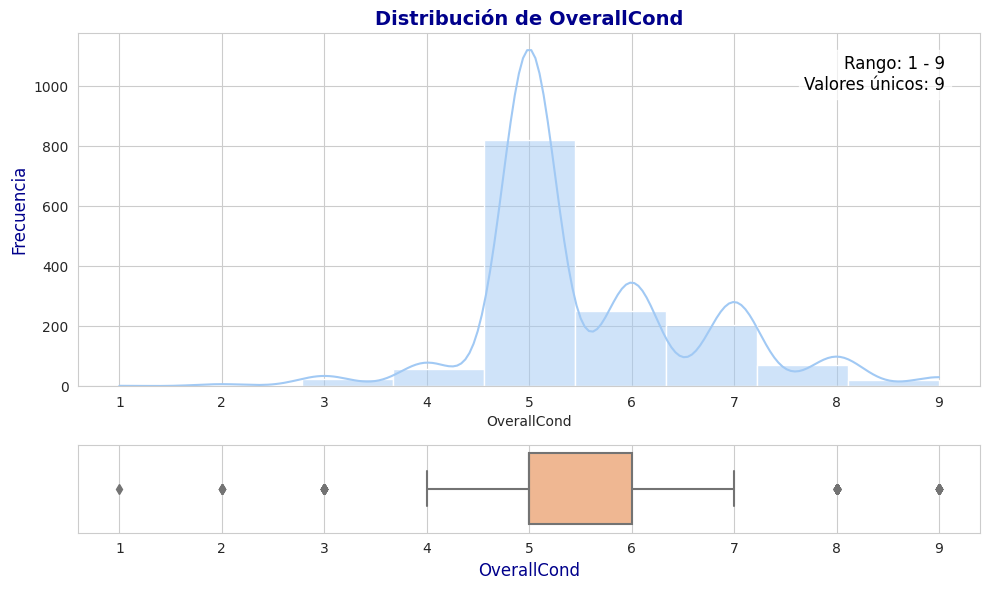

In [21]:
analizar_columna_num(name_col_num[5], datos_num)

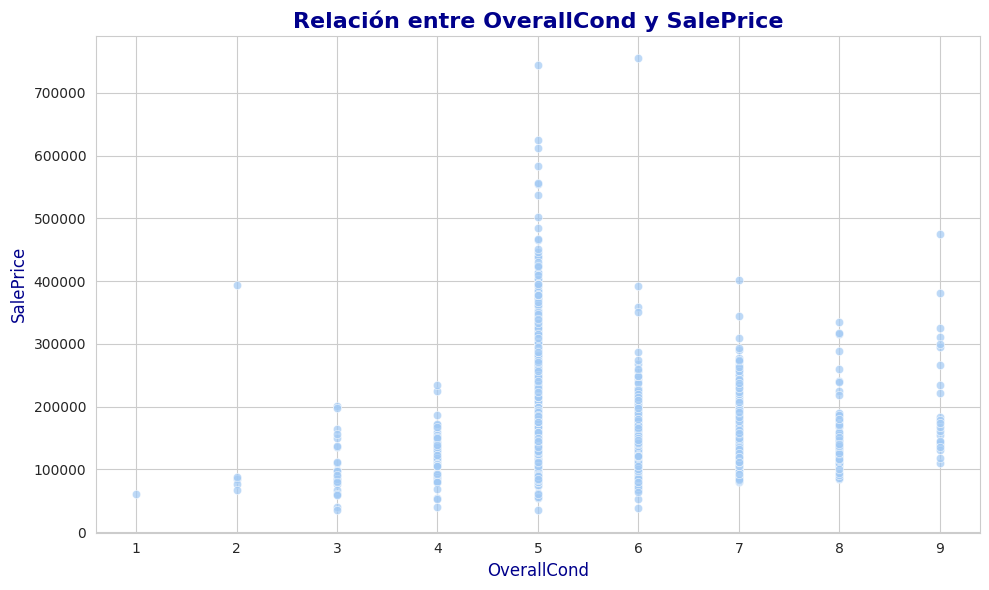

In [22]:
graficar_scatterplot(datos_num, name_col_num[5])

> Esta variable permite ser categorizada, y algunas de sus categorías pueden agruparse para facilitar el análisis.

---
### Variable YearBuilt
---

> Esta variable representa la fecha de construcción original

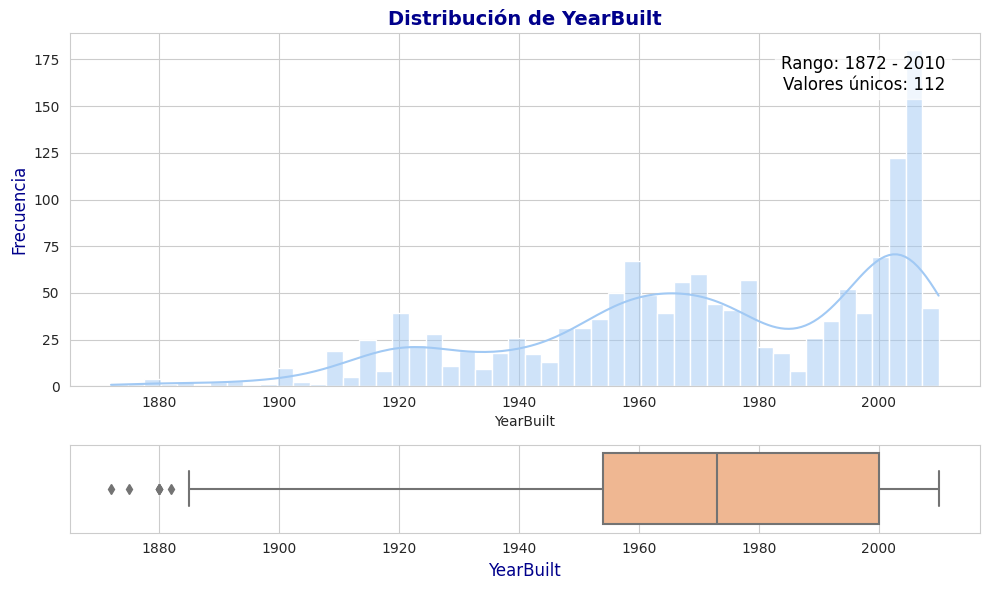

In [23]:
analizar_columna_num(name_col_num[6], datos_num)

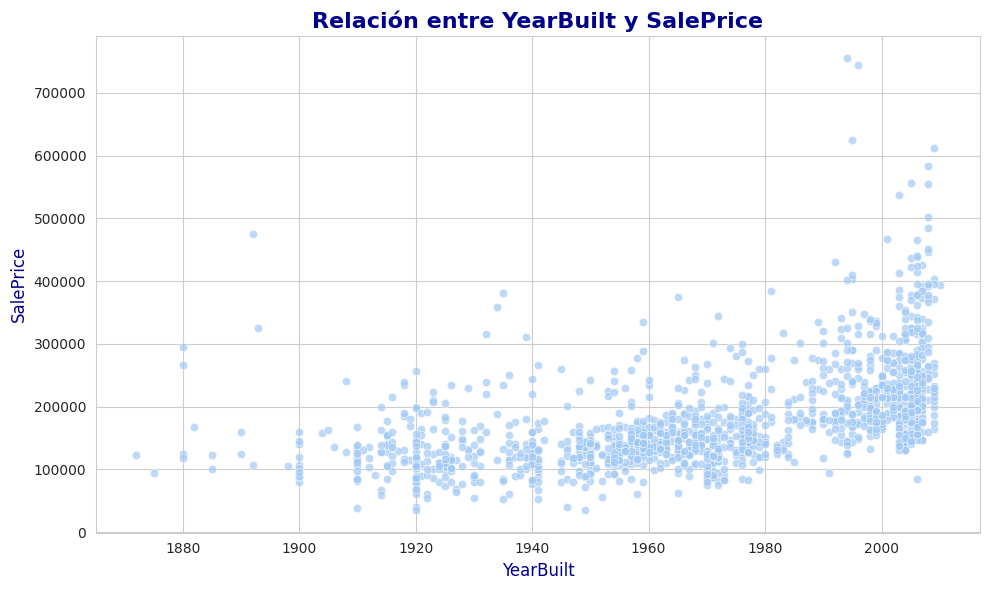

In [24]:
graficar_scatterplot(datos_num, name_col_num[6])

> Dada la naturaleza de esta variable, no es necesario aplicar ninguna transformación.

---
### Varaible YearRemodAdd
---

> Esta variable representa la fecha de remodelación (igual que la fecha de construcción si no hay remodelaciones ni adiciones)

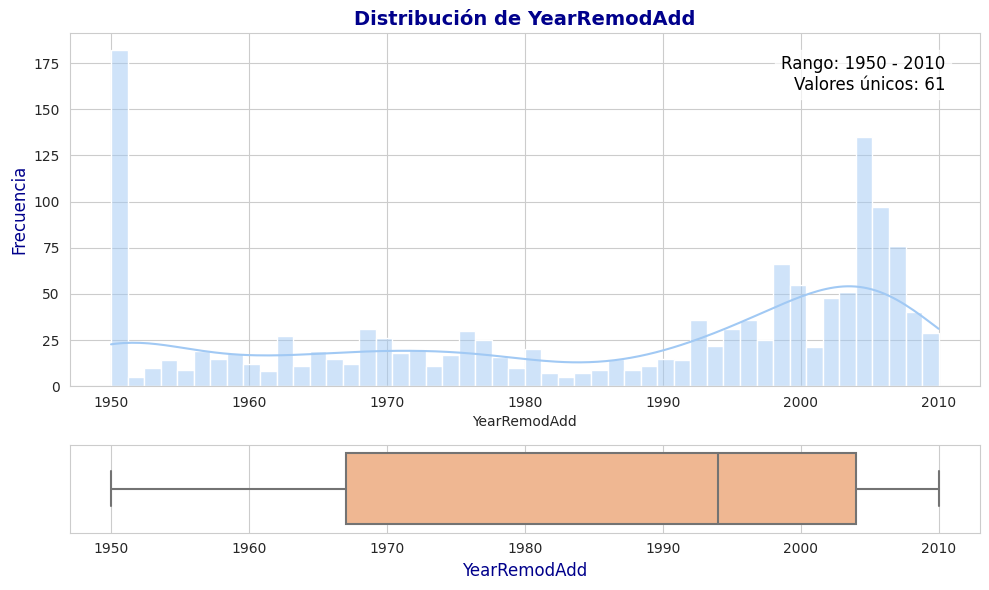

In [25]:
analizar_columna_num(name_col_num[7], datos_num)

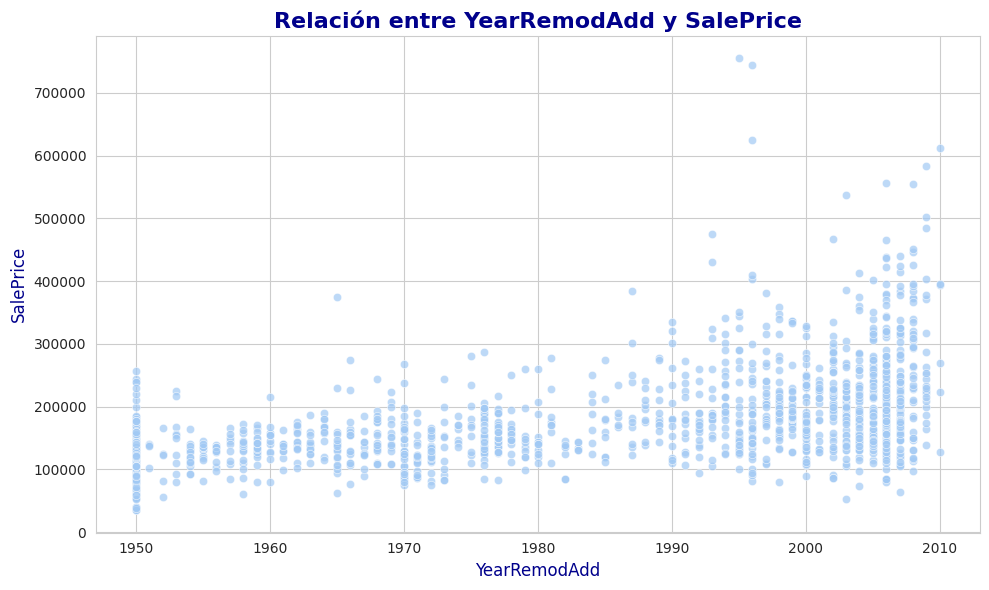

In [26]:
graficar_scatterplot(datos_num, name_col_num[7])

> Dada la naturaleza de esta variable, no es necesario aplicar ninguna transformación.

---
### MasVnrArea
---

> Esta variable representa el área de revestimiento de mampostería en pies cuadrados

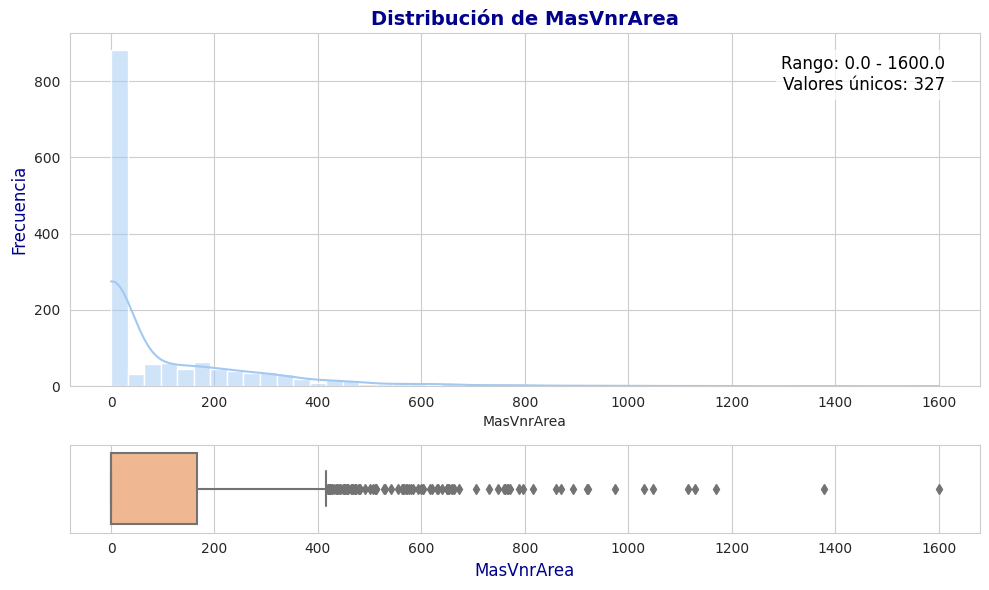

In [27]:
analizar_columna_num(name_col_num[8], datos_num)

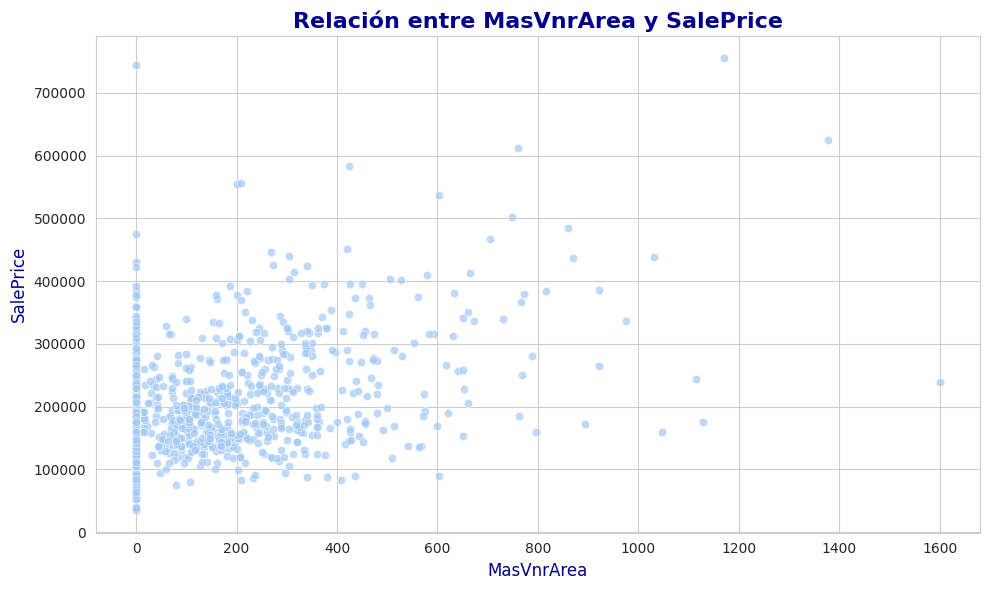

In [28]:
graficar_scatterplot(datos_num, name_col_num[8])

> Debido a la presencia de algunos outliers, se procede a aplicar transformaciones con el fin de atenuar su impacto en los datos.

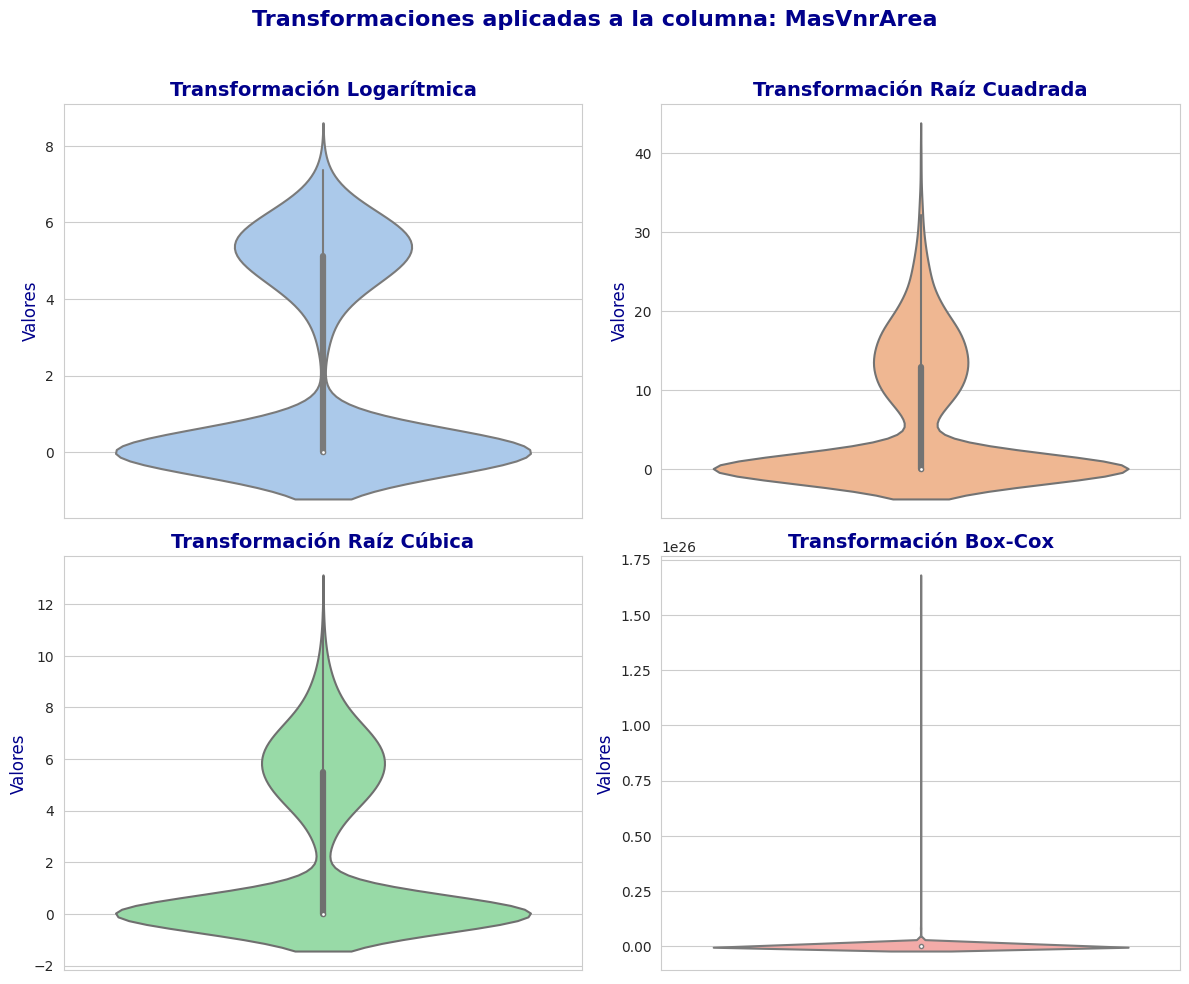

In [29]:
transformar_y_graficar_violin(datos_num, name_col_num[8])

> Al analizar las distintas transformaciones aplicadas a esta variable, se observa que la transformación **logarítmica y Raíz cúbica** son las más adecuadas, ya que ambas logran una distribución más concentrada y simétrica, además de reducir la dispersión de los datos.

---
### BsmtFinSF1
---

> Esta variable representa Pies cuadrados terminados tipo 1

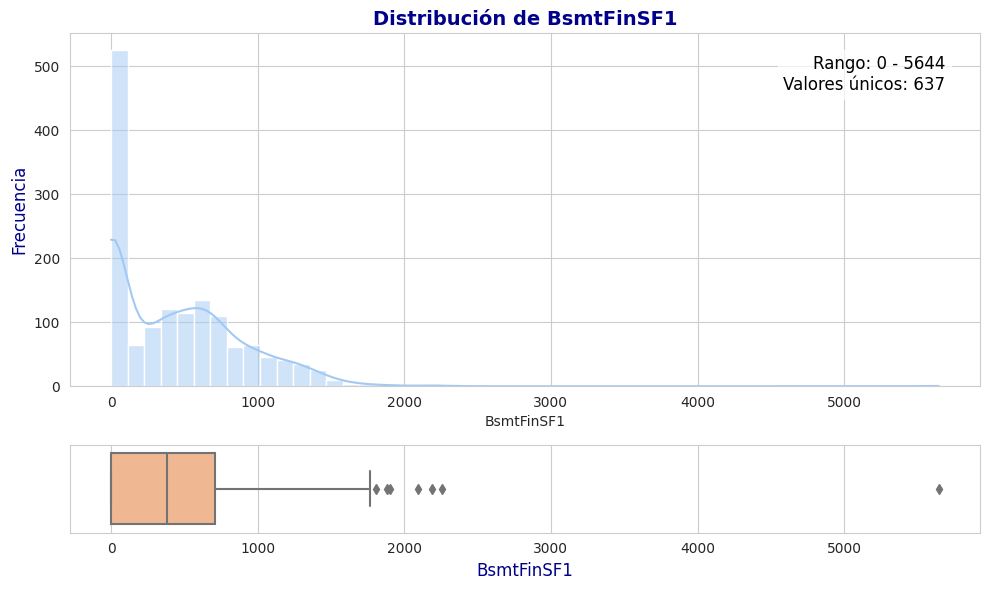

In [30]:
analizar_columna_num(name_col_num[9], datos_num)

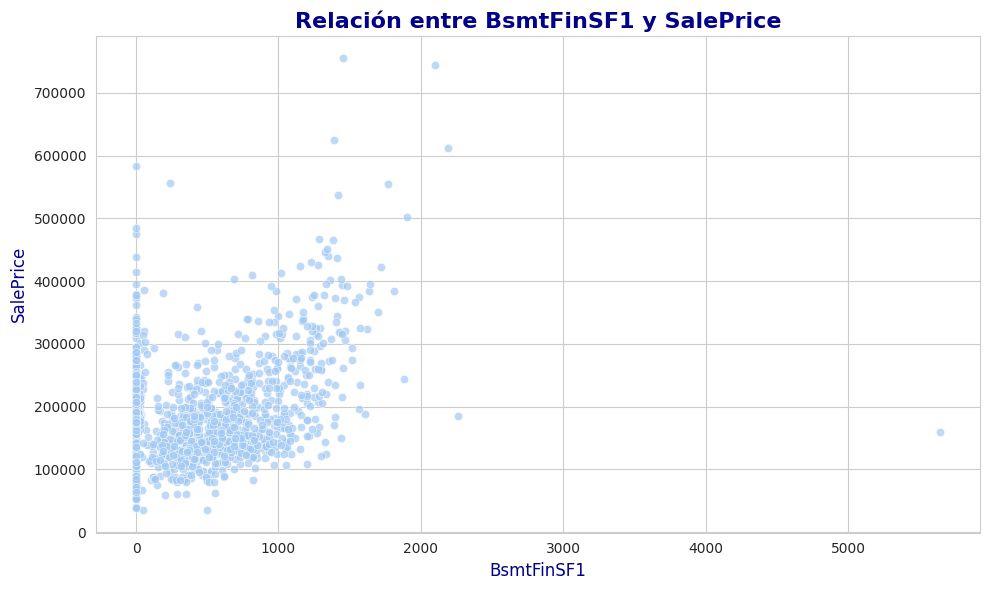

In [31]:
graficar_scatterplot(datos_num, name_col_num[9])

> Al parecer, el outlier no corresponde a un dato anómalo, por lo que se procederá a aplicar una transformación a los datos para atenuar su impacto.

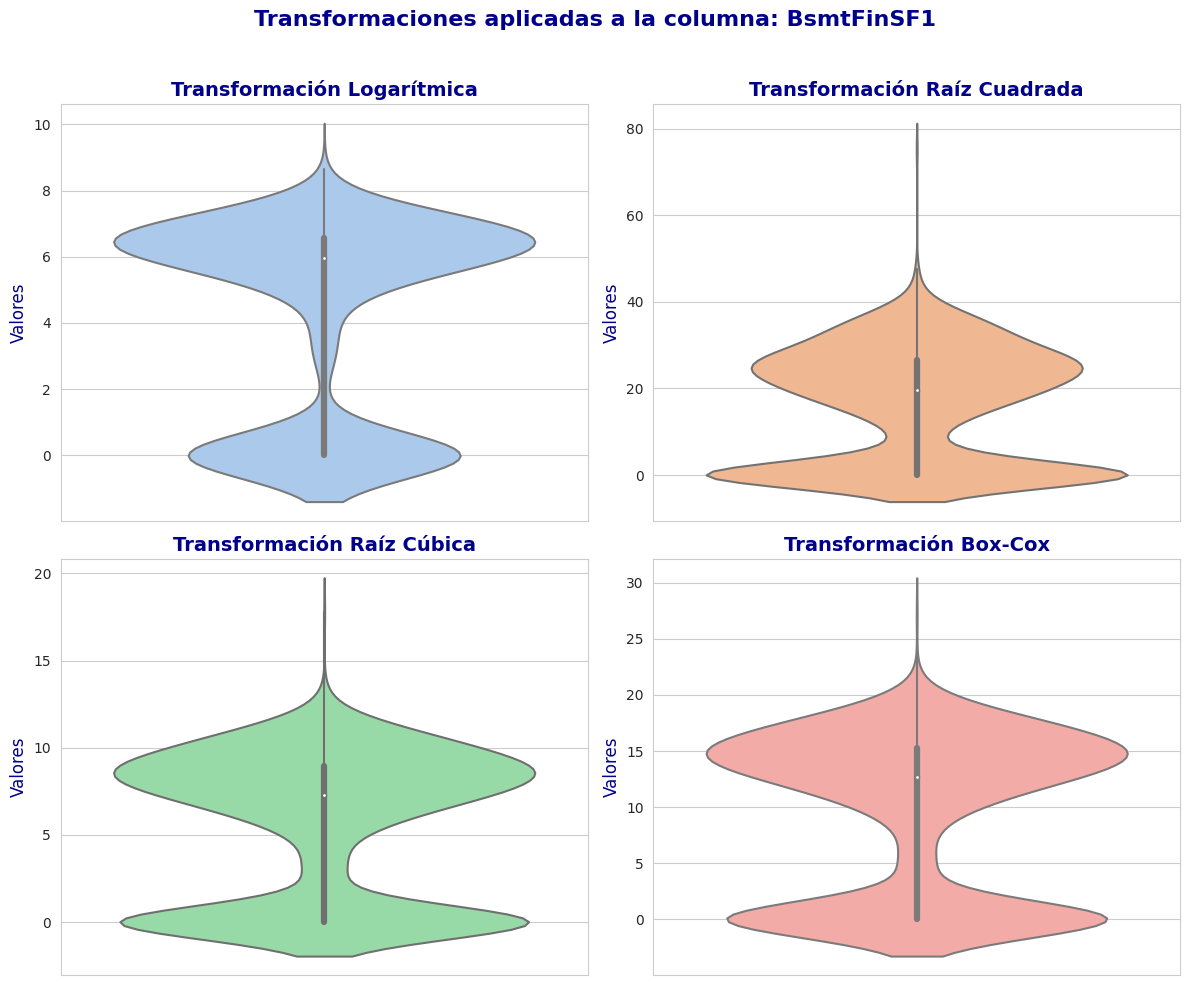

In [32]:
transformar_y_graficar_violin(datos_num, name_col_num[9])

> Al analizar las distintas transformaciones aplicadas a esta variable, se observa que la transformación **logarítmica, Raíz cúbica y Box-Cox** son las más adecuadas, ya que ambas logran una distribución más concentrada y simétrica, además de reducir la dispersión de los datos.

---
### Variable BsmtFinSF2
---

> Esta variable representa el tipo 2 pies cuadrados terminados

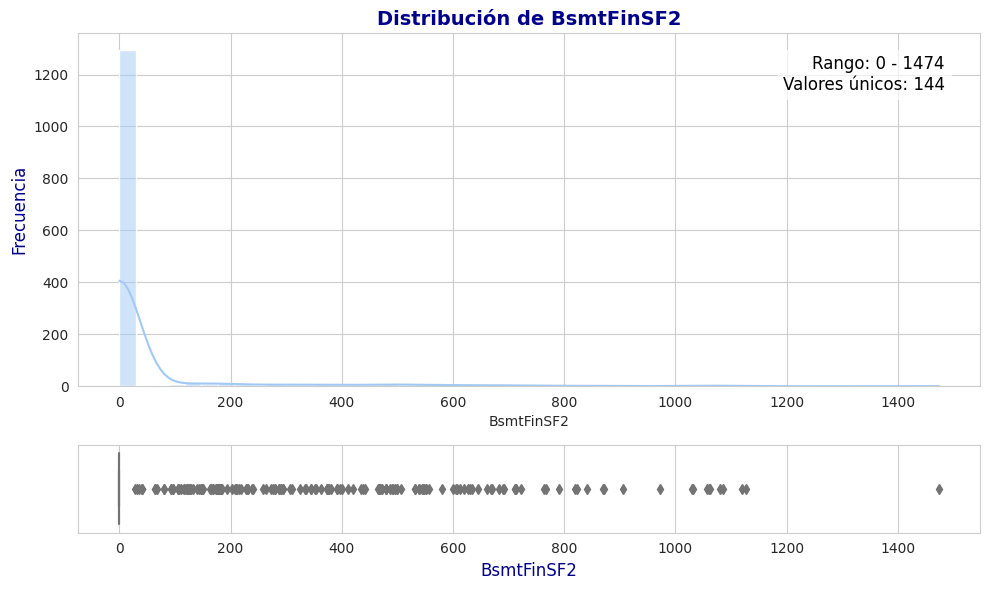

In [33]:
analizar_columna_num(name_col_num[10], datos_num)

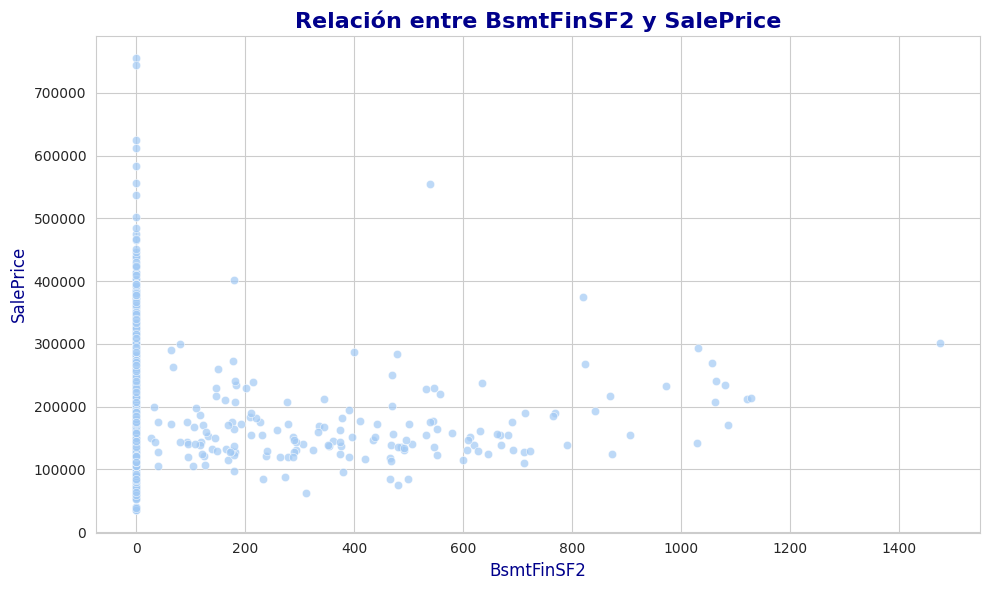

In [34]:
graficar_scatterplot(datos_num, name_col_num[10])

> Debido a la distribución de los datos, se procede a aplicar una transformación con el objetivo de atenuar el impacto de los outliers y suavizar la distribución.

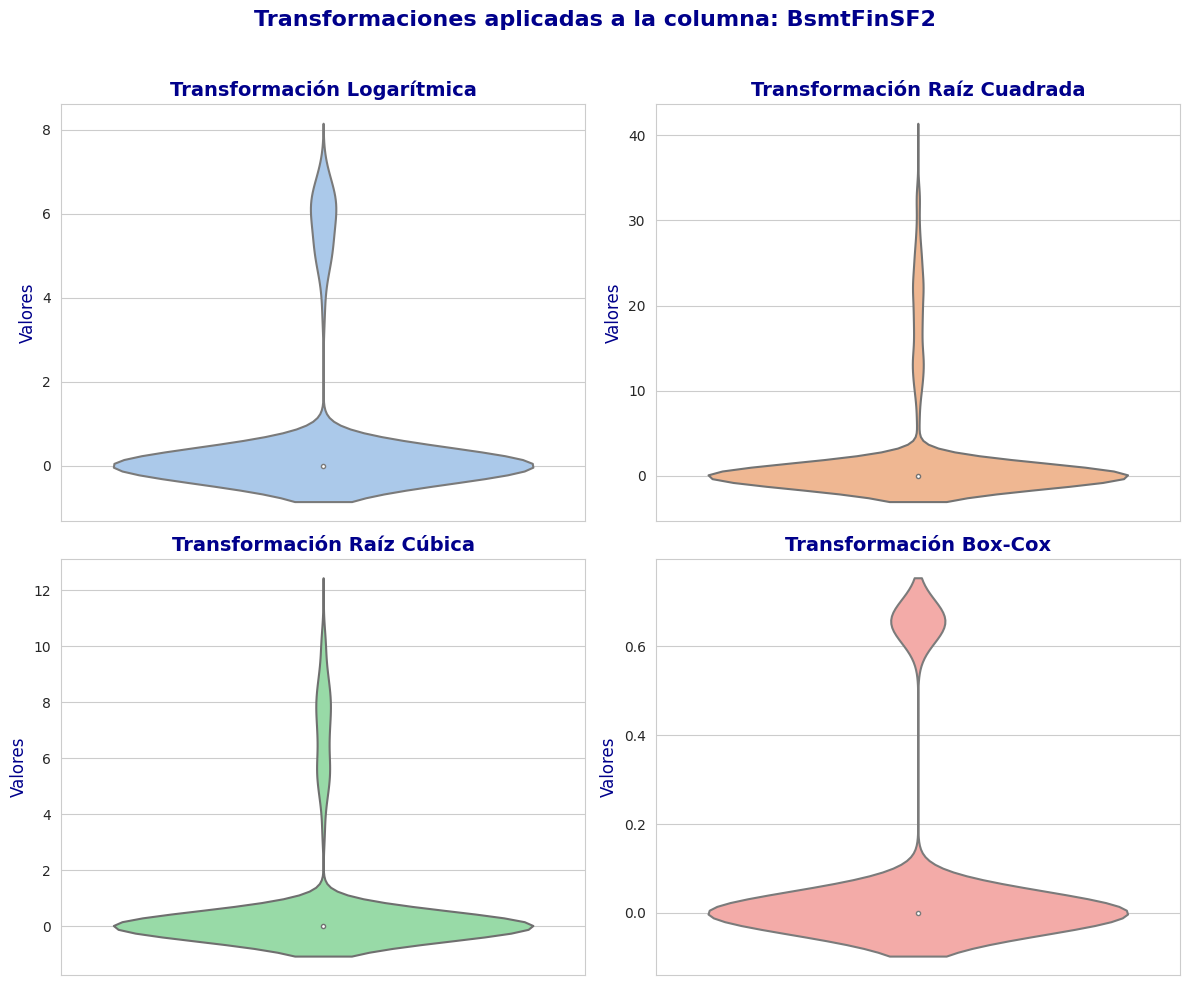

In [35]:
transformar_y_graficar_violin(datos_num, name_col_num[10])

> Al analizar las distintas transformaciones aplicadas a esta variable, se observa que la transformación **logarítmica y Box-Cox** son las más adecuadas, ya que ambas logran una distribución más concentrada, además de reducir la dispersión de los datos.

---
### Variable BsmtUnfSF
----

> Esta variable representa los metros cuadrados sin terminar del área del sótano

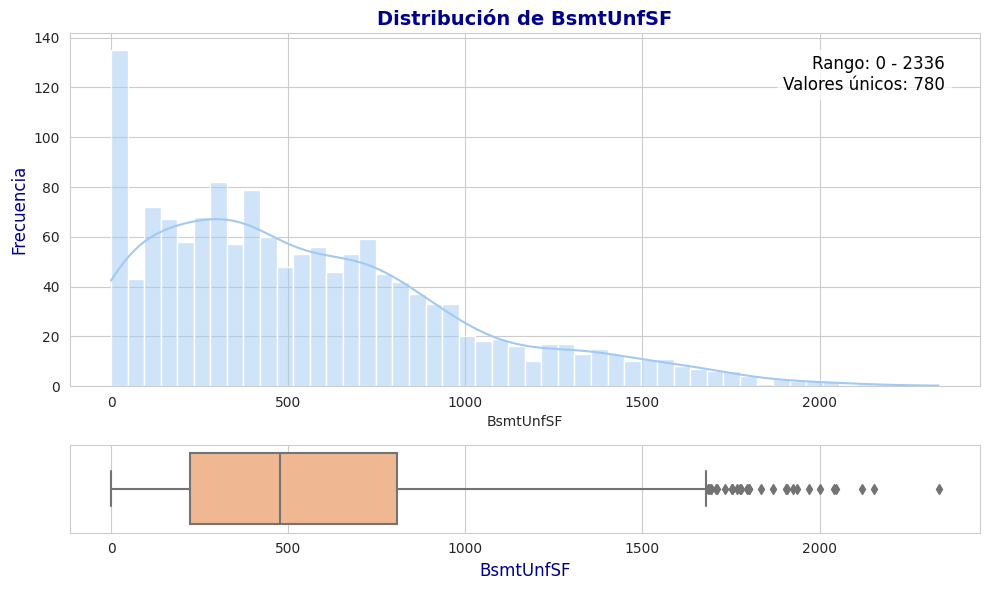

In [36]:
analizar_columna_num(name_col_num[11], datos_num)

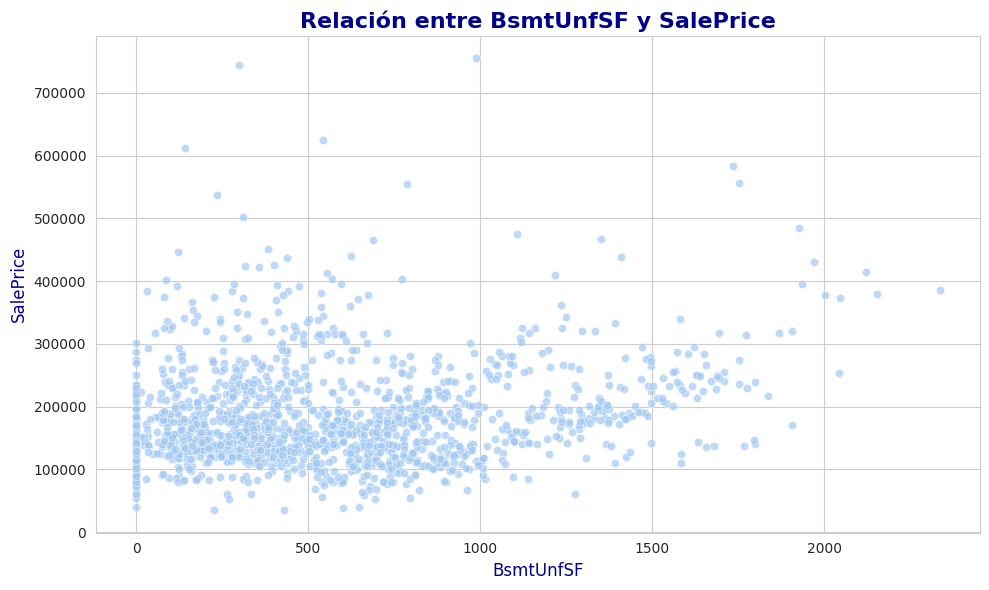

In [37]:
graficar_scatterplot(datos_num, name_col_num[11])

> A priori, no parece necesario aplicar ninguna transformación a esta variable.

---
### Variable TotalBsmtSF
---

> Esta variable representa el total de pies cuadrados del área del sótano

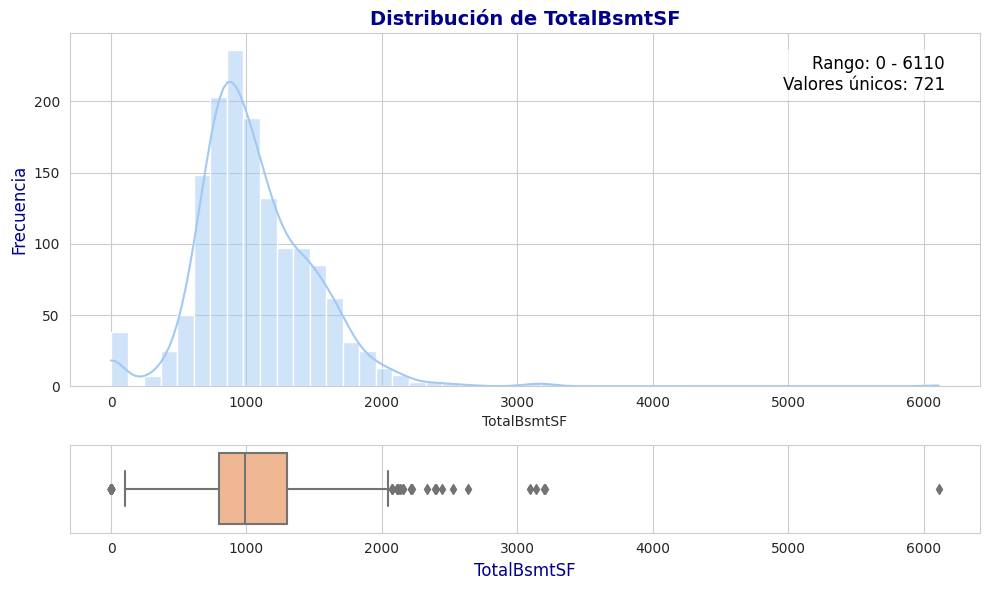

In [38]:
analizar_columna_num(name_col_num[12], datos_num)

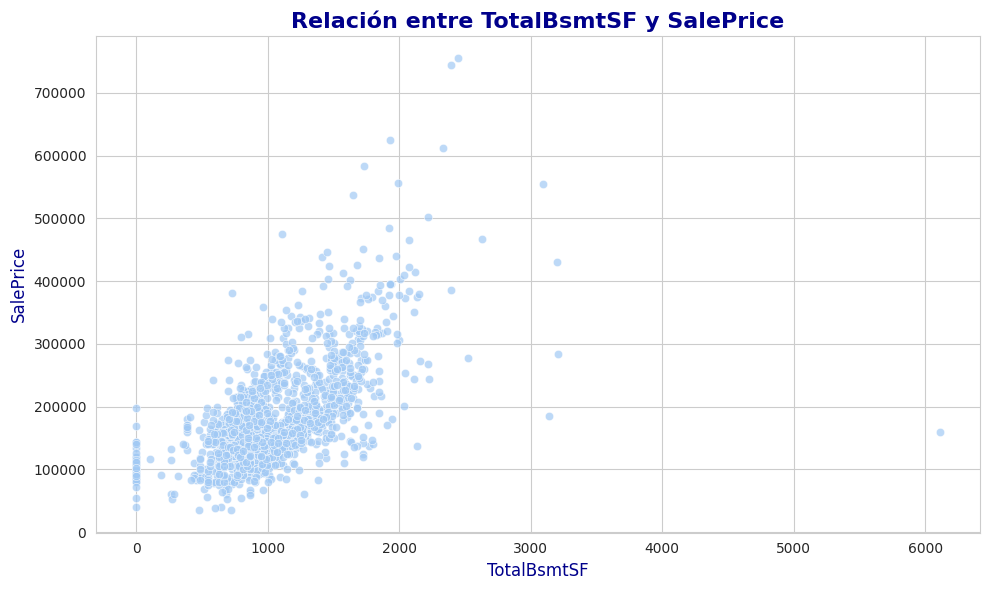

In [39]:
graficar_scatterplot(datos_num, name_col_num[12])

> Se probarán diferentes transformaciones con el fin de atenuar los outliers y obtener una distribución más adecuada para el análisis.

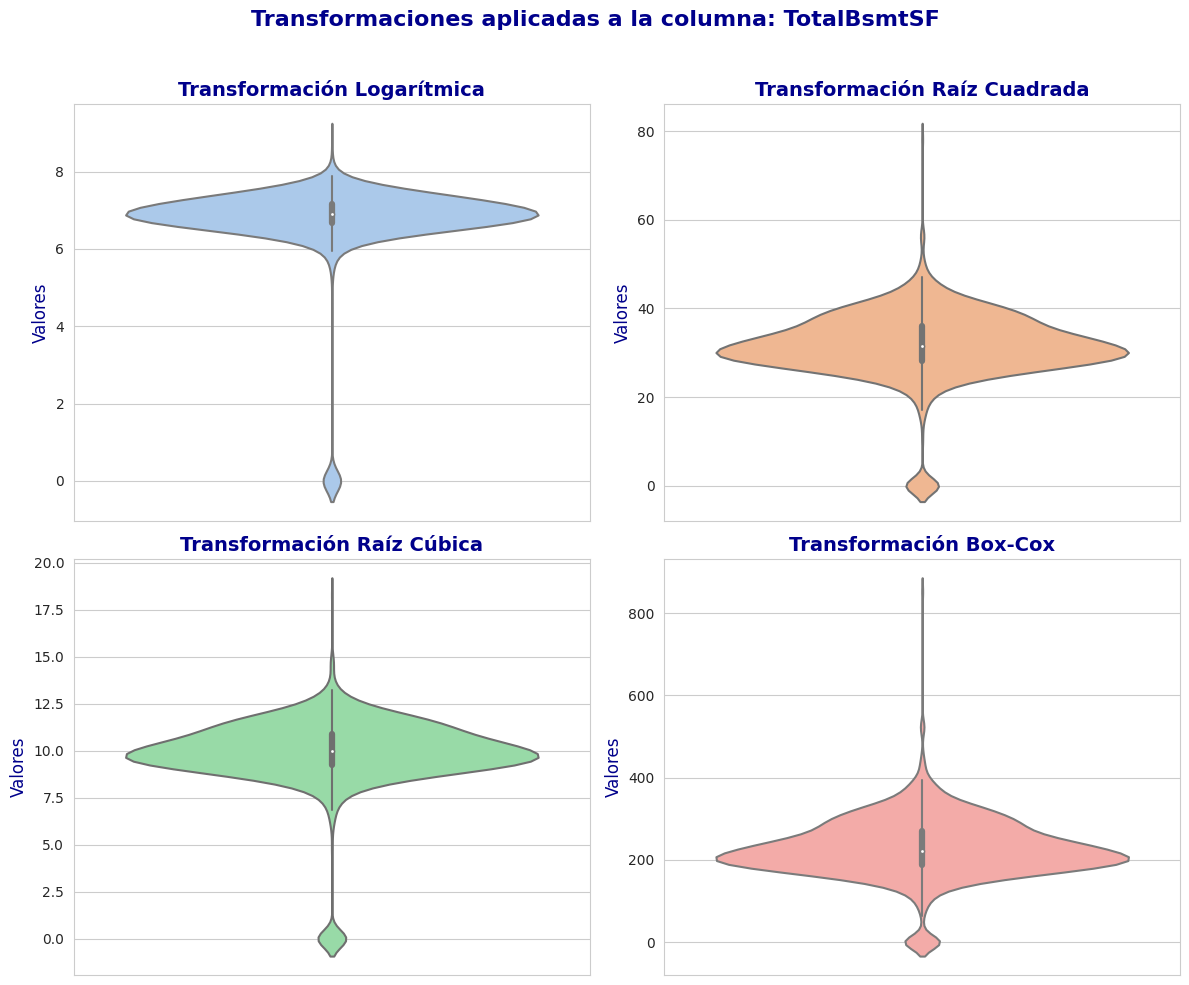

In [40]:
transformar_y_graficar_violin(datos_num, name_col_num[12])

> Al analizar las distintas transformaciones aplicadas a esta variable, se observa que la transformación **Raíz cuadrada y Raíz cubica** son las más adecuadas, ya que ambas logran una distribución más concentrada, además de reducir la dispersión de los datos.

---
### Variable 1stFlsSF
---

> esta variable representa los pies cuadrados del primer piso

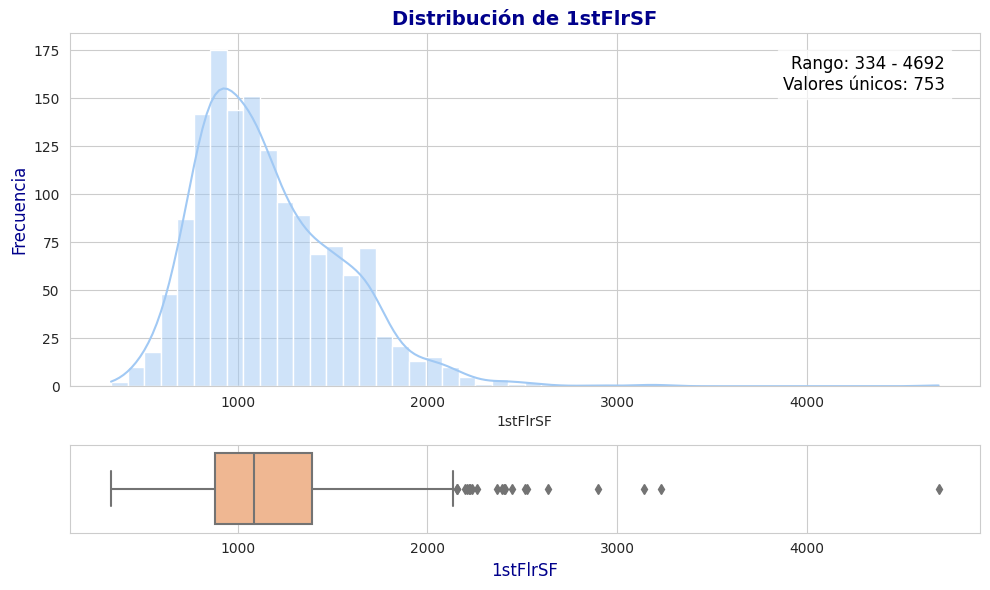

In [41]:
analizar_columna_num(name_col_num[13], datos_num)

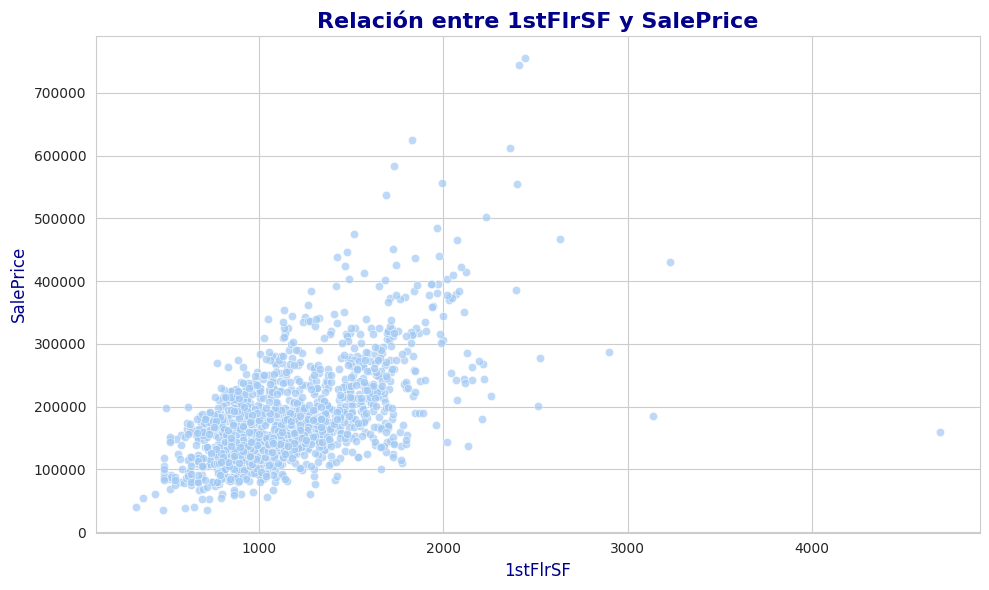

In [42]:
graficar_scatterplot(datos_num, name_col_num[13])

> Se probarán diferentes transformaciones con el fin de atenuar los outliers y obtener una distribución más adecuada para el análisis.

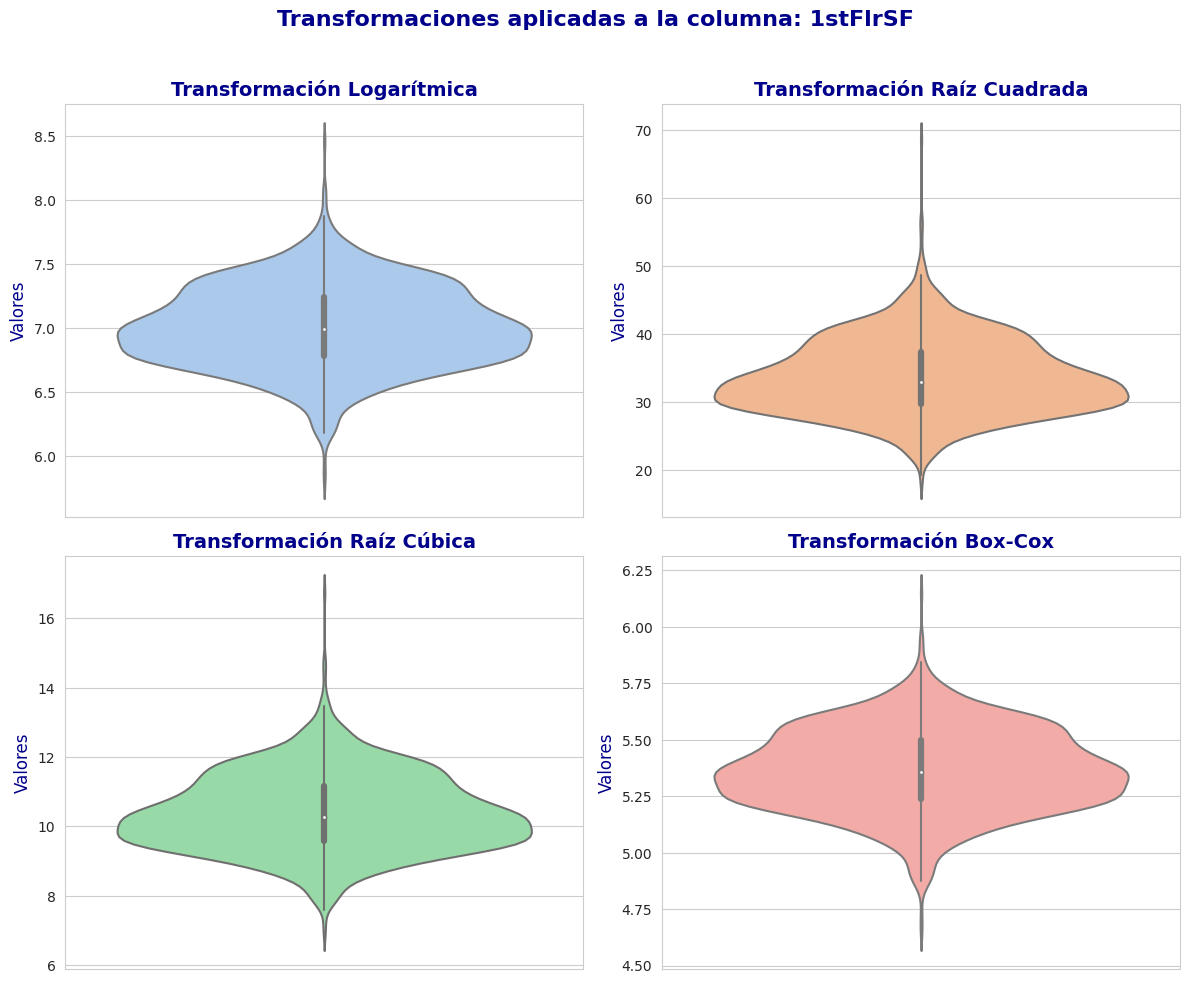

In [43]:
transformar_y_graficar_violin(datos_num, name_col_num[13])

> Al analizar las distintas transformaciones aplicadas a esta variable, se observa que la transformación **Logarítmica y Box-Cox** son las más adecuadas, ya que ambas logran una distribución más concentrada, además de reducir la dispersión de los datos.

---
### Variable 2ndFlrSF
---

> Esta variable representa los pies cuadrados del segundo piso

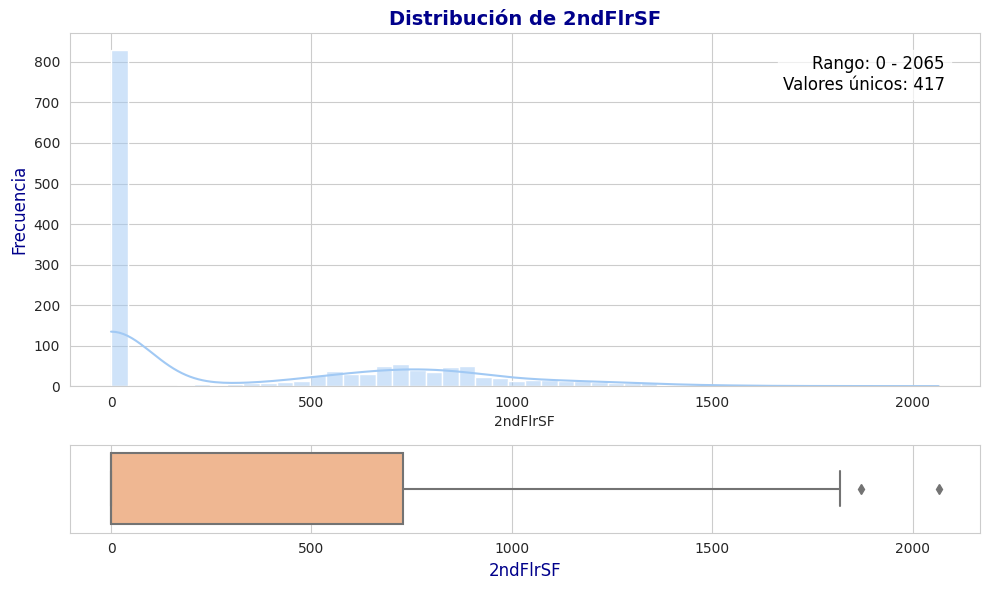

In [44]:
analizar_columna_num(name_col_num[14], datos_num)

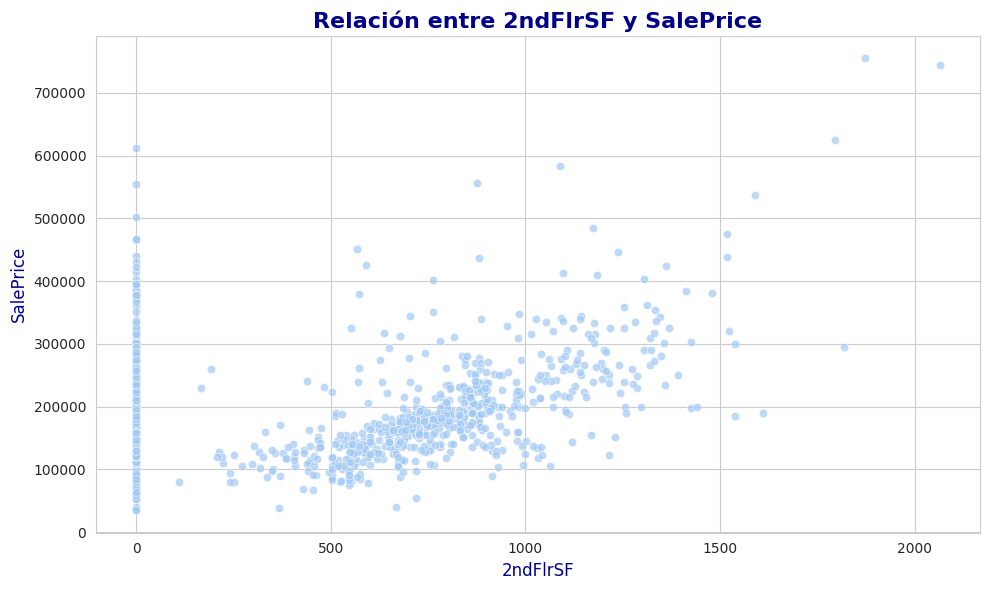

In [45]:
graficar_scatterplot(datos_num, name_col_num[14])

> Se probarán diferentes transformaciones con el fin de atenuar los outliers y obtener una distribución más adecuada para el análisis.

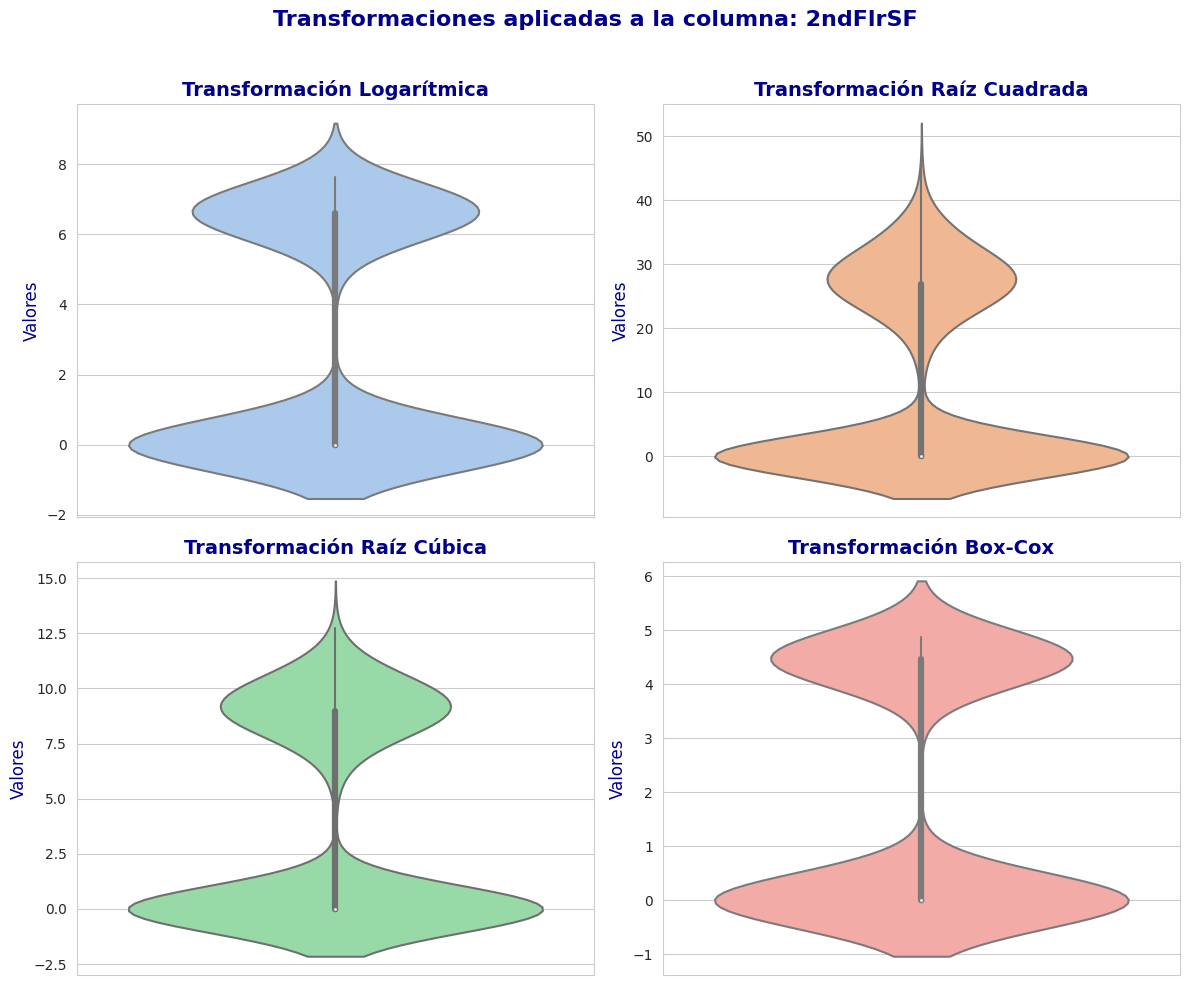

In [46]:
transformar_y_graficar_violin(datos_num, name_col_num[14])

> Al analizar las distintas transformaciones aplicadas a esta variable, se observa que la transformación **Logarítmica y Box-Cox** son las más adecuadas, ya que ambas logran una distribución más simetrica, además de reducir la dispersión de los datos.

---
### Variable LowQualFinSF
---

> Esta variable representa los pies cuadrados con acabados de baja calidad (todos los pisos)

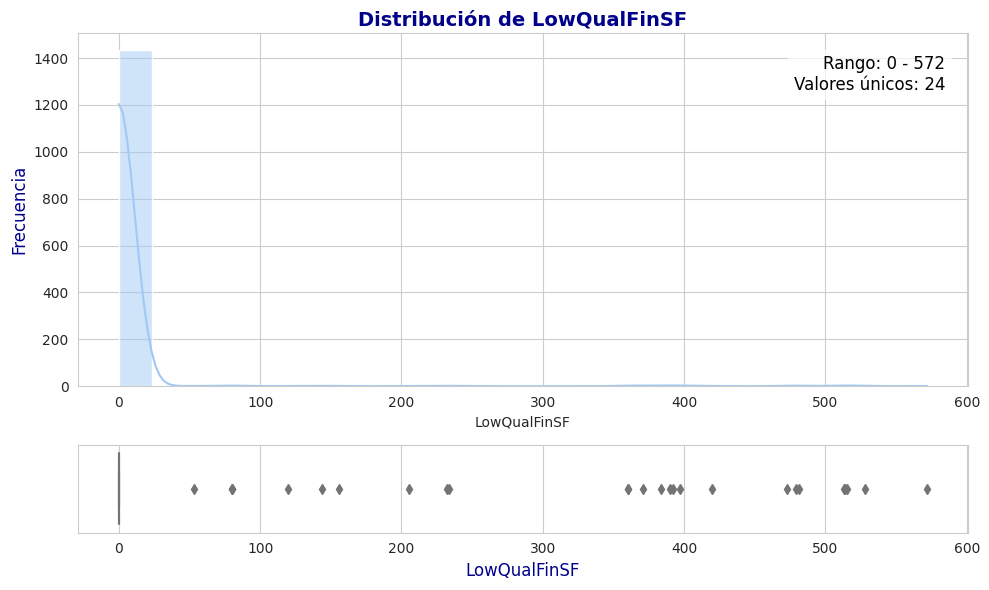

In [47]:
analizar_columna_num(name_col_num[15], datos_num)

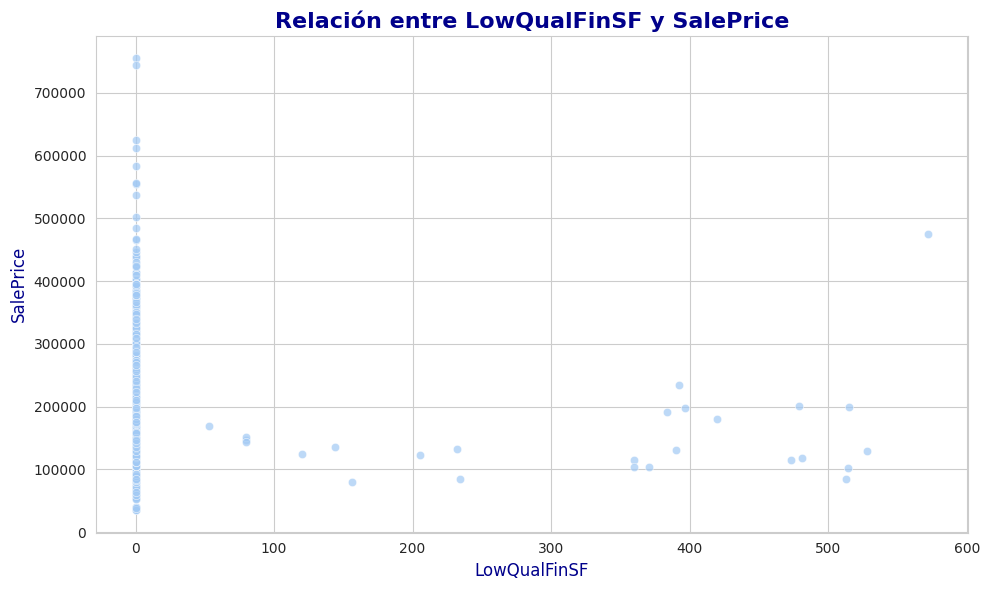

In [48]:
graficar_scatterplot(datos_num, name_col_num[15])

> Como se puede observar en los dos gráficos anteriores, una gran proporción de los datos presenta un valor de 0, y solo alrededor de 20 observaciones tienen valores distintos de cero. Además, al graficar en relación con la variable objetivo, no se aprecia una relación directa entre los pies cuadrados y el valor de la vivienda. Por lo tanto, podría ser útil evaluar el impacto de esta variable al **transformarla en una variable categórica** con solo dos valores, especificamente si existen propiedades con pies cuadrados que presentan acabados de baja calidad.

---
### Variable GrLivArea
---

> Esta variable representa la superficie habitable sobre el nivel del suelo (pies cuadrados)

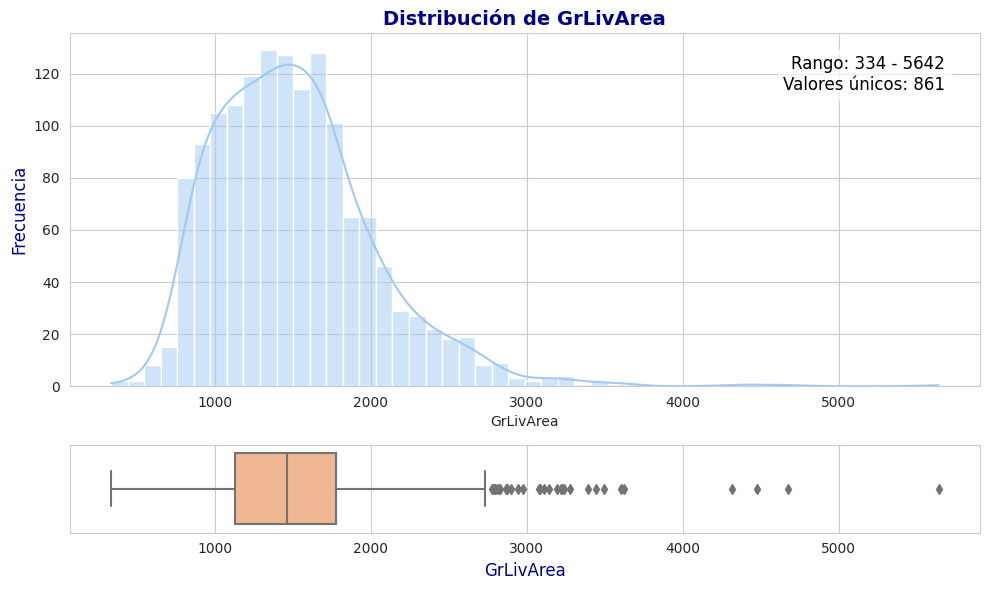

In [50]:
analizar_columna_num(name_col_num[16], datos_num)

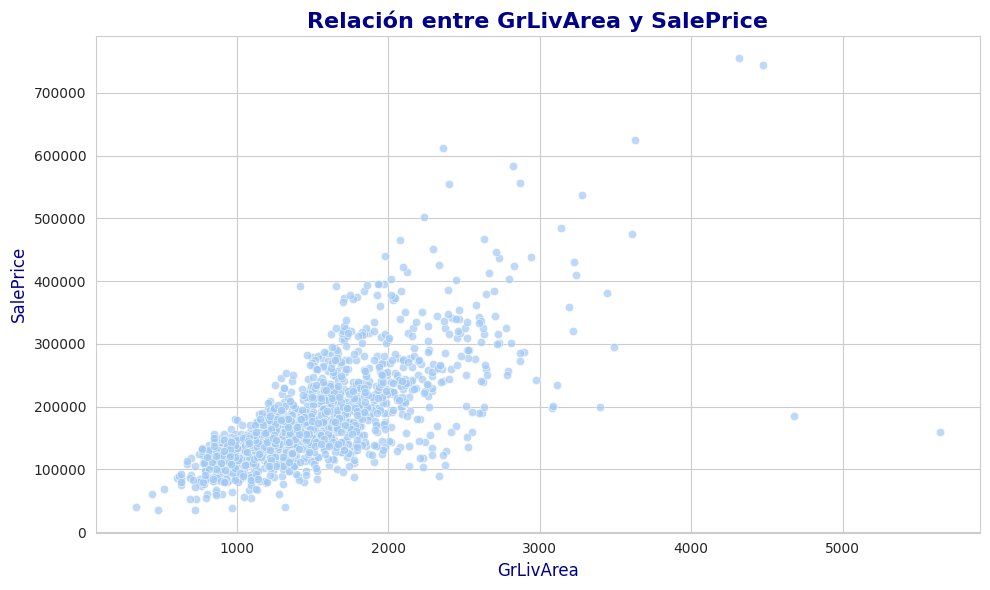

In [51]:
graficar_scatterplot(datos_num, name_col_num[16])

> Se probarán diferentes transformaciones con el fin de atenuar los outliers y obtener una distribución más adecuada para el análisis.

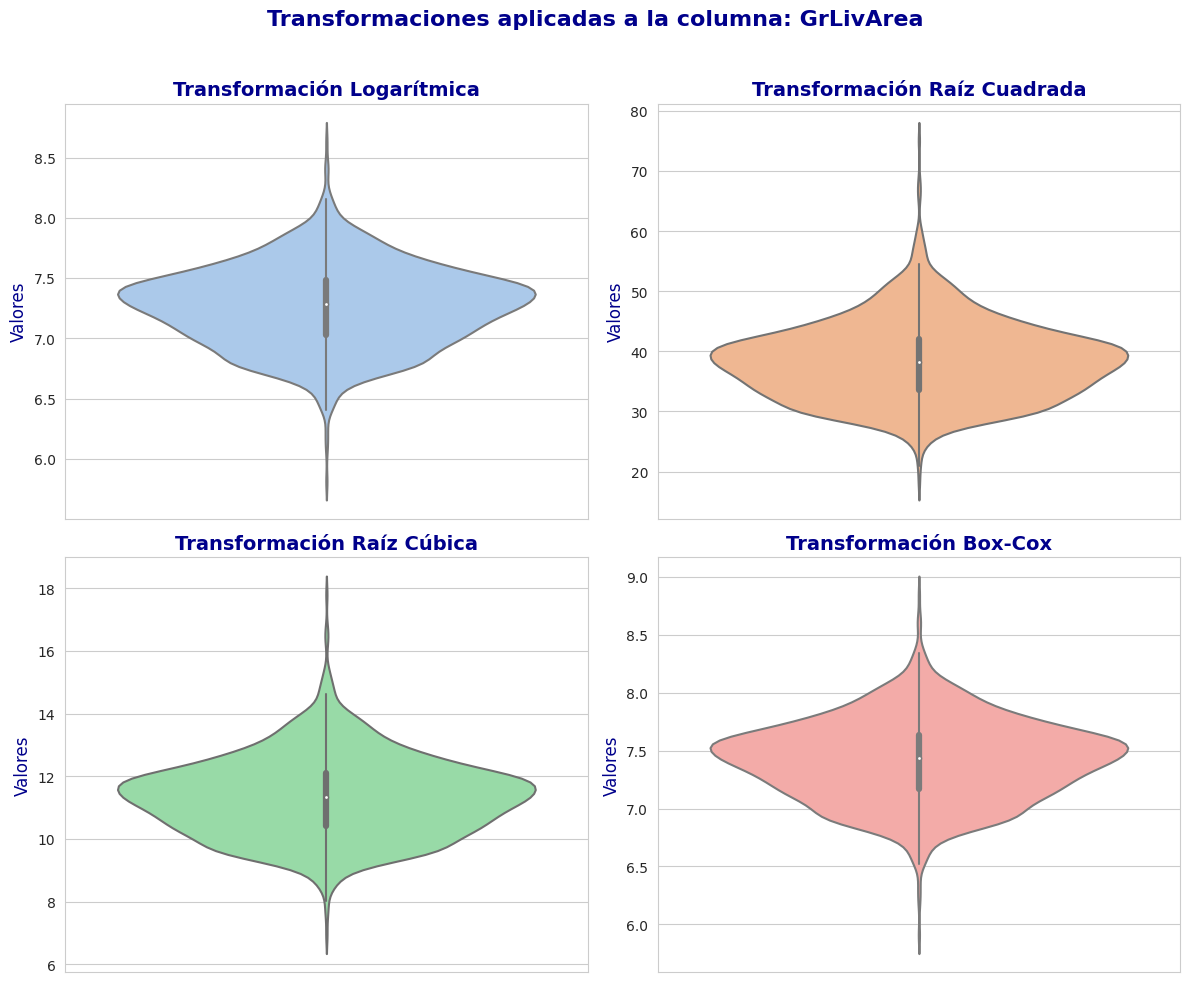

In [52]:
transformar_y_graficar_violin(datos_num, name_col_num[16])

> Al analizar las distintas transformaciones aplicadas a esta variable, se observa que la transformación **Logarítmica y Box-Cox** son las más adecuadas, ya que ambas logran una distribución más concentrada, además de reducir la dispersión de los datos.

---
### Variable BsmtFullBath
---

> Esta variable representa los baños completos en sótano

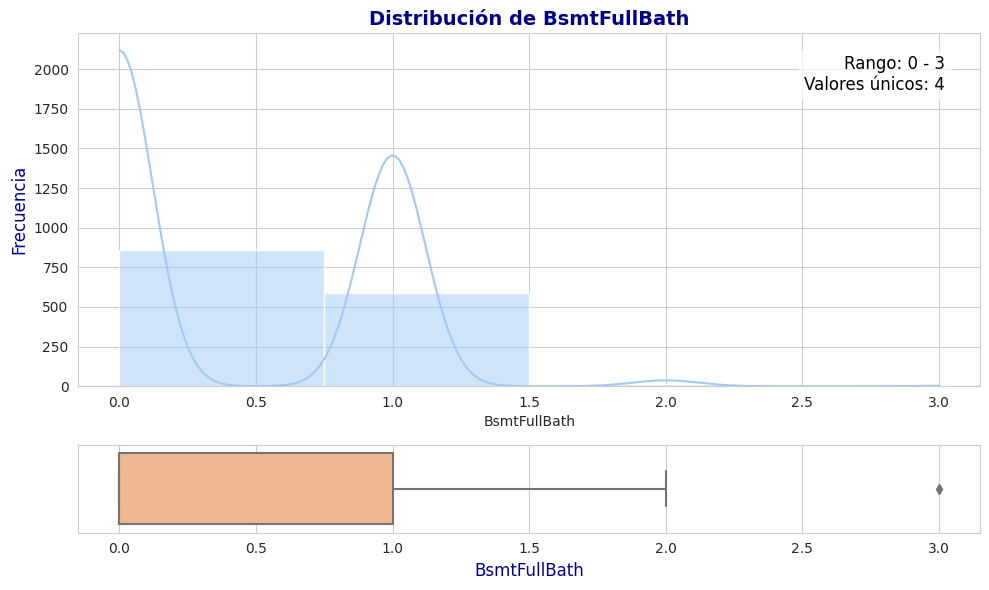

In [53]:
analizar_columna_num(name_col_num[17], datos_num)

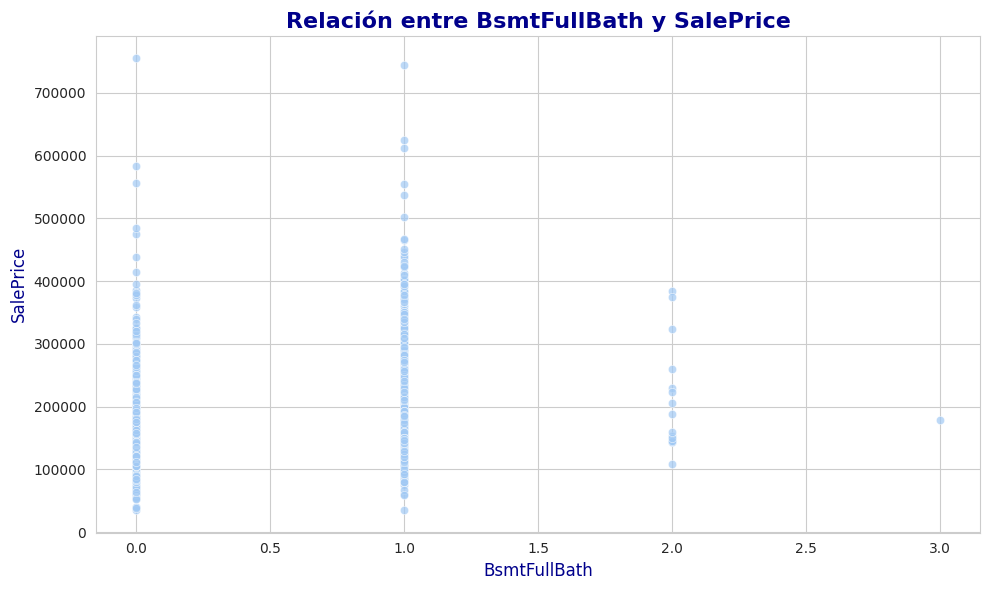

In [54]:
graficar_scatterplot(datos_num, name_col_num[17])

> Dada la naturaleza de esta variable y la distribución de sus valores, lo más apropiado es **transformarla en una variable categórica**.

---
### Variable BsmtHalfBath
---

> Esta variable representa la cantidad de medios baños en el sótano

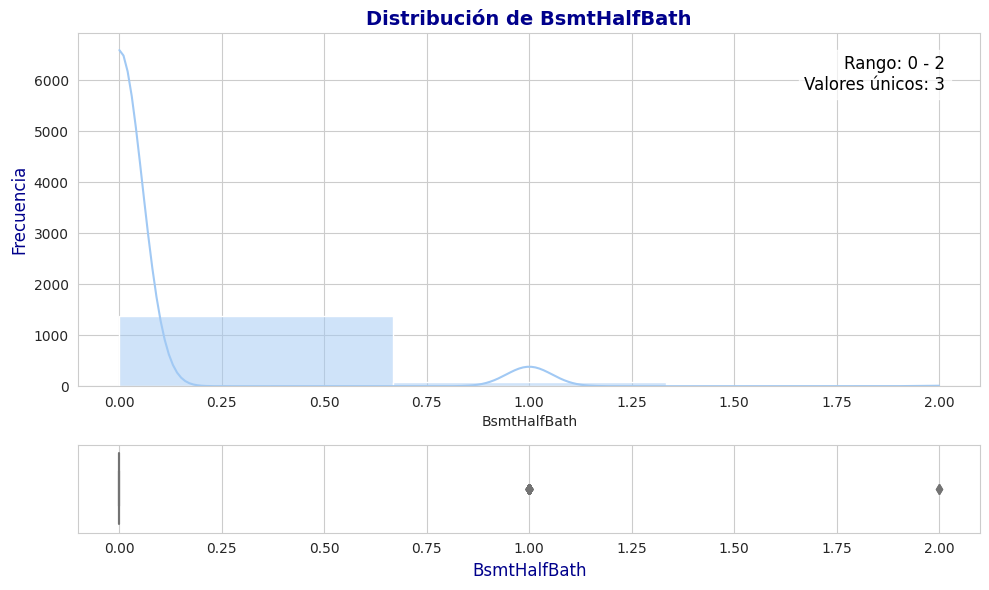

In [56]:
analizar_columna_num(name_col_num[18], datos_num)

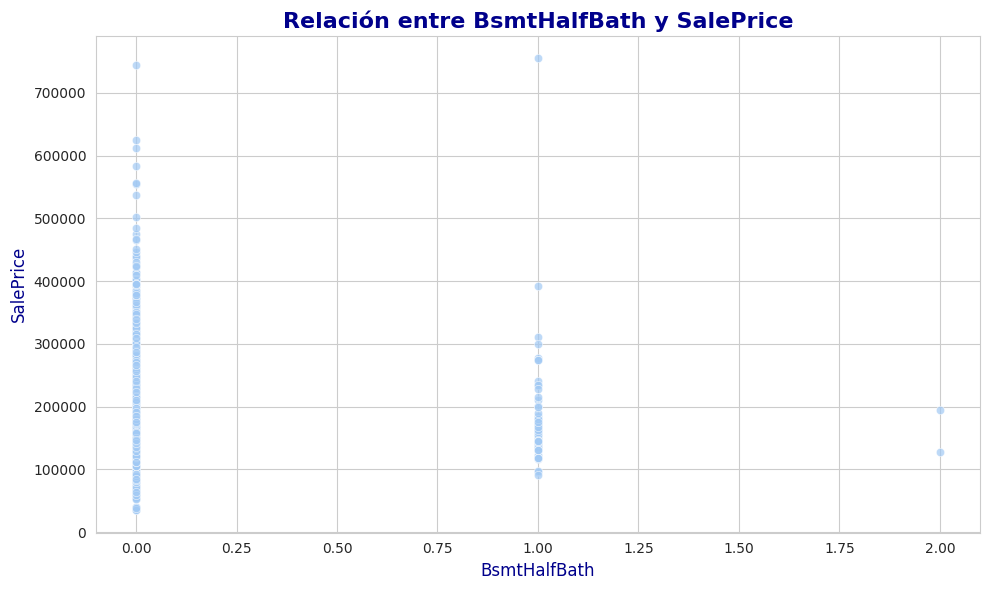

In [57]:
graficar_scatterplot(datos_num, name_col_num[18])

> Dada la naturaleza de esta variable y la distribución de sus valores, lo más apropiado es **transformarla en una variable categórica**.

---
### Variable FullBath
---

> Esta variable representa la cantidad de cuartos de baño completos sobre rasante

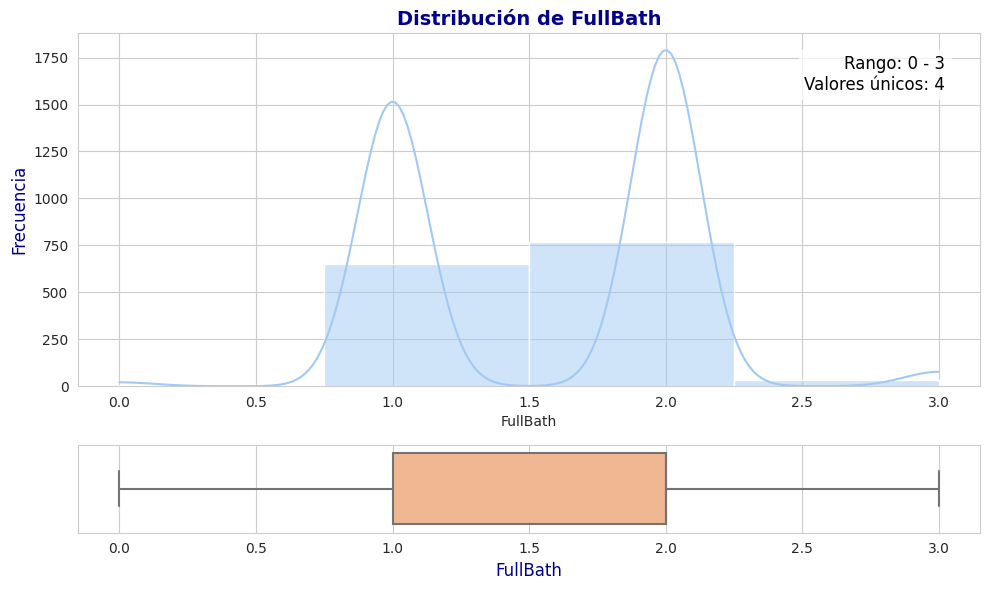

In [59]:
analizar_columna_num(name_col_num[19], datos_num)

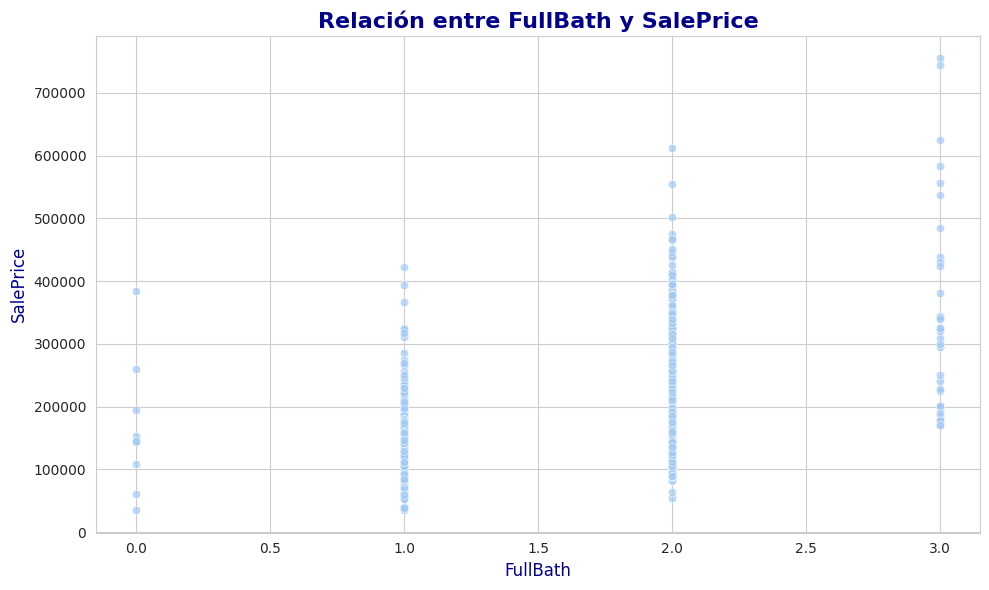

In [60]:
graficar_scatterplot(datos_num, name_col_num[19])

Dada la naturaleza de esta variable y la distribución de sus valores, lo más apropiado es **transformarla en una variable categórica**.

---
### Variable HalfBath
---

> Esta variable representa la cantidad de medios baños sobre rasante

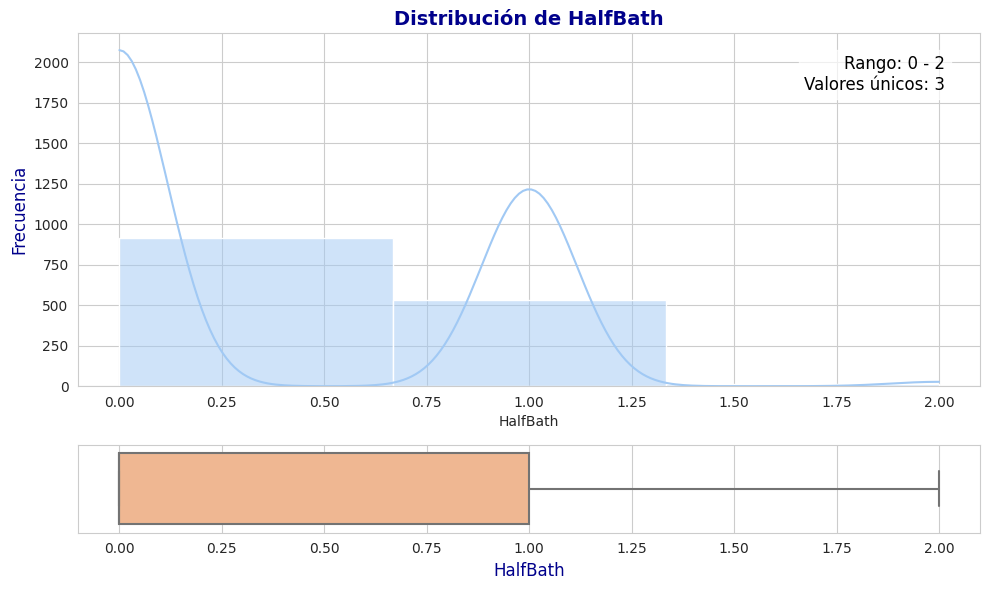

In [62]:
analizar_columna_num(name_col_num[20], datos_num)

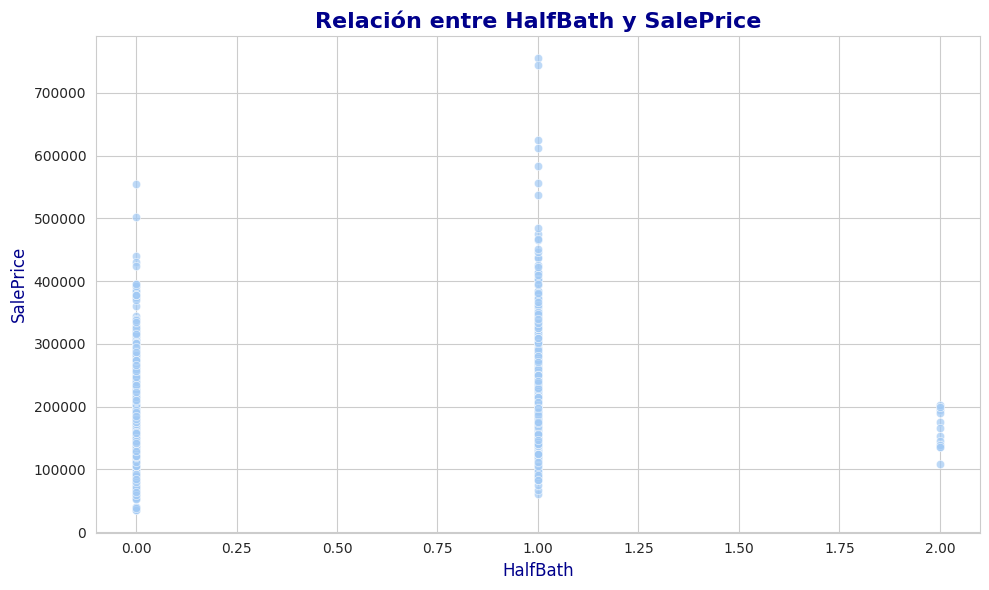

In [63]:
graficar_scatterplot(datos_num, name_col_num[20])

Dada la naturaleza de esta variable y la distribución de sus valores, lo más apropiado es **transformarla en una variable categórica**.

---
### Variable BedroomAbvGr
---

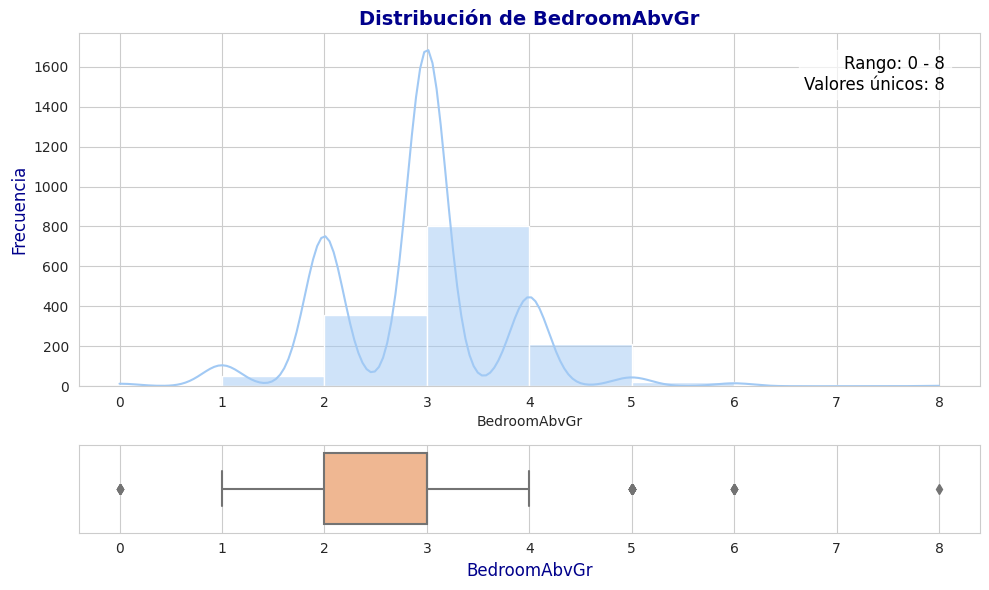

In [65]:
analizar_columna_num(name_col_num[21], datos_num)

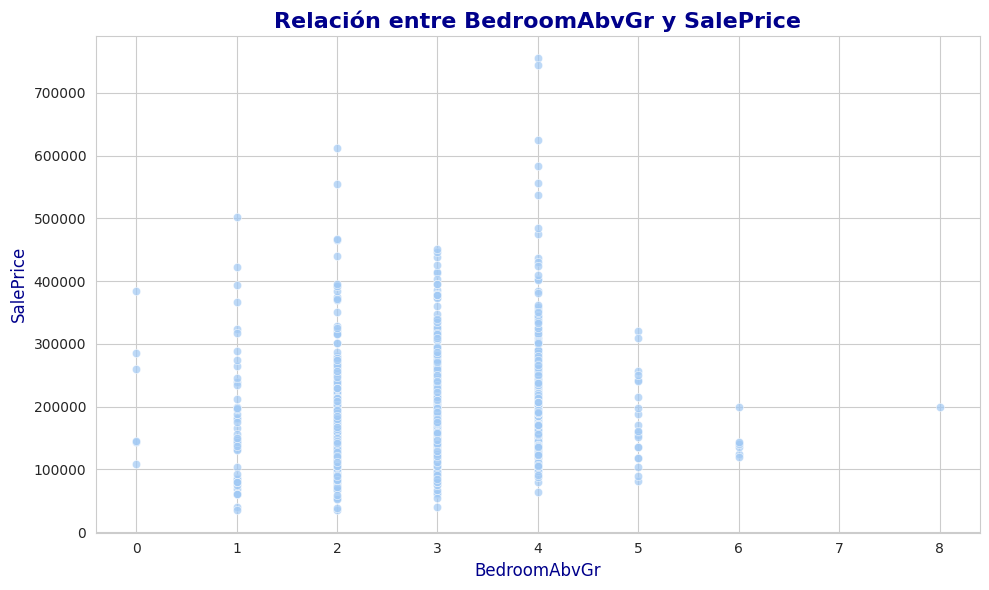

In [66]:
graficar_scatterplot(datos_num, name_col_num[21])

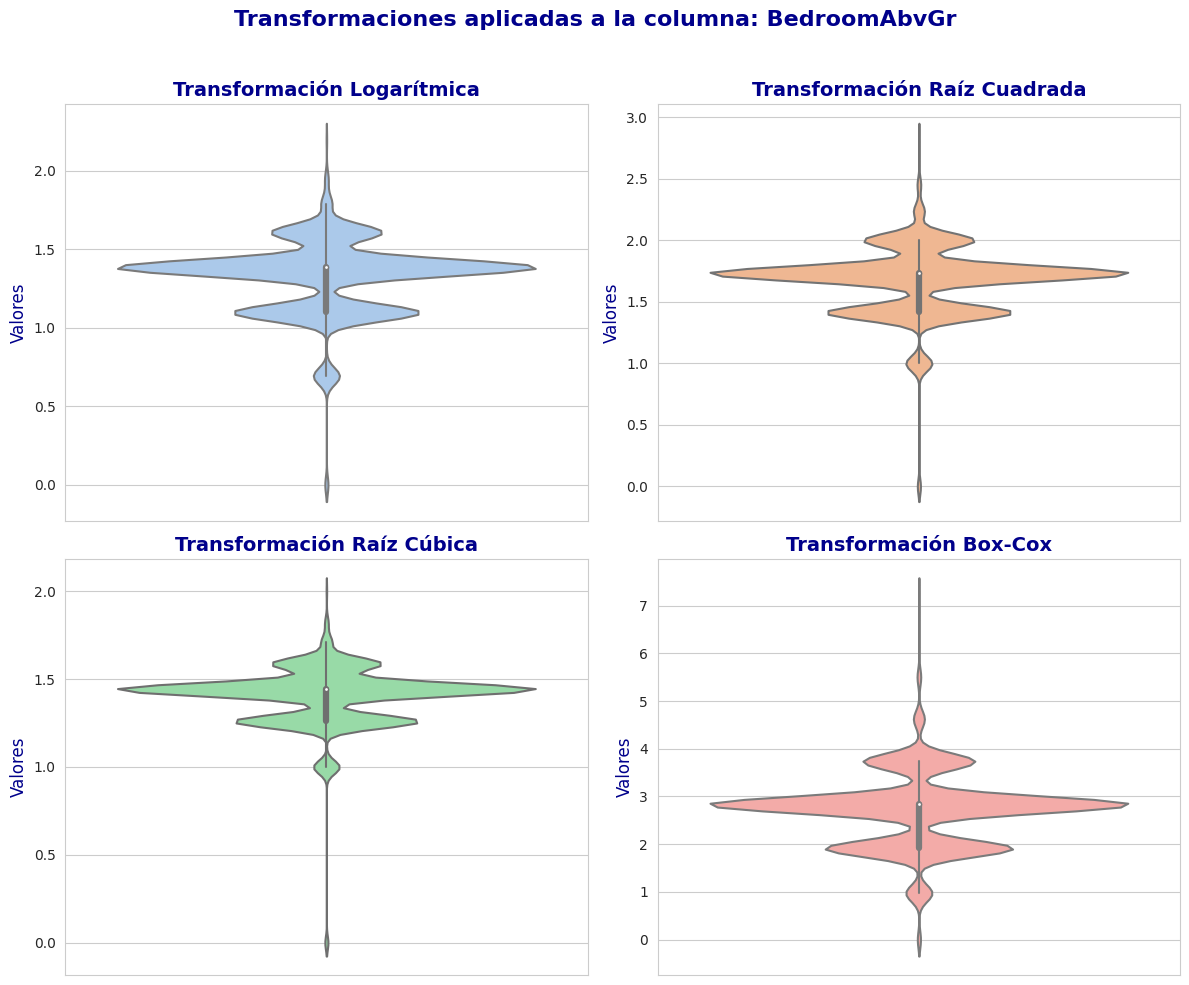

In [67]:
transformar_y_graficar_violin(datos_num, name_col_num[21])

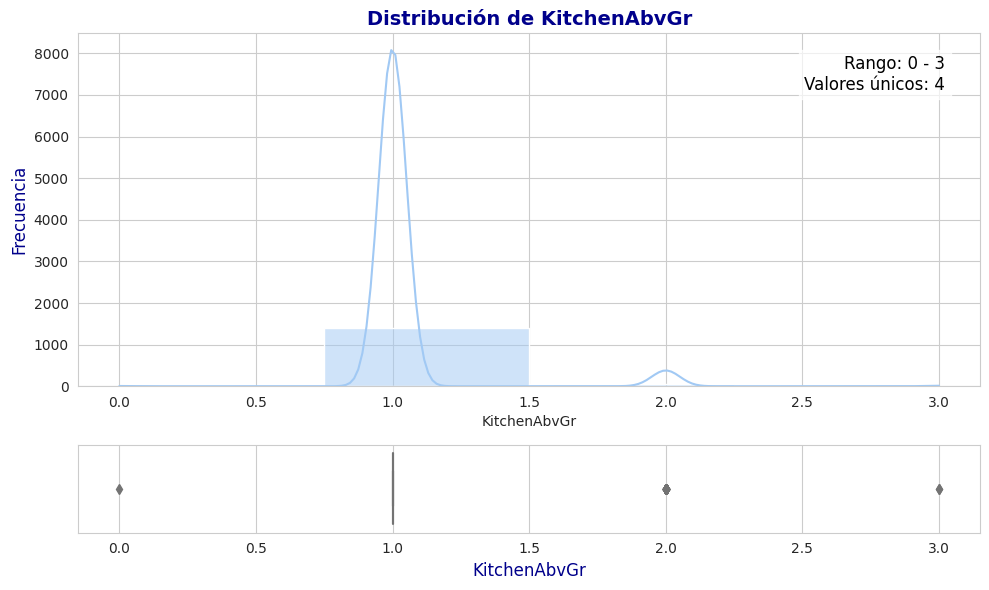

In [68]:
analizar_columna_num(name_col_num[22], datos_num)

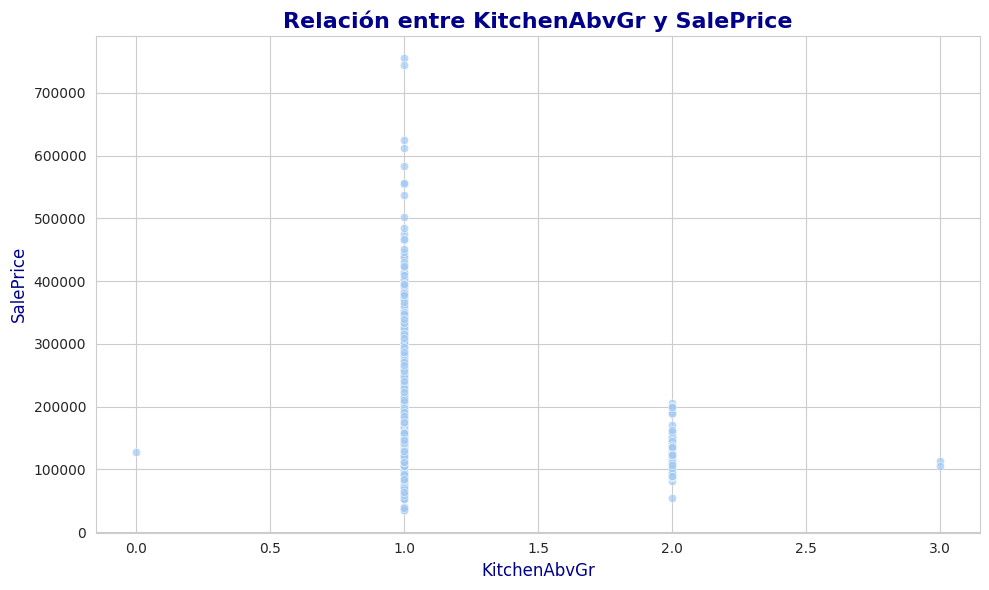

In [69]:
graficar_scatterplot(datos_num, name_col_num[22])

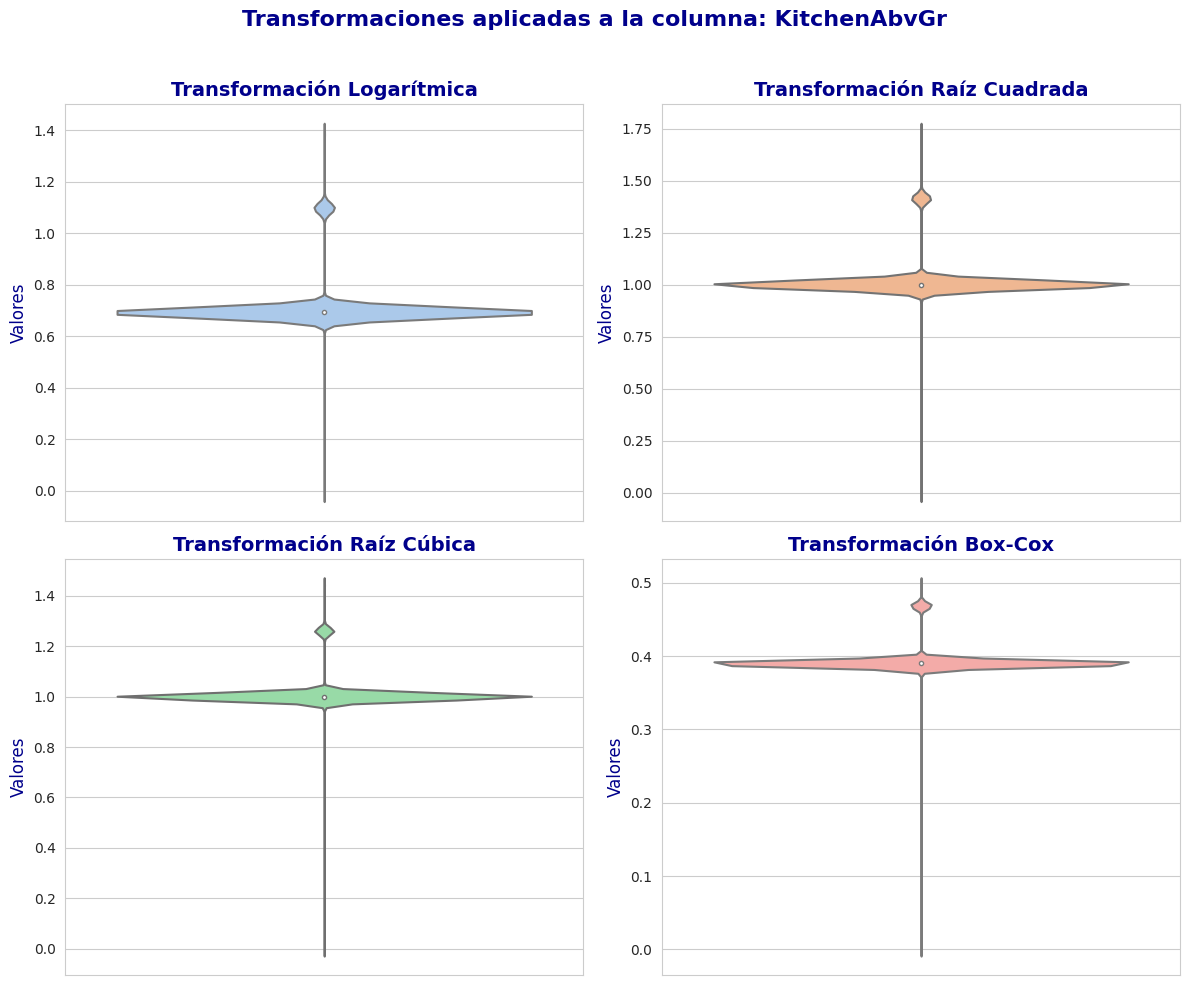

In [70]:
transformar_y_graficar_violin(datos_num, name_col_num[22])

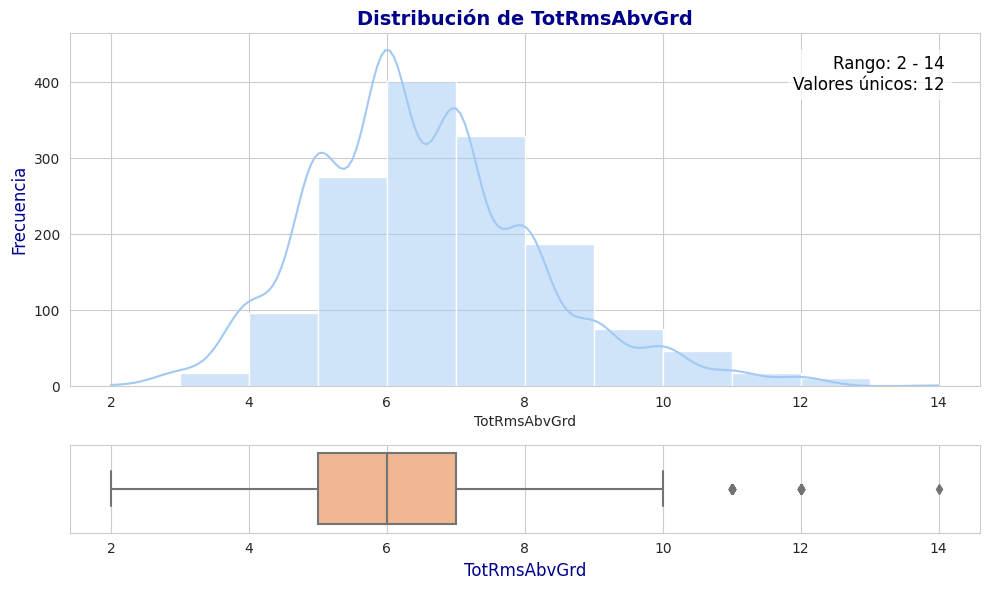

In [71]:
analizar_columna_num(name_col_num[23], datos_num)

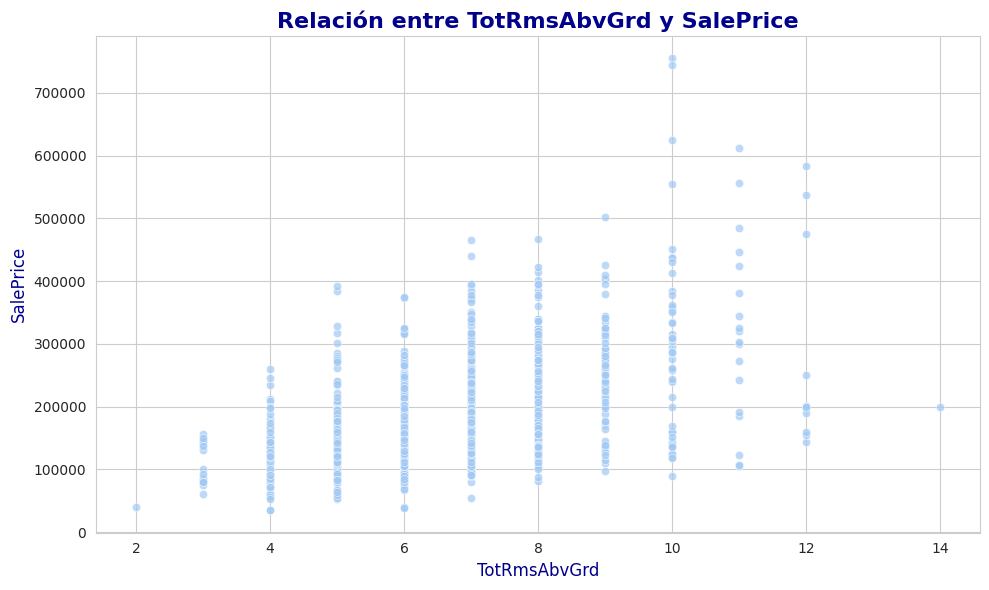

In [72]:
graficar_scatterplot(datos_num, name_col_num[23])

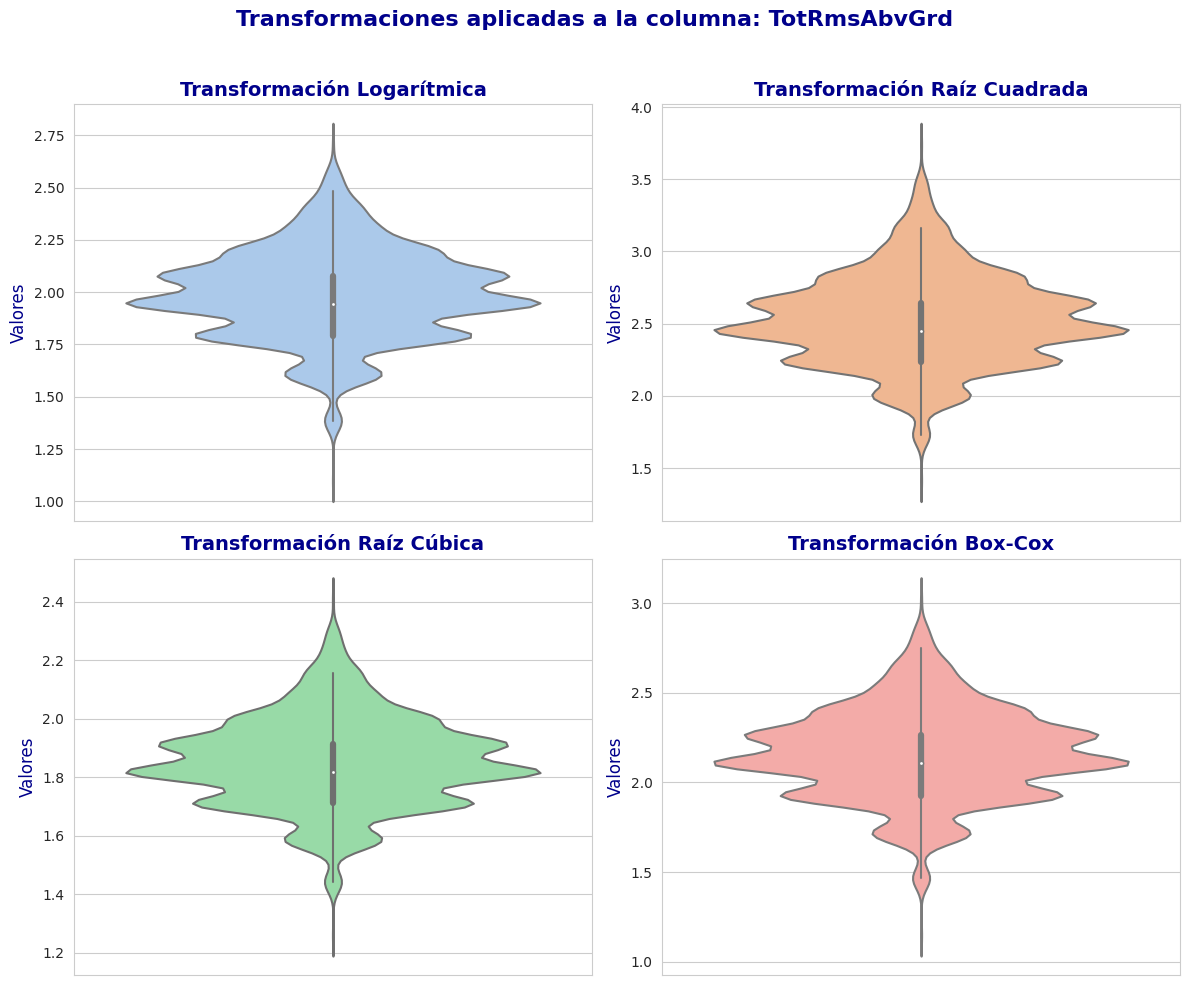

In [73]:
transformar_y_graficar_violin(datos_num, name_col_num[23])

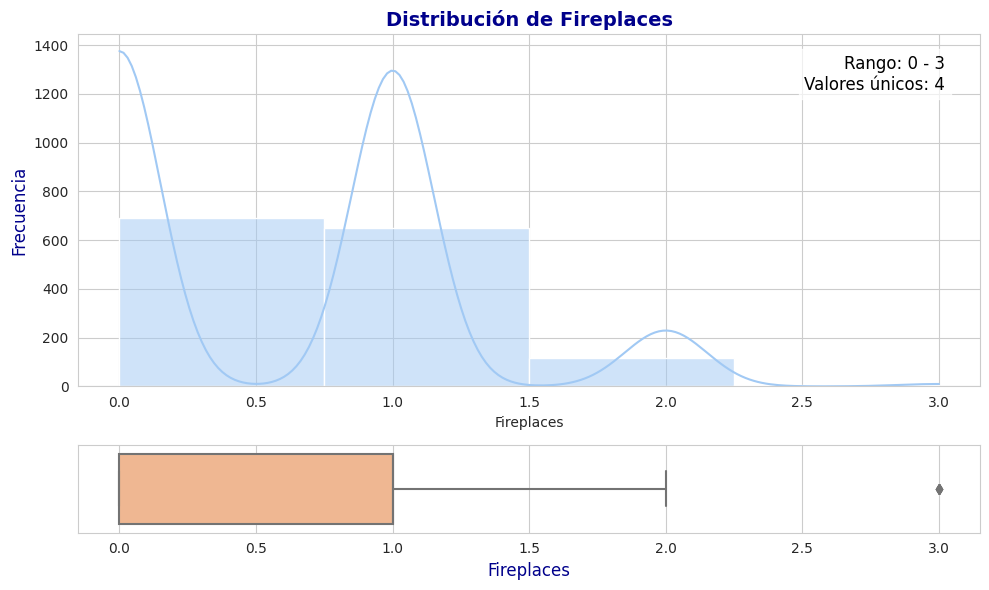

In [74]:
analizar_columna_num(name_col_num[24], datos_num)

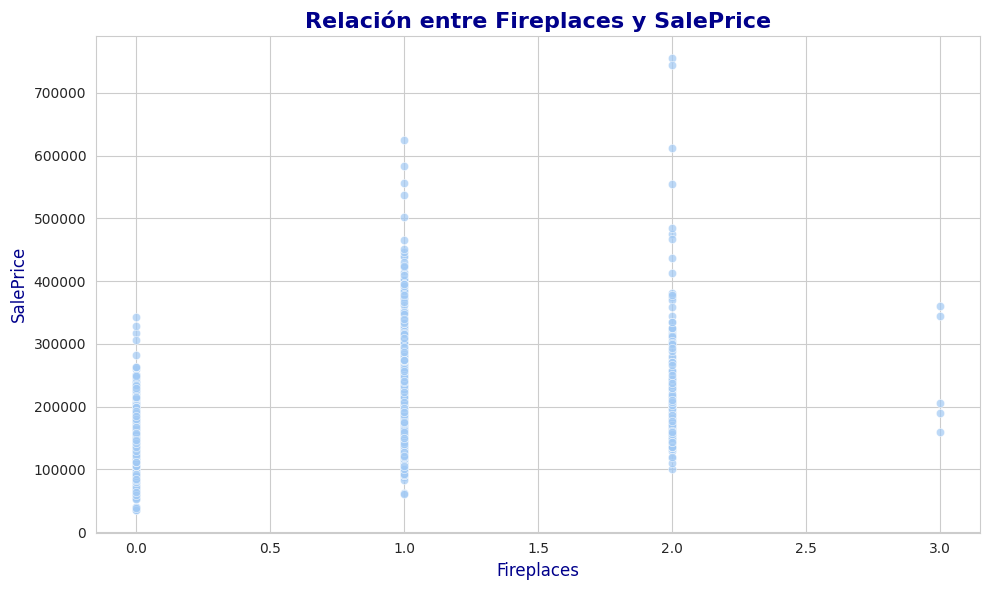

In [75]:
graficar_scatterplot(datos_num, name_col_num[24])

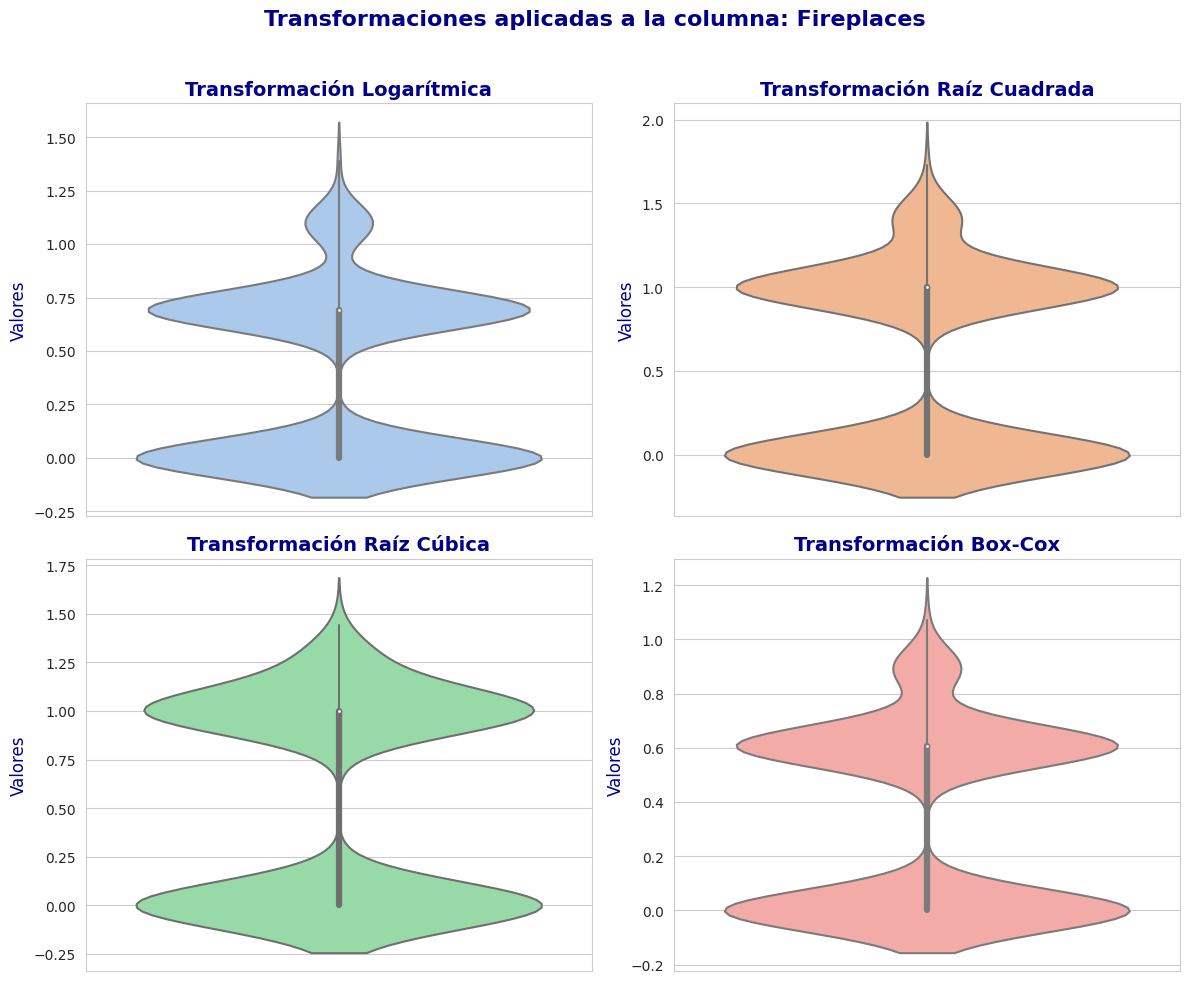

In [76]:
transformar_y_graficar_violin(datos_num, name_col_num[24])

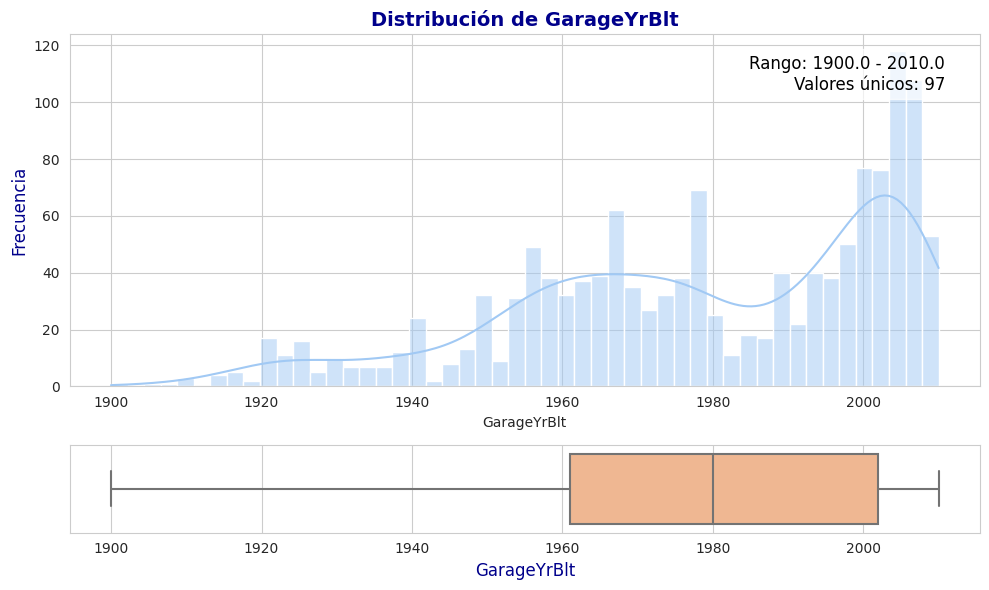

In [77]:
analizar_columna_num(name_col_num[25], datos_num)

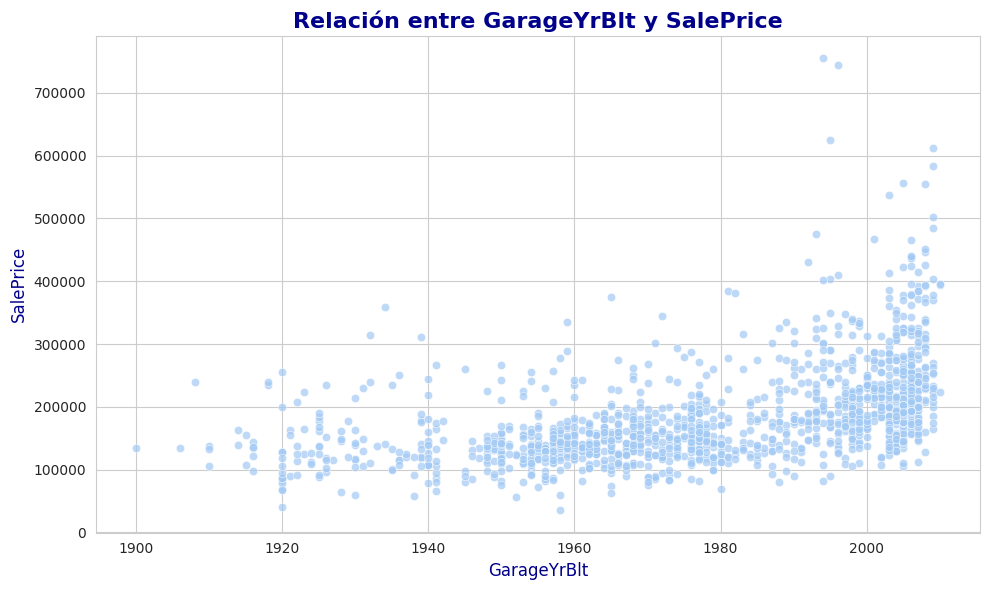

In [78]:
graficar_scatterplot(datos_num, name_col_num[25])

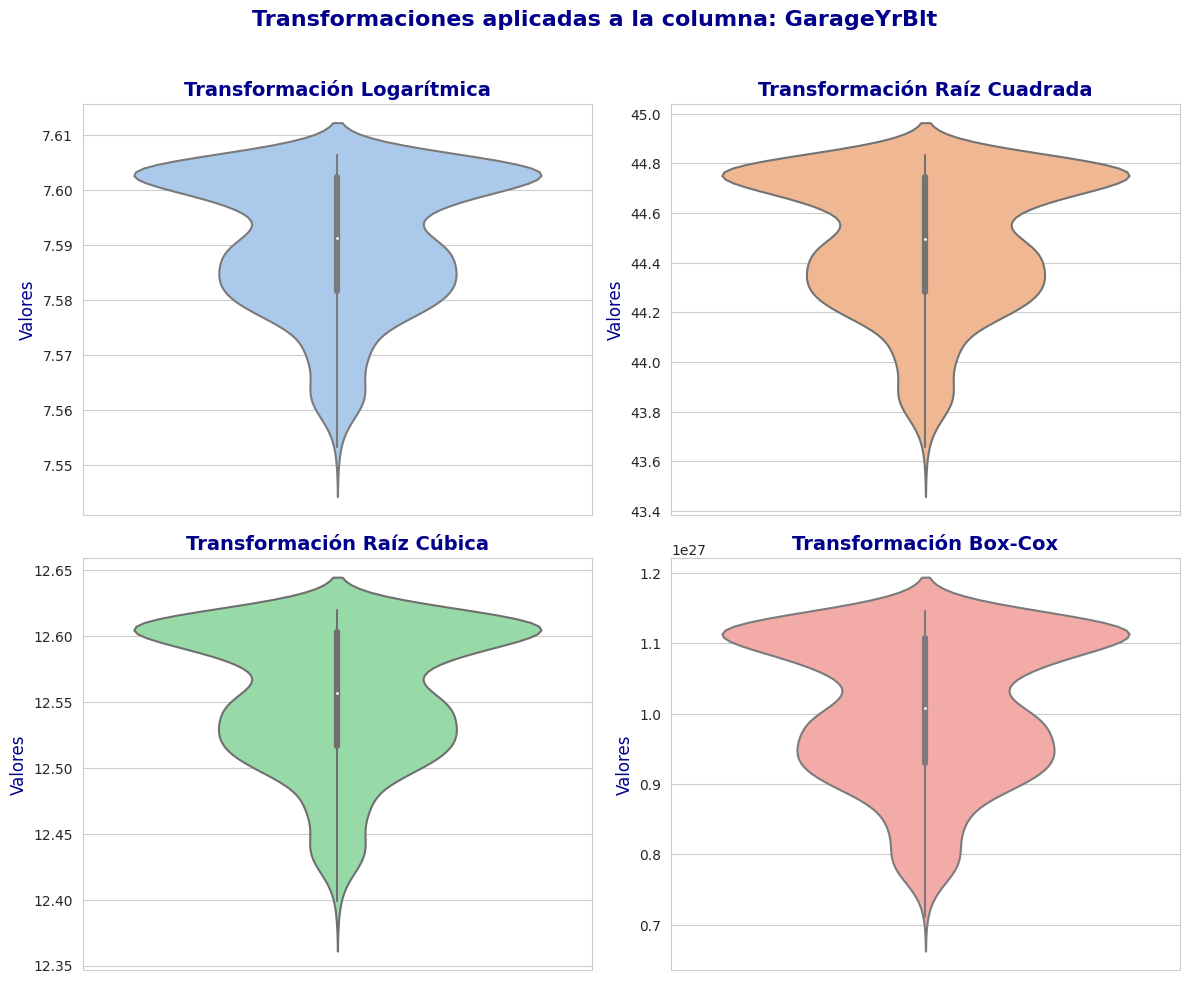

In [79]:
transformar_y_graficar_violin(datos_num, name_col_num[25])

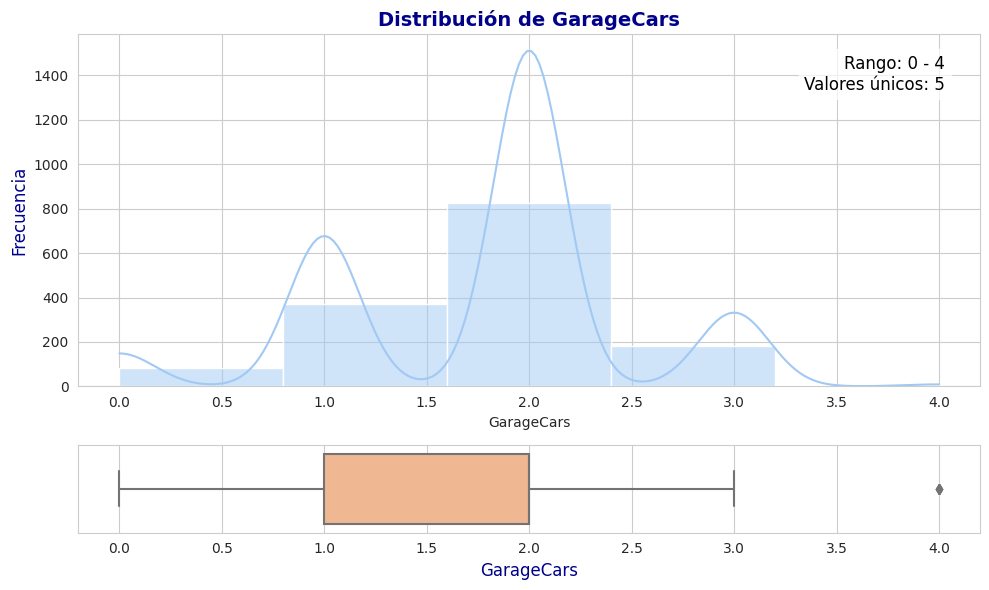

In [80]:
analizar_columna_num(name_col_num[26], datos_num)

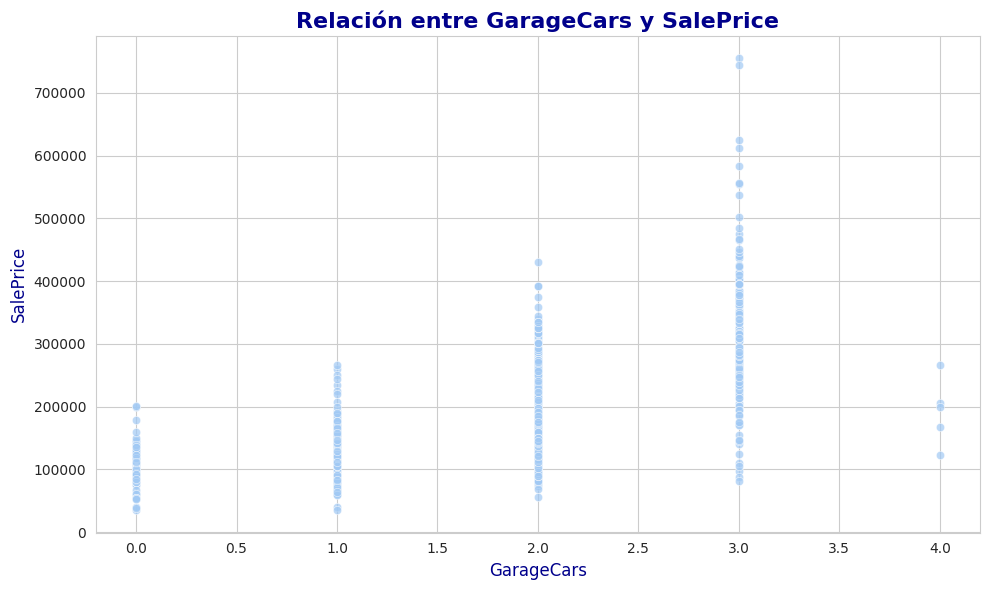

In [81]:
graficar_scatterplot(datos_num, name_col_num[26])

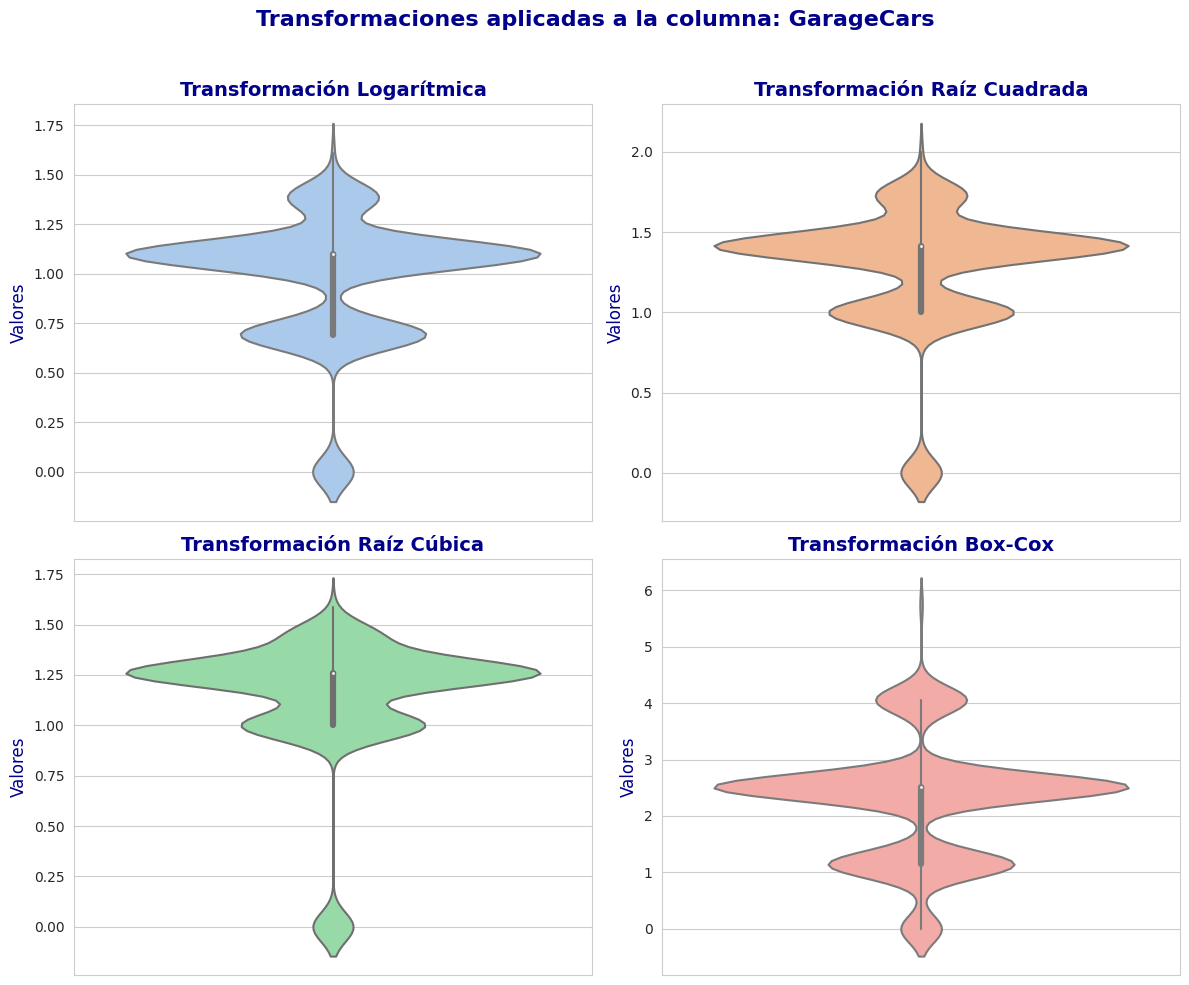

In [82]:
transformar_y_graficar_violin(datos_num, name_col_num[26])

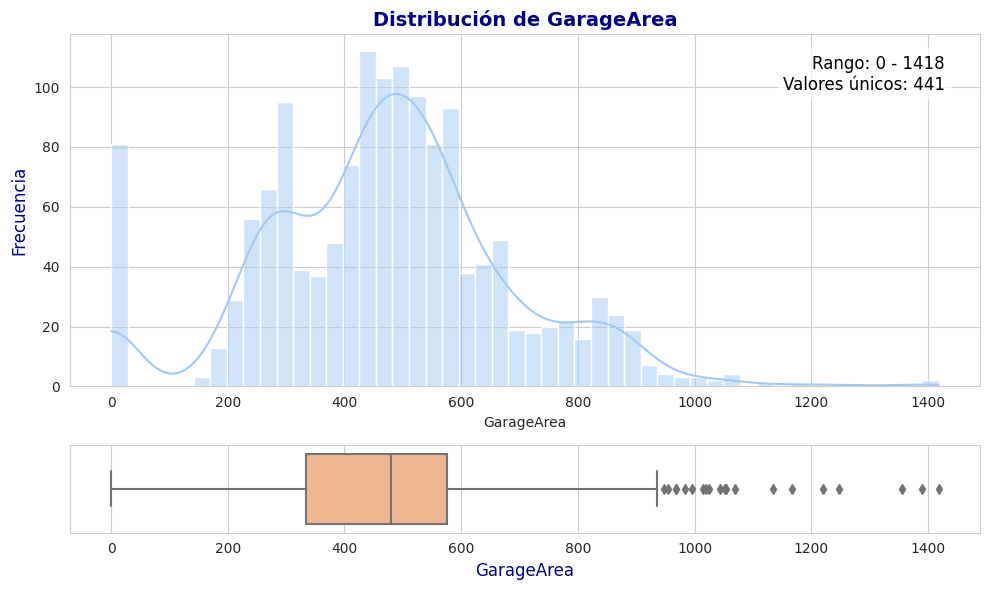

In [83]:
analizar_columna_num(name_col_num[27], datos_num)

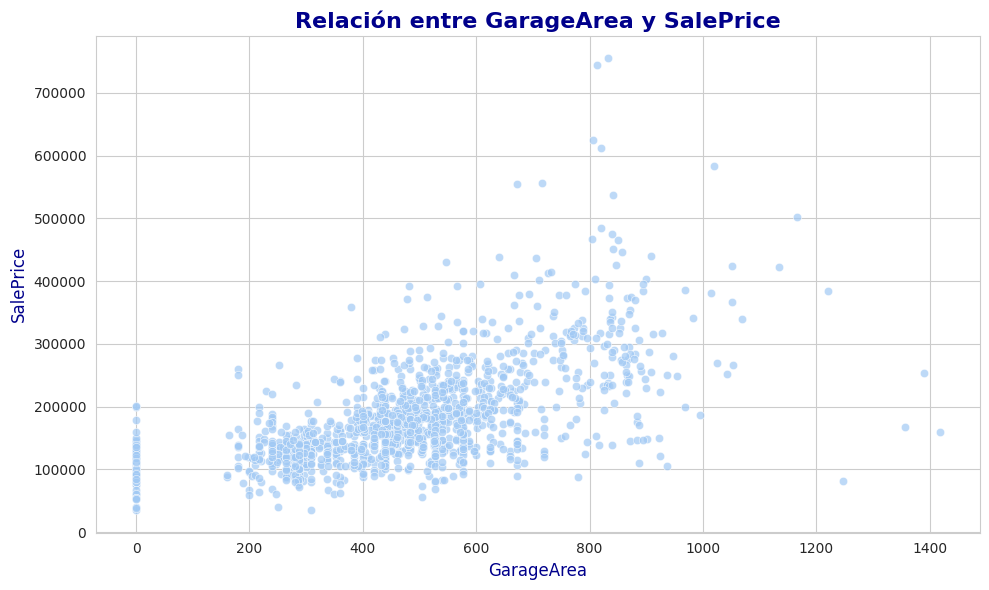

In [84]:
graficar_scatterplot(datos_num, name_col_num[27])

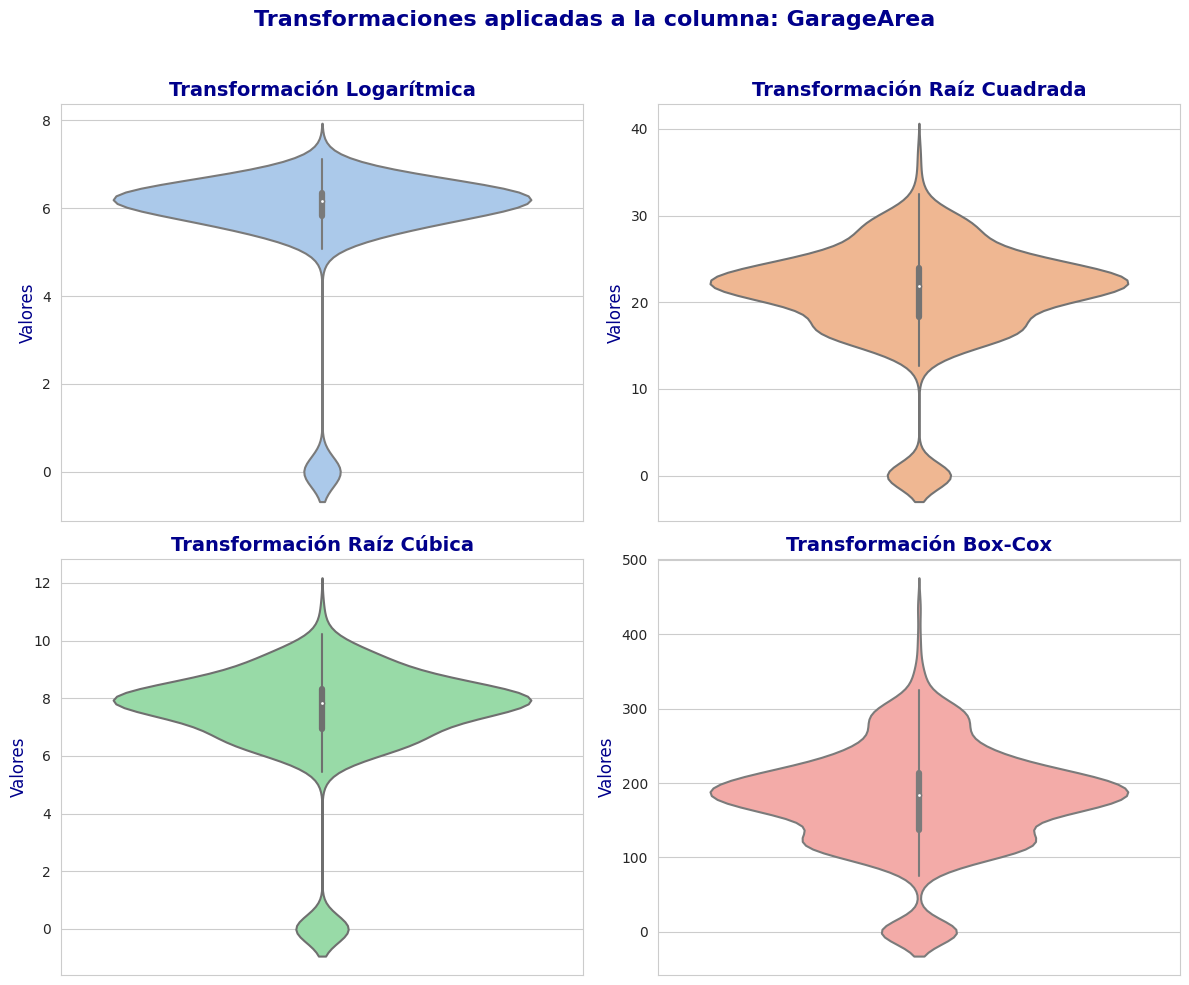

In [85]:
transformar_y_graficar_violin(datos_num, name_col_num[27])

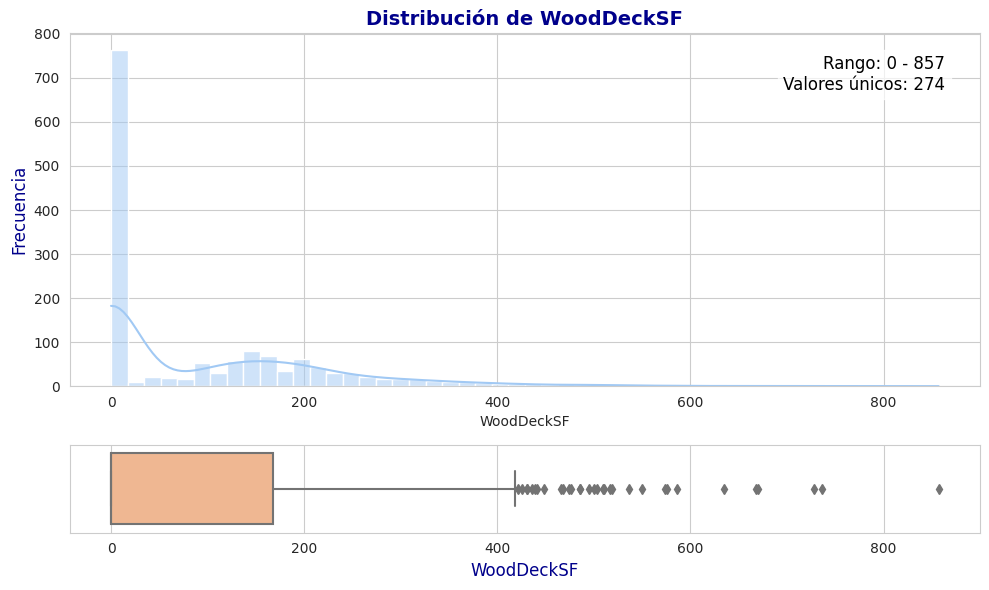

In [86]:
analizar_columna_num(name_col_num[28], datos_num)

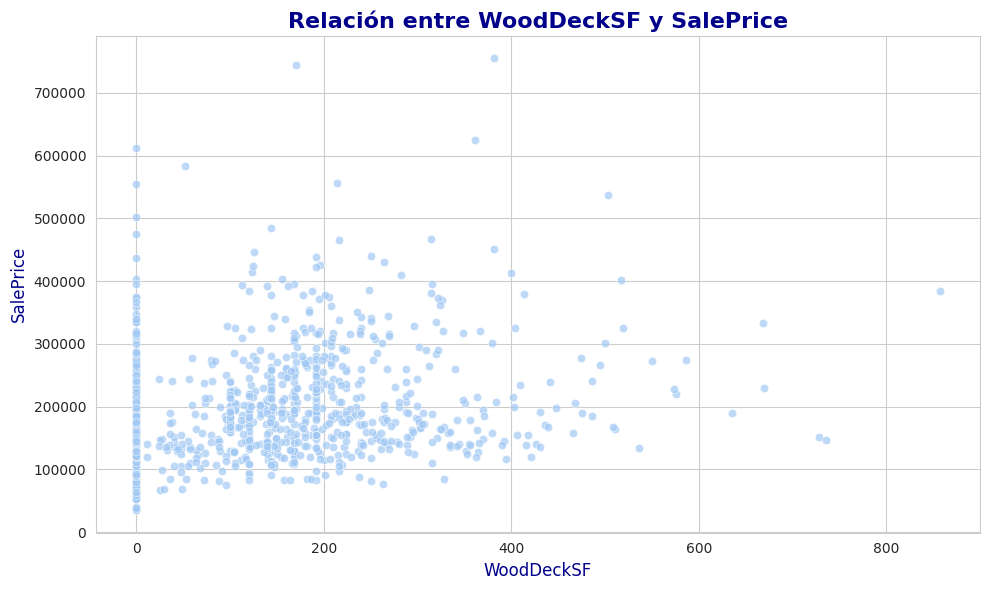

In [87]:
graficar_scatterplot(datos_num, name_col_num[28])

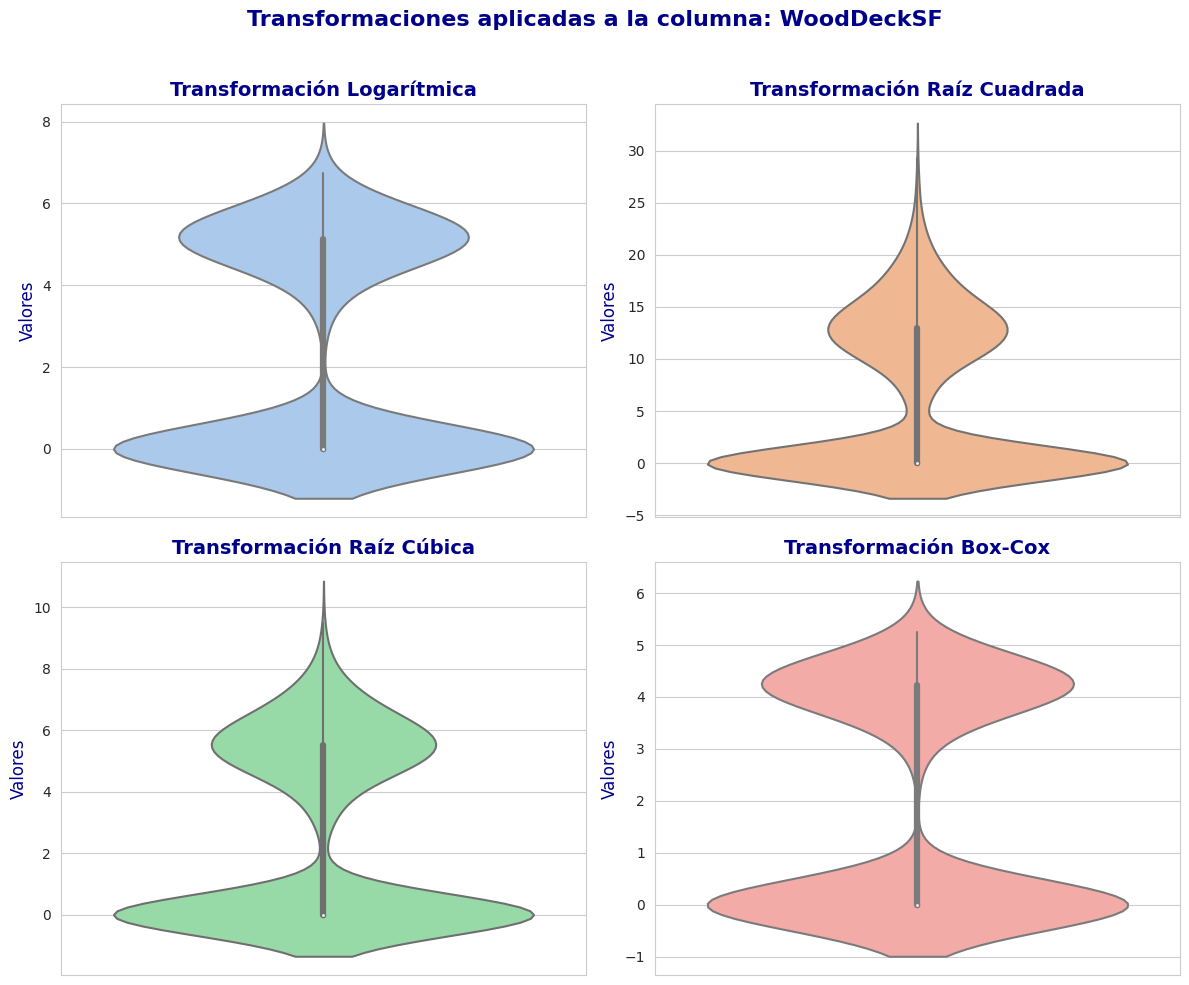

In [88]:
transformar_y_graficar_violin(datos_num, name_col_num[28])

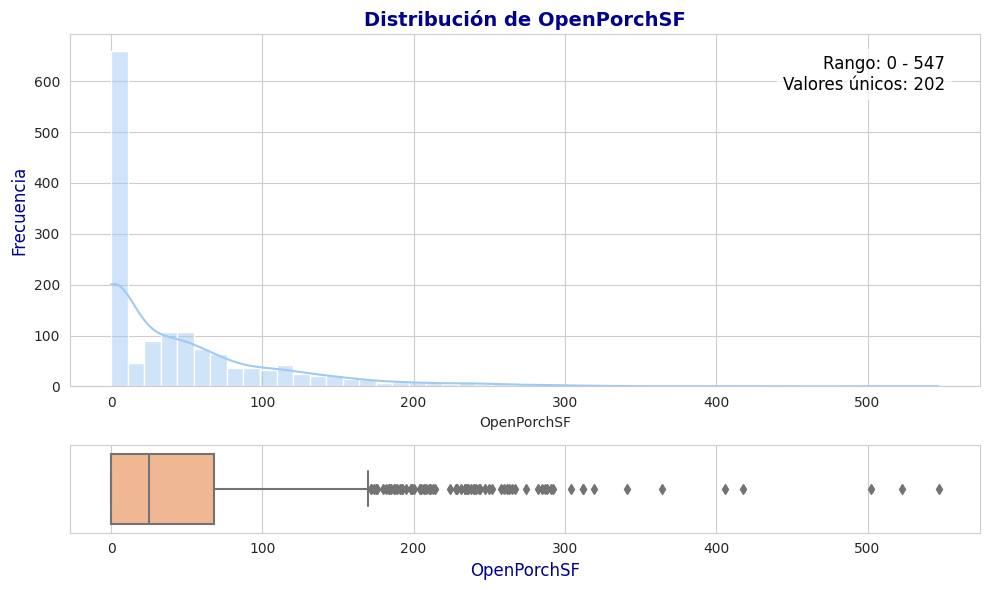

In [89]:
analizar_columna_num(name_col_num[29], datos_num)

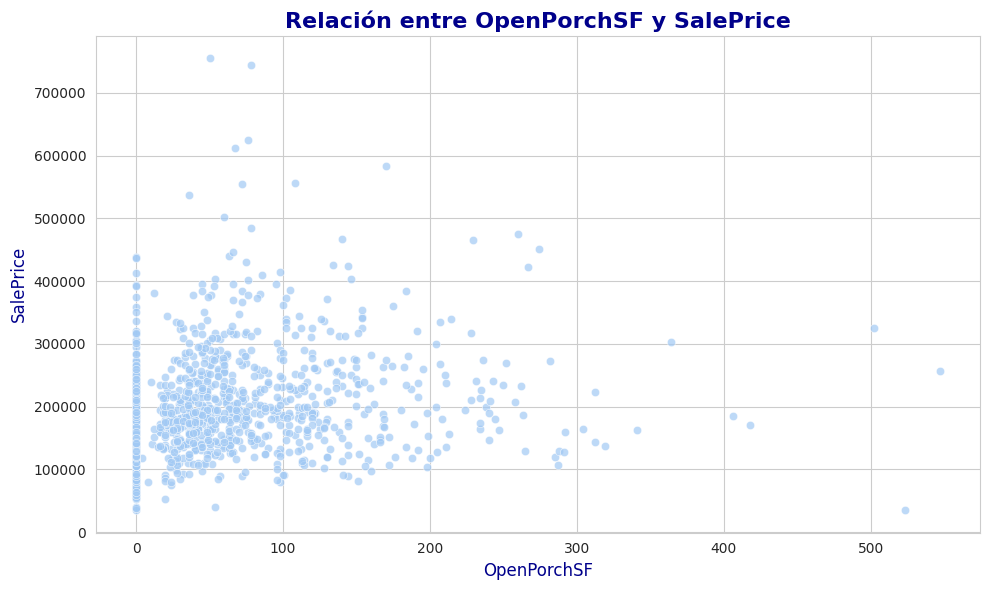

In [90]:
graficar_scatterplot(datos_num, name_col_num[29])

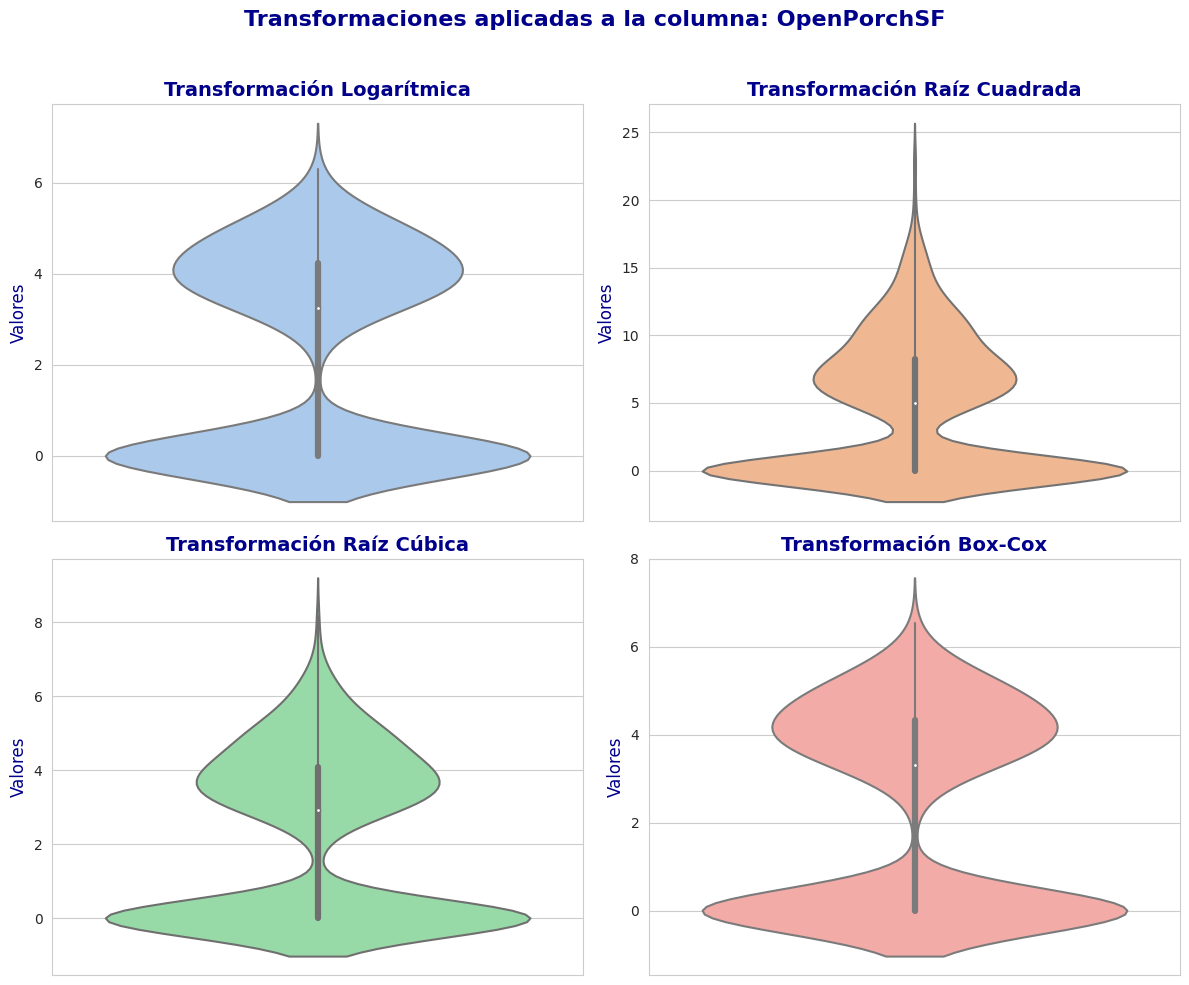

In [91]:
transformar_y_graficar_violin(datos_num, name_col_num[29])

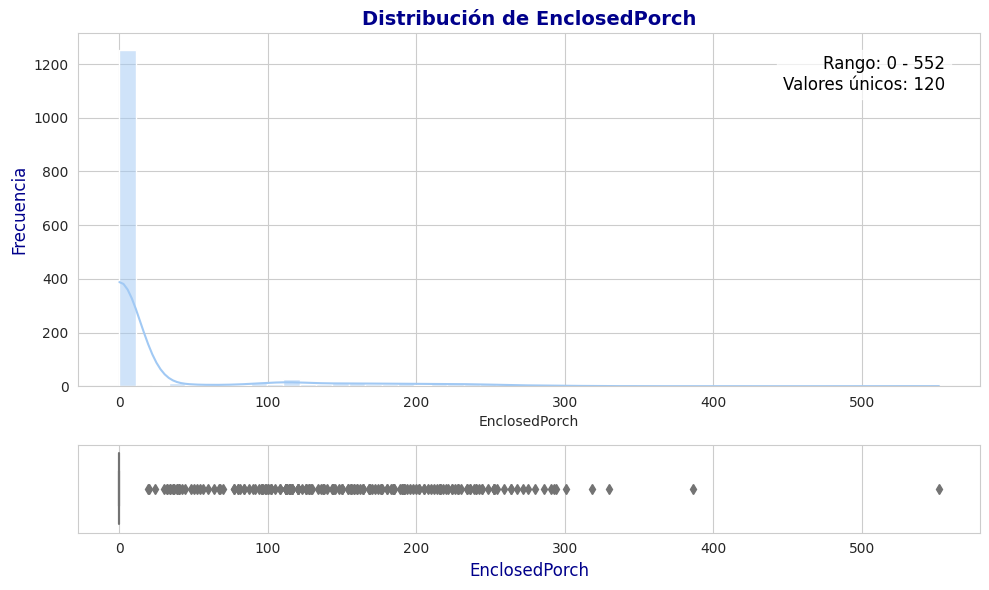

In [92]:
analizar_columna_num(name_col_num[30], datos_num)

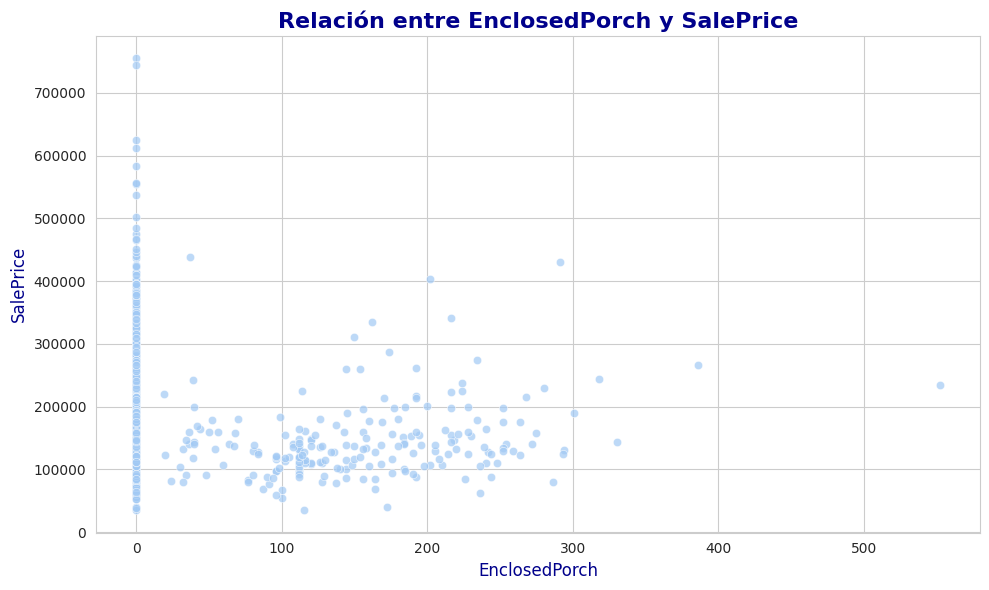

In [93]:
graficar_scatterplot(datos_num, name_col_num[30])

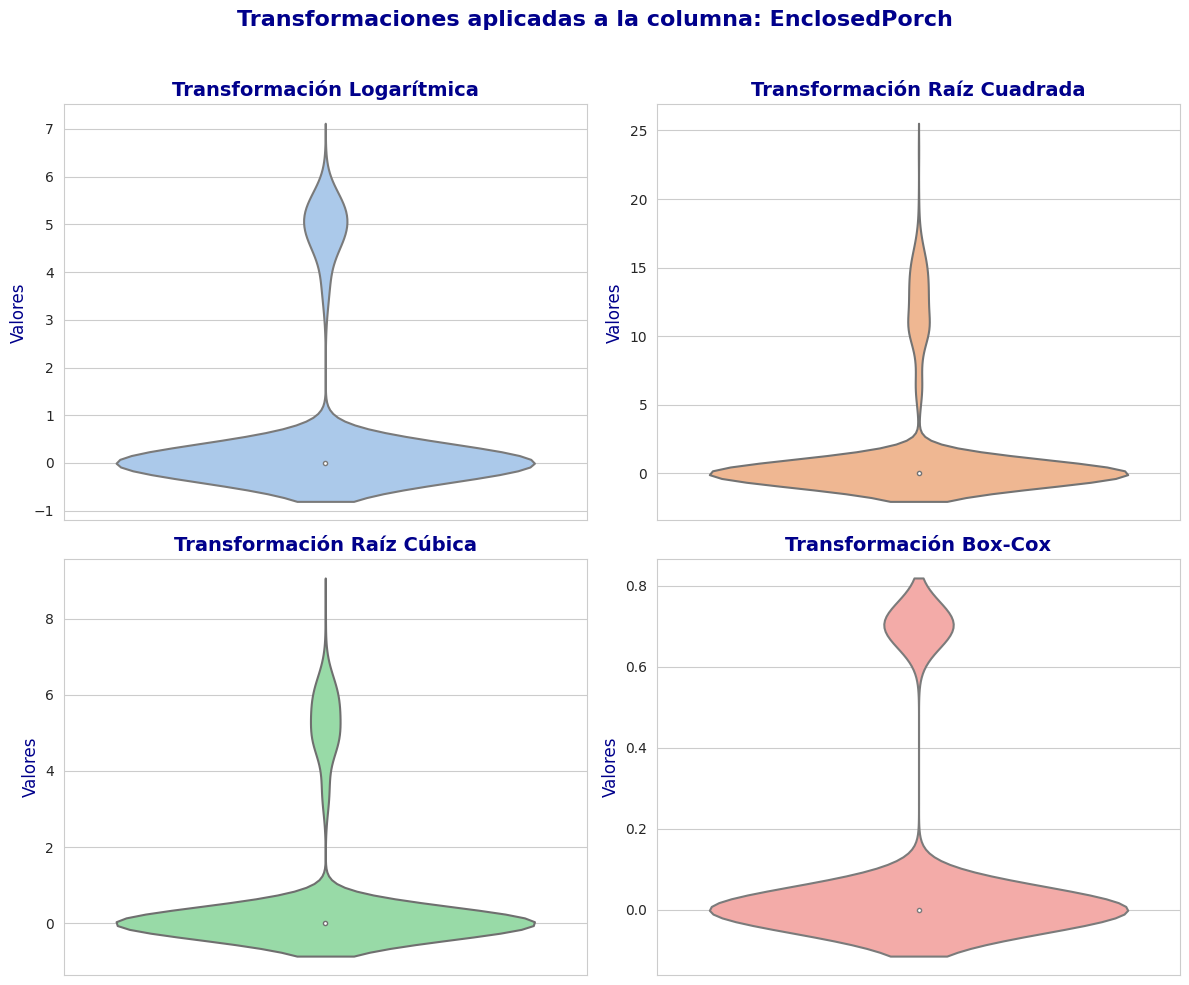

In [94]:
transformar_y_graficar_violin(datos_num, name_col_num[30])

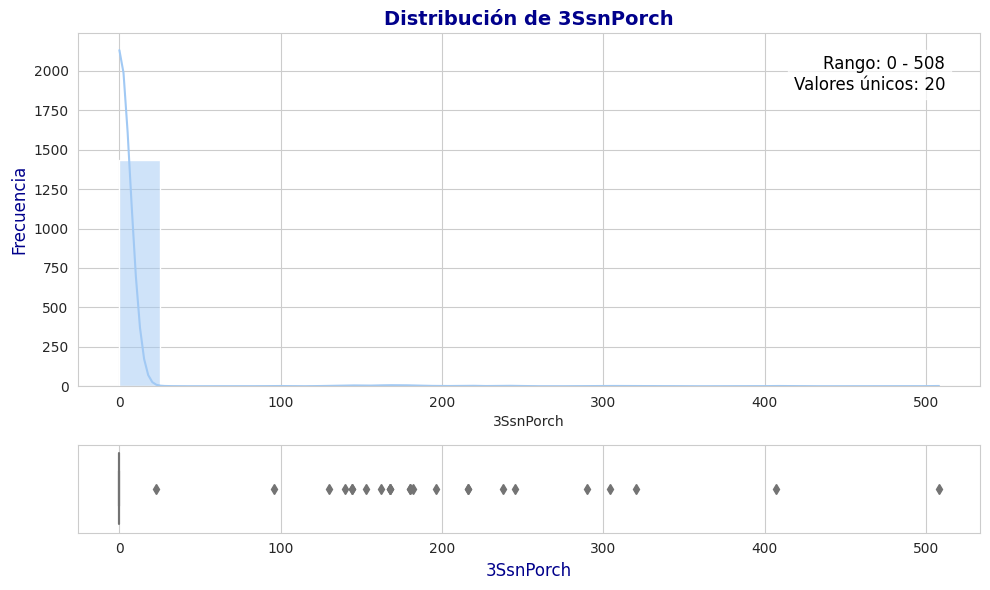

In [95]:
analizar_columna_num(name_col_num[31], datos_num)

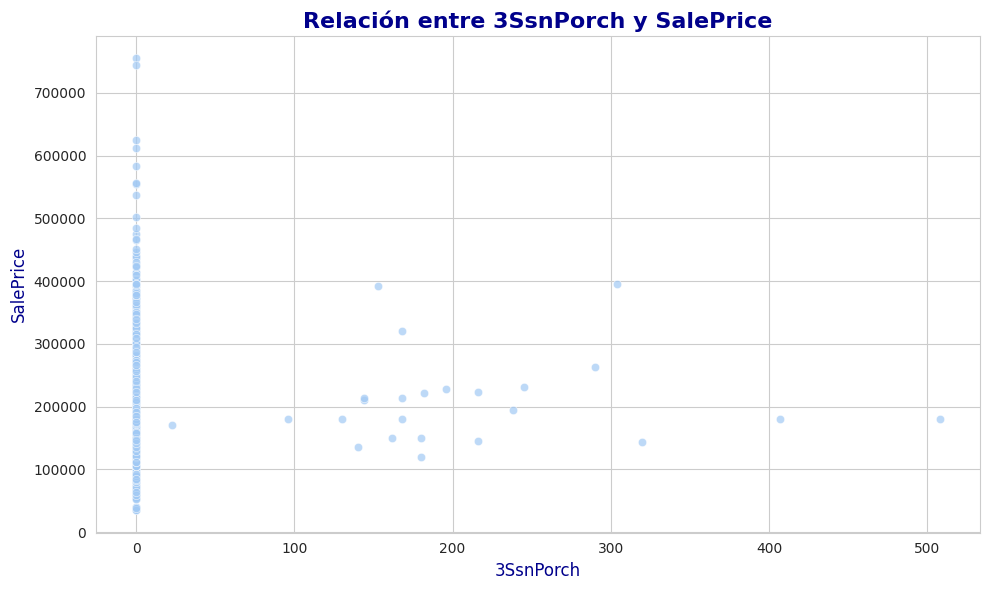

In [96]:
graficar_scatterplot(datos_num, name_col_num[31])

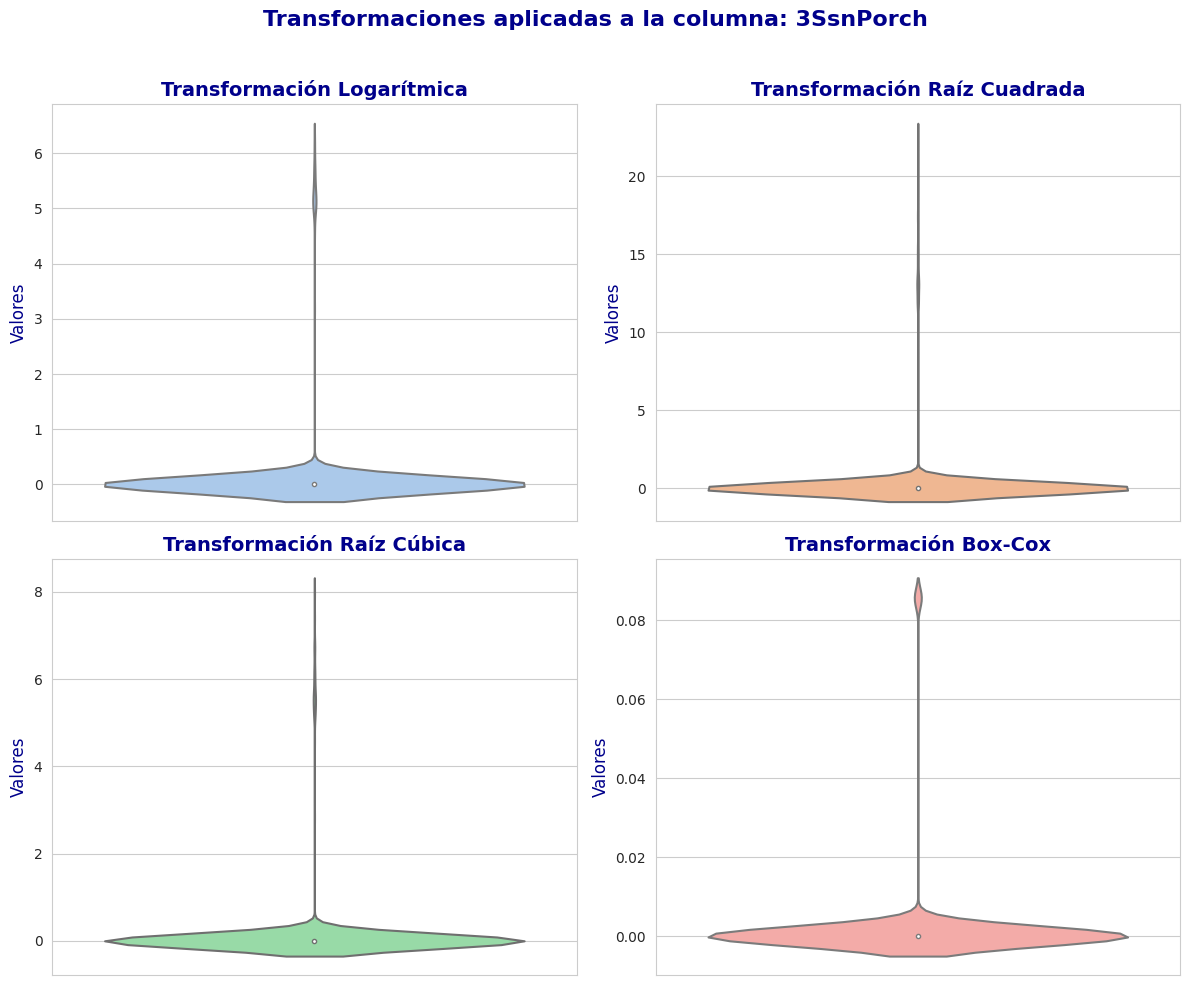

In [97]:
transformar_y_graficar_violin(datos_num, name_col_num[31])

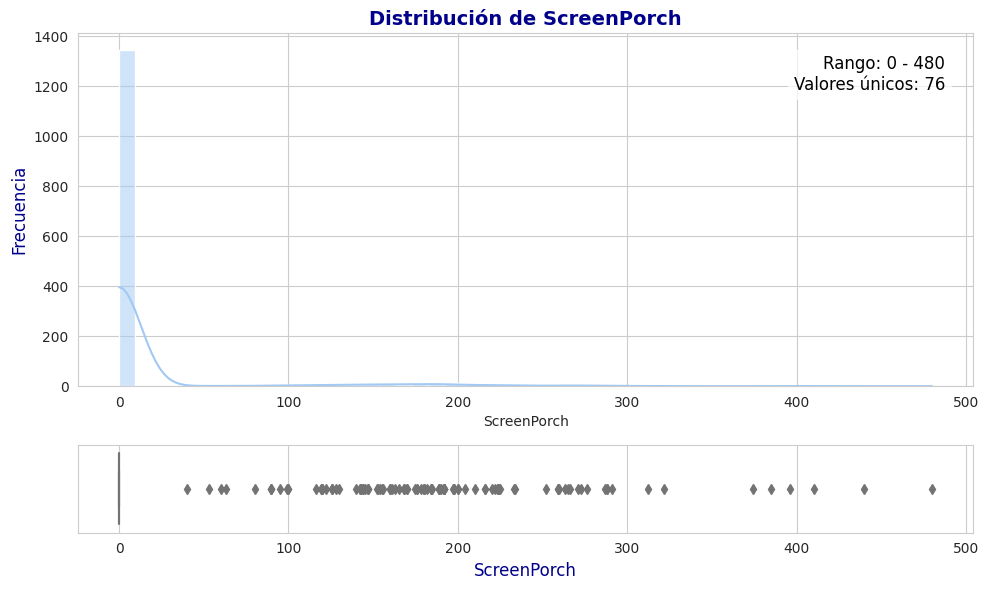

In [98]:
analizar_columna_num(name_col_num[32], datos_num)

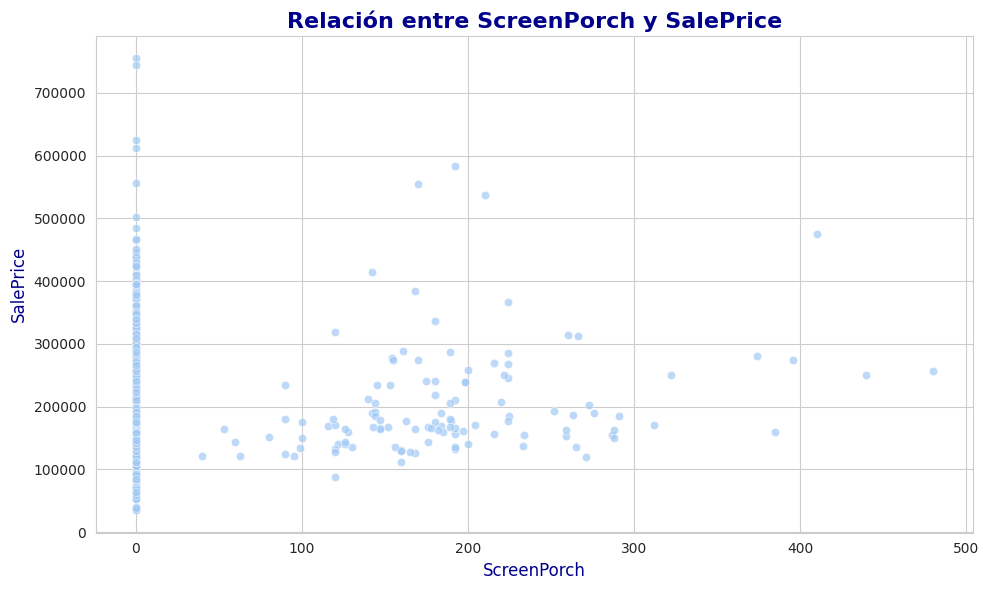

In [99]:
graficar_scatterplot(datos_num, name_col_num[32])

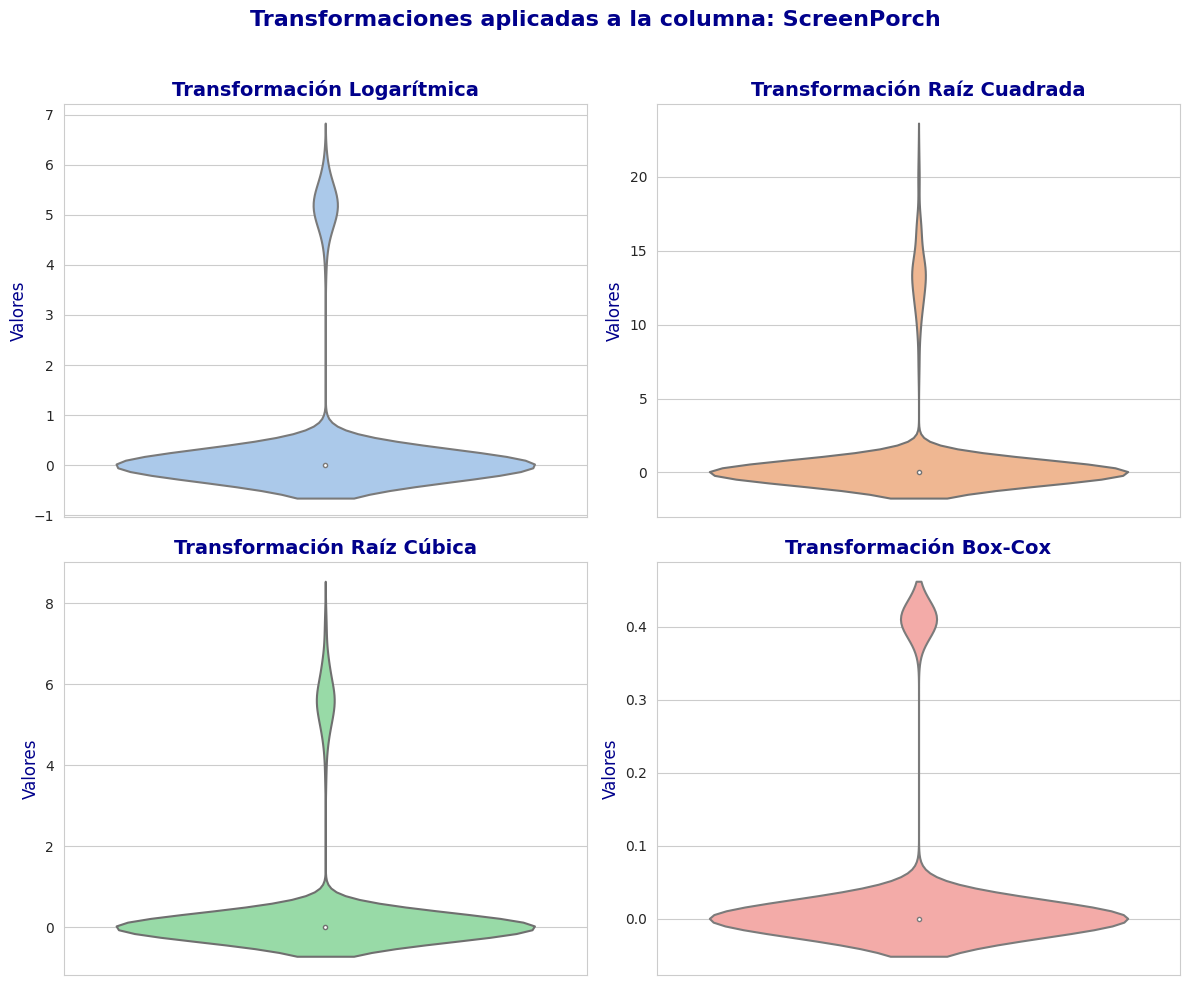

In [100]:
transformar_y_graficar_violin(datos_num, name_col_num[32])

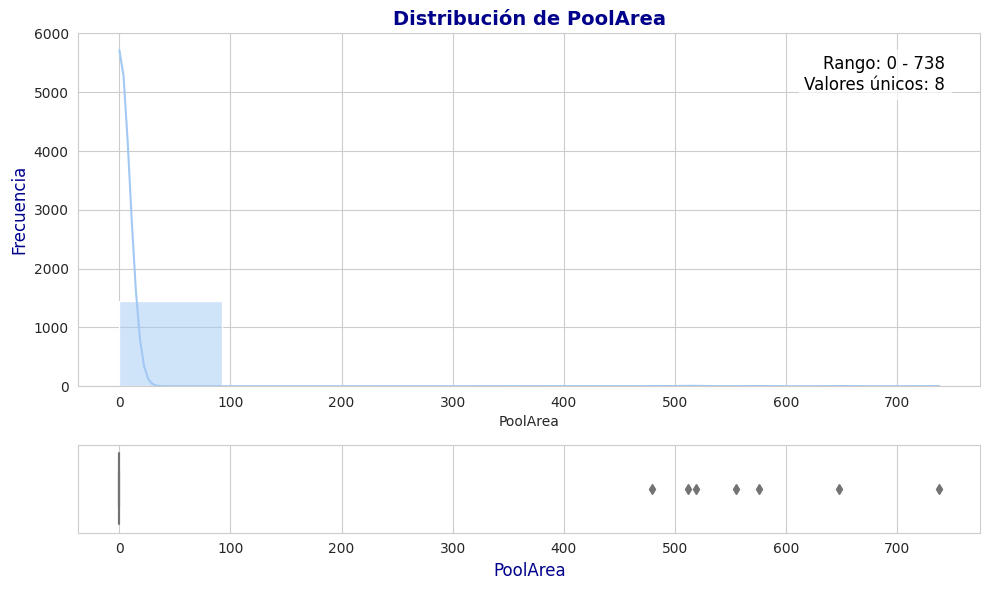

In [101]:
analizar_columna_num(name_col_num[33], datos_num)

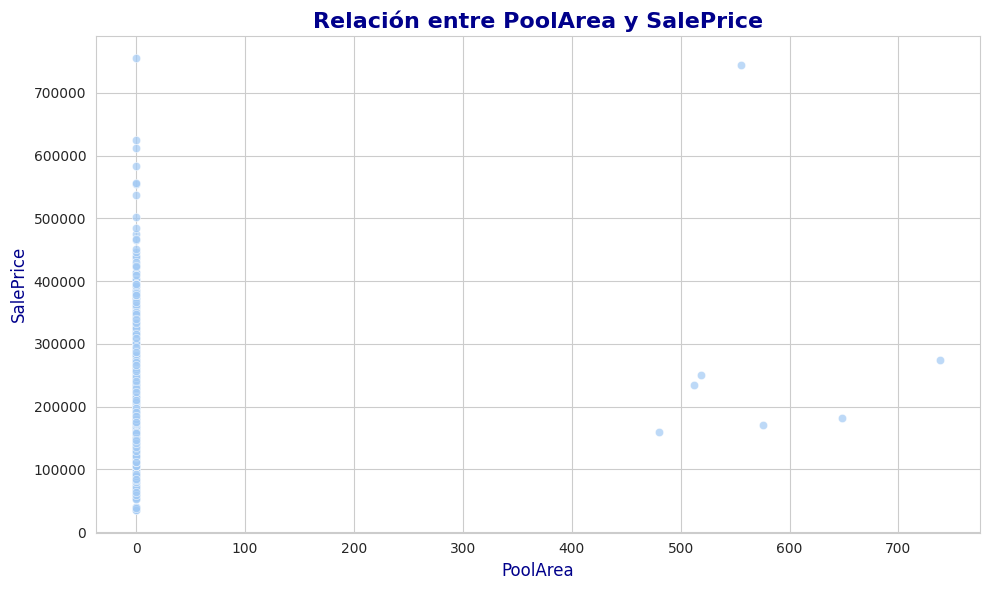

In [102]:
graficar_scatterplot(datos_num, name_col_num[33])

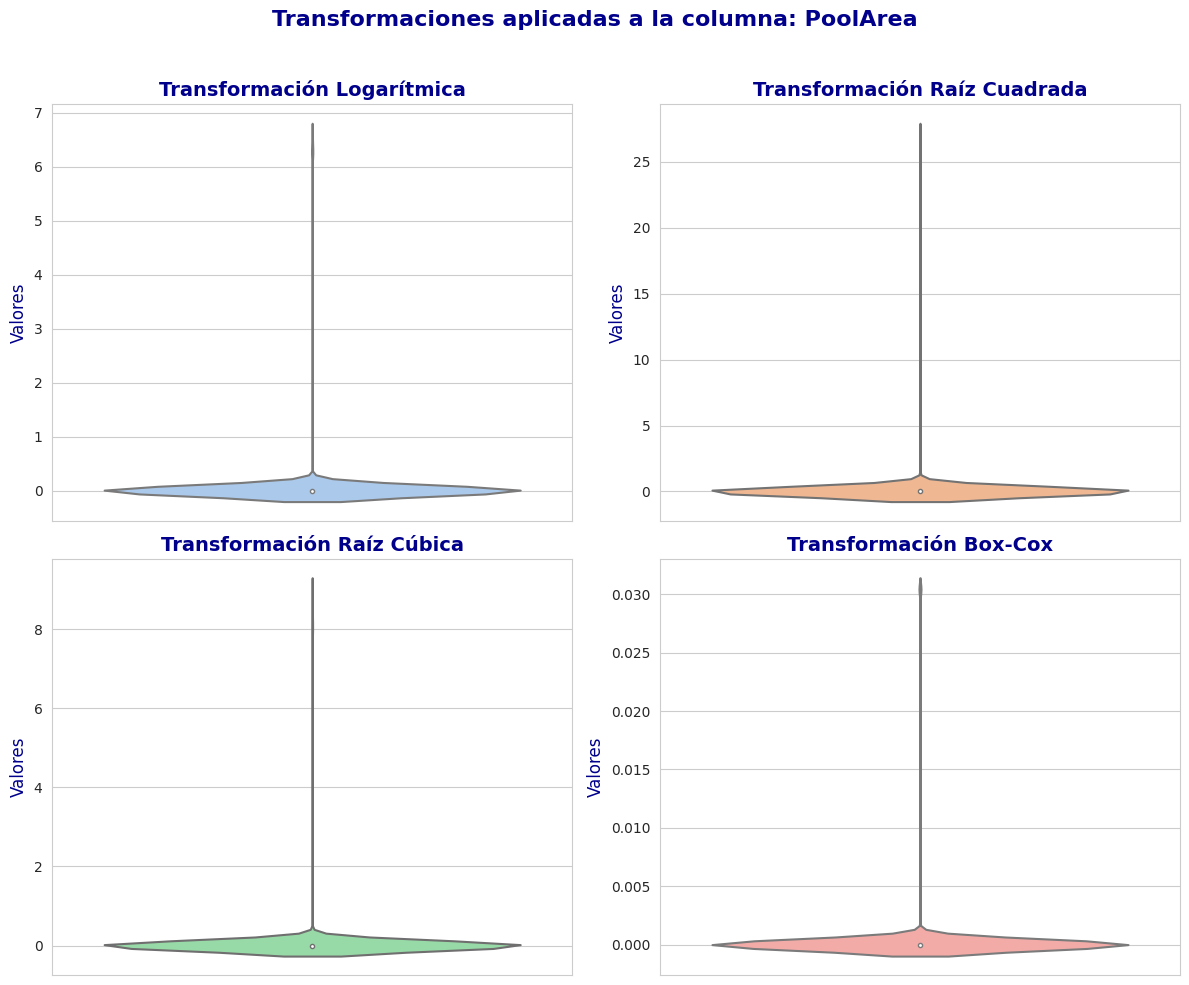

In [103]:
transformar_y_graficar_violin(datos_num, name_col_num[33])

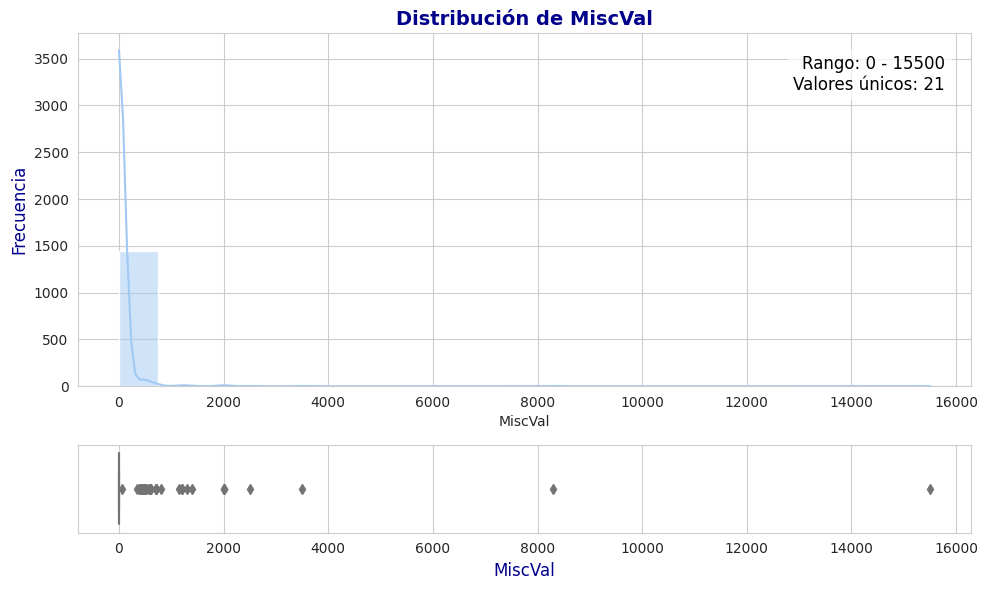

In [104]:
analizar_columna_num(name_col_num[34], datos_num)

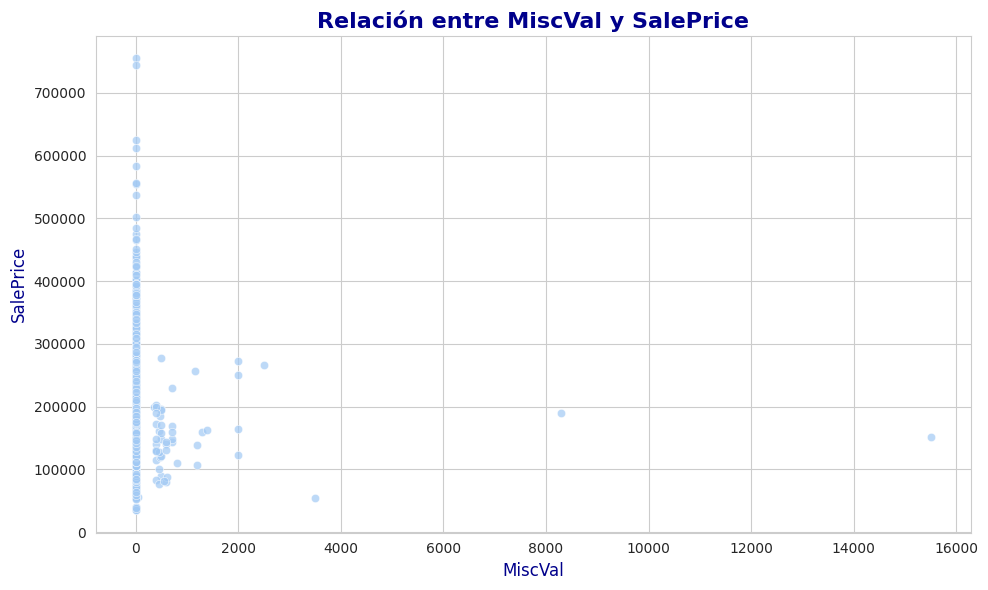

In [105]:
graficar_scatterplot(datos_num, name_col_num[34])

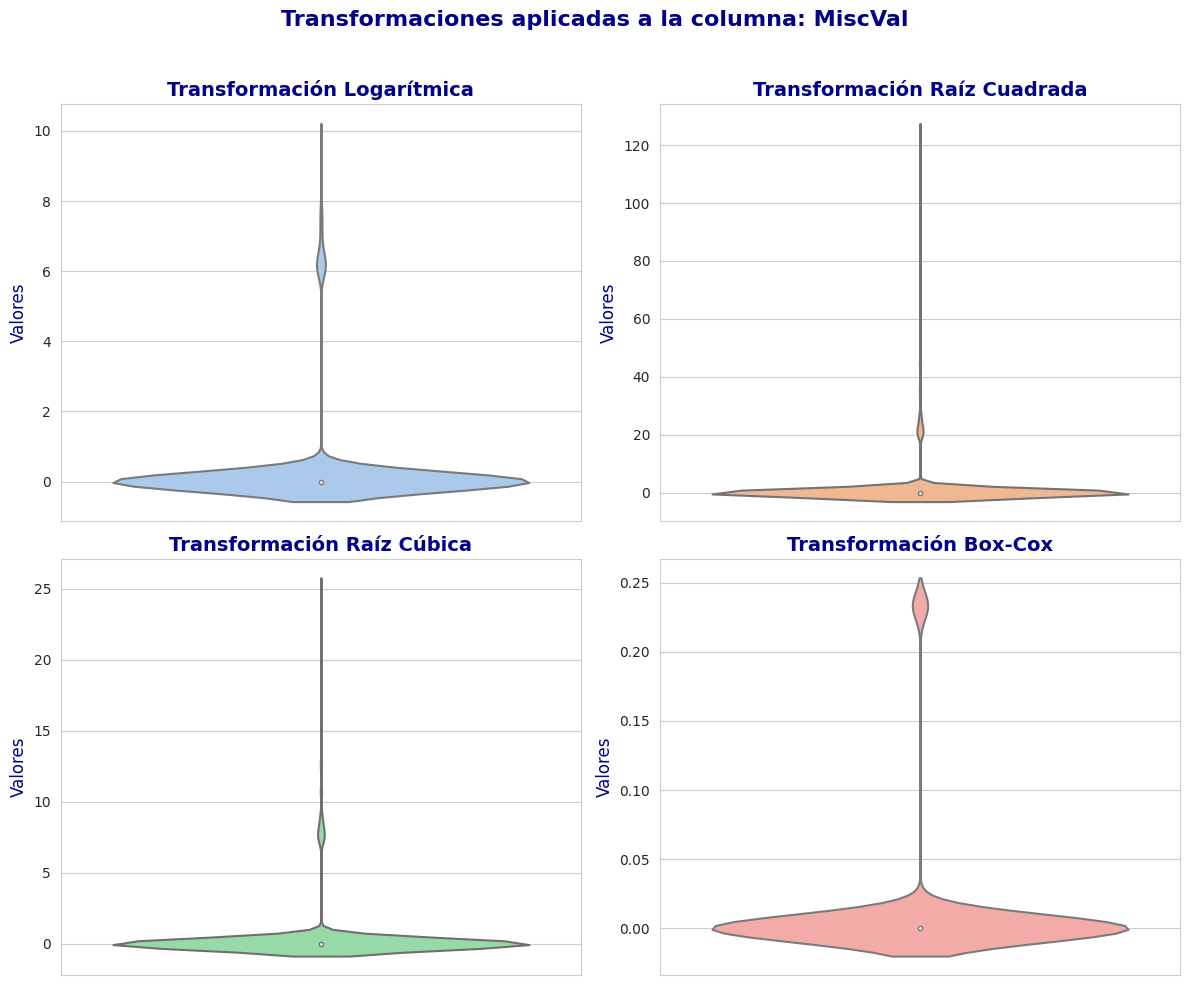

In [106]:
transformar_y_graficar_violin(datos_num, name_col_num[34])

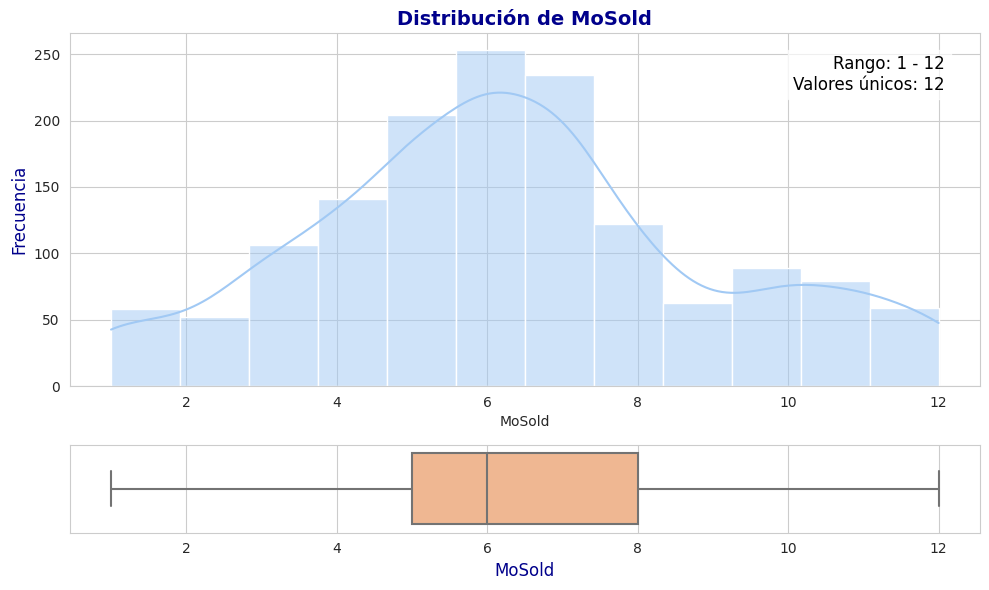

In [107]:
analizar_columna_num(name_col_num[35], datos_num)

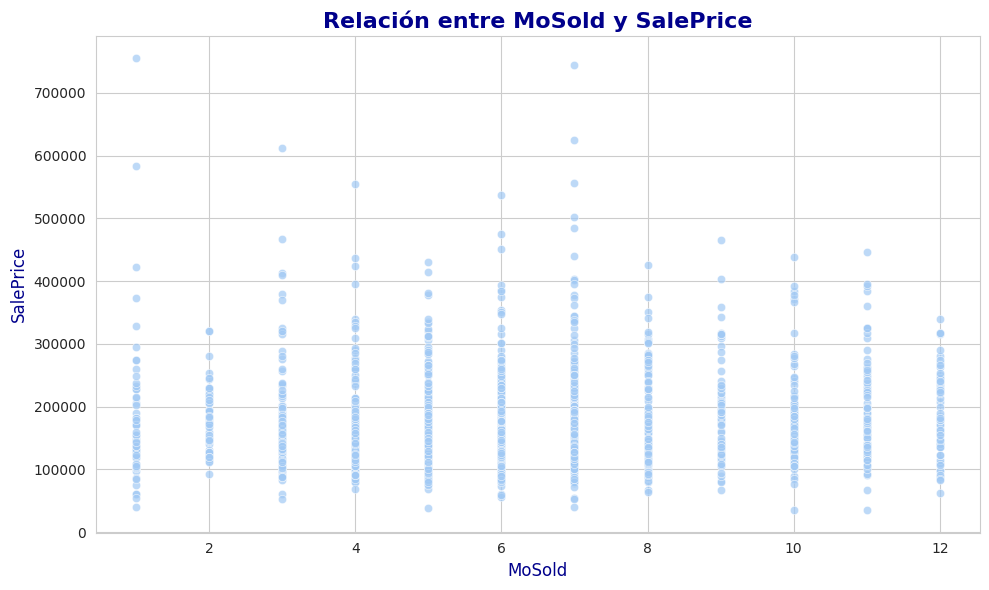

In [108]:
graficar_scatterplot(datos_num, name_col_num[35])

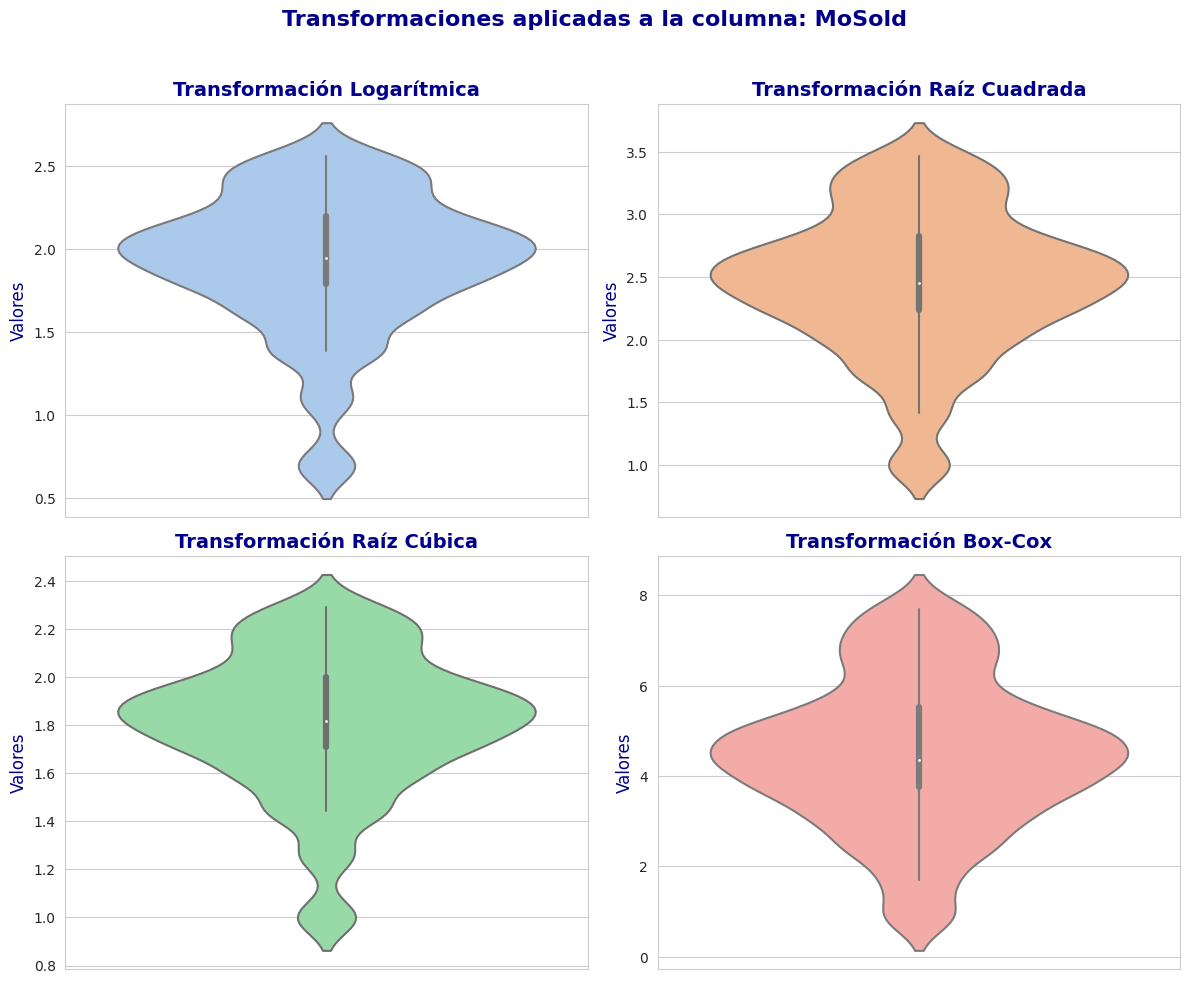

In [109]:
transformar_y_graficar_violin(datos_num, name_col_num[35])

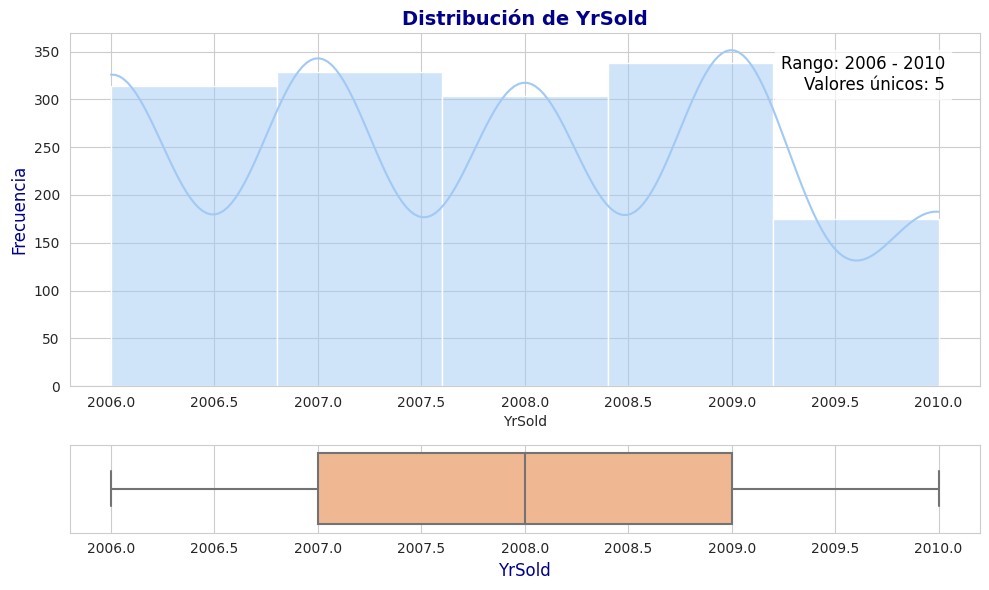

In [110]:
analizar_columna_num(name_col_num[36], datos_num)

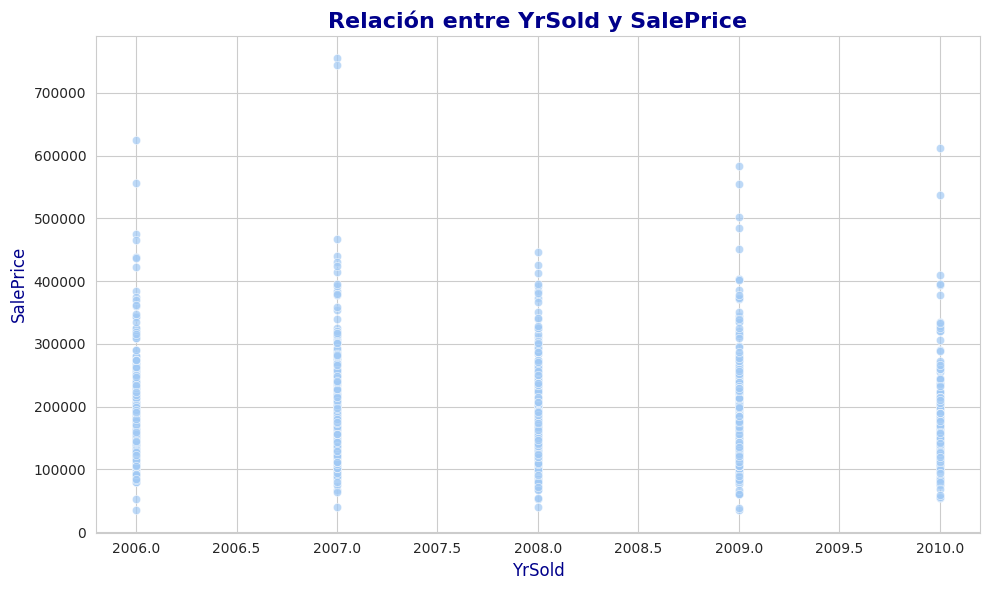

In [111]:
graficar_scatterplot(datos_num, name_col_num[36])

/home/denis/Documentos/VSCode/environments/RL/lib/python3.10/site-packages/scipy/stats/_morestats.py:935: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
/home/denis/Documentos/VSCode/environments/RL/lib/python3.10/site-packages/scipy/optimize/_optimize.py:2416: RuntimeWarning: invalid value encountered in scalar subtract
  tmp1 = (x - w) * (fx - fv)
/home/denis/Documentos/VSCode/environments/RL/lib/python3.10/site-packages/scipy/optimize/_optimize.py:2417: RuntimeWarning: invalid value encountered in scalar subtract
  tmp2 = (x - v) * (fx - fw)


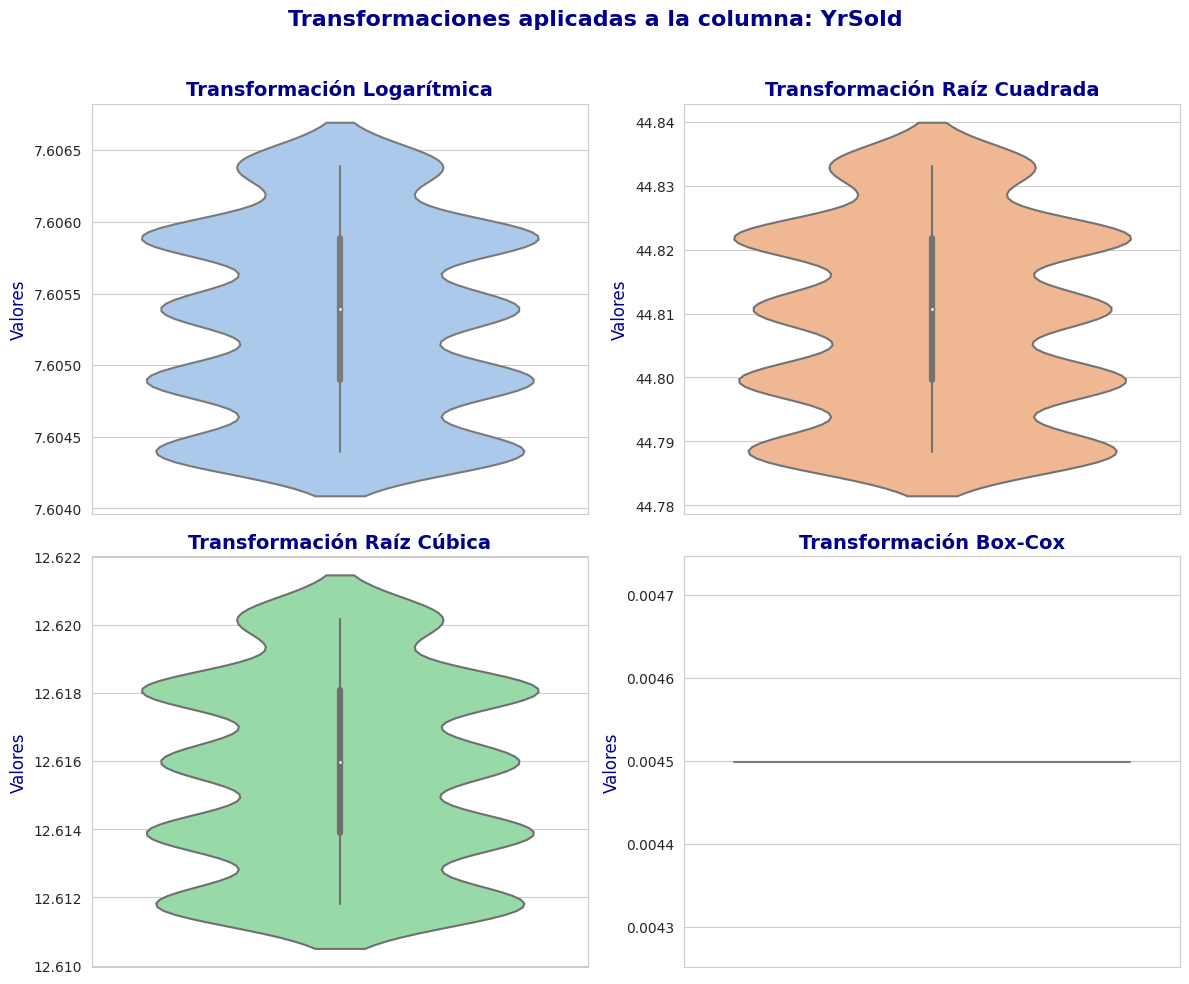

In [112]:
transformar_y_graficar_violin(datos_num, name_col_num[36])

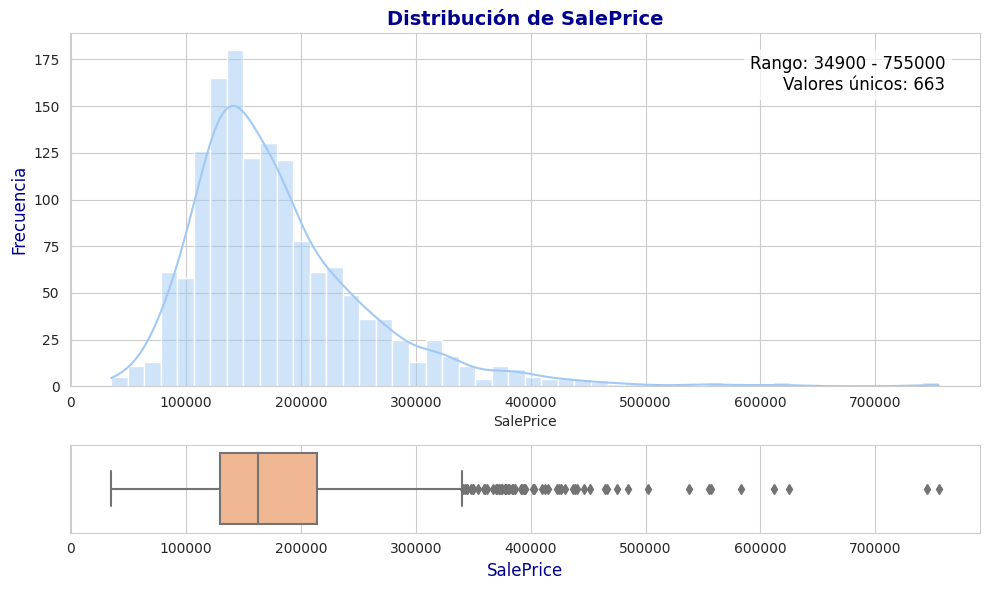

In [113]:
analizar_columna_num(name_col_num[37], datos_num)

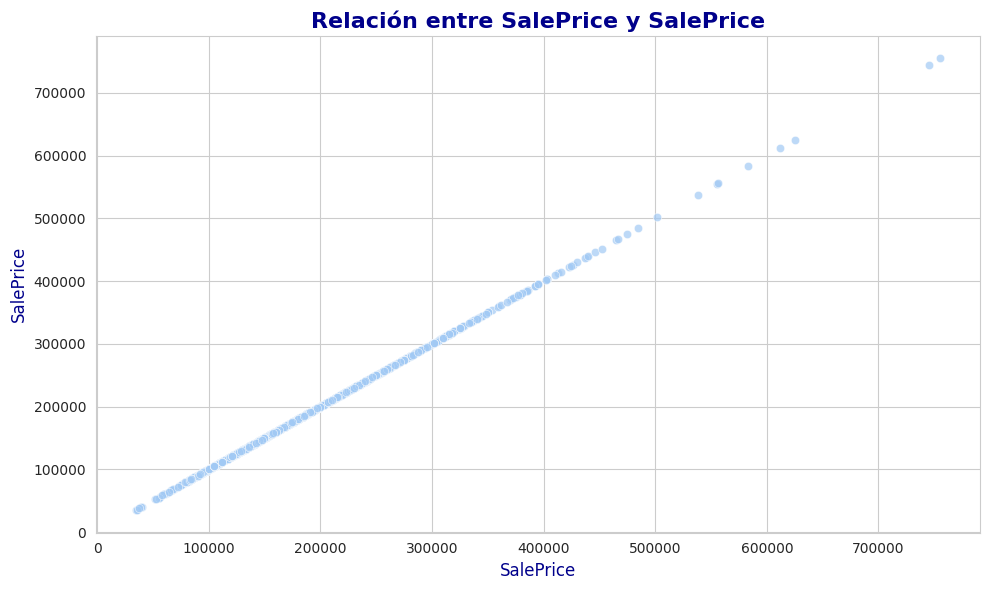

In [114]:
graficar_scatterplot(datos_num, name_col_num[37])

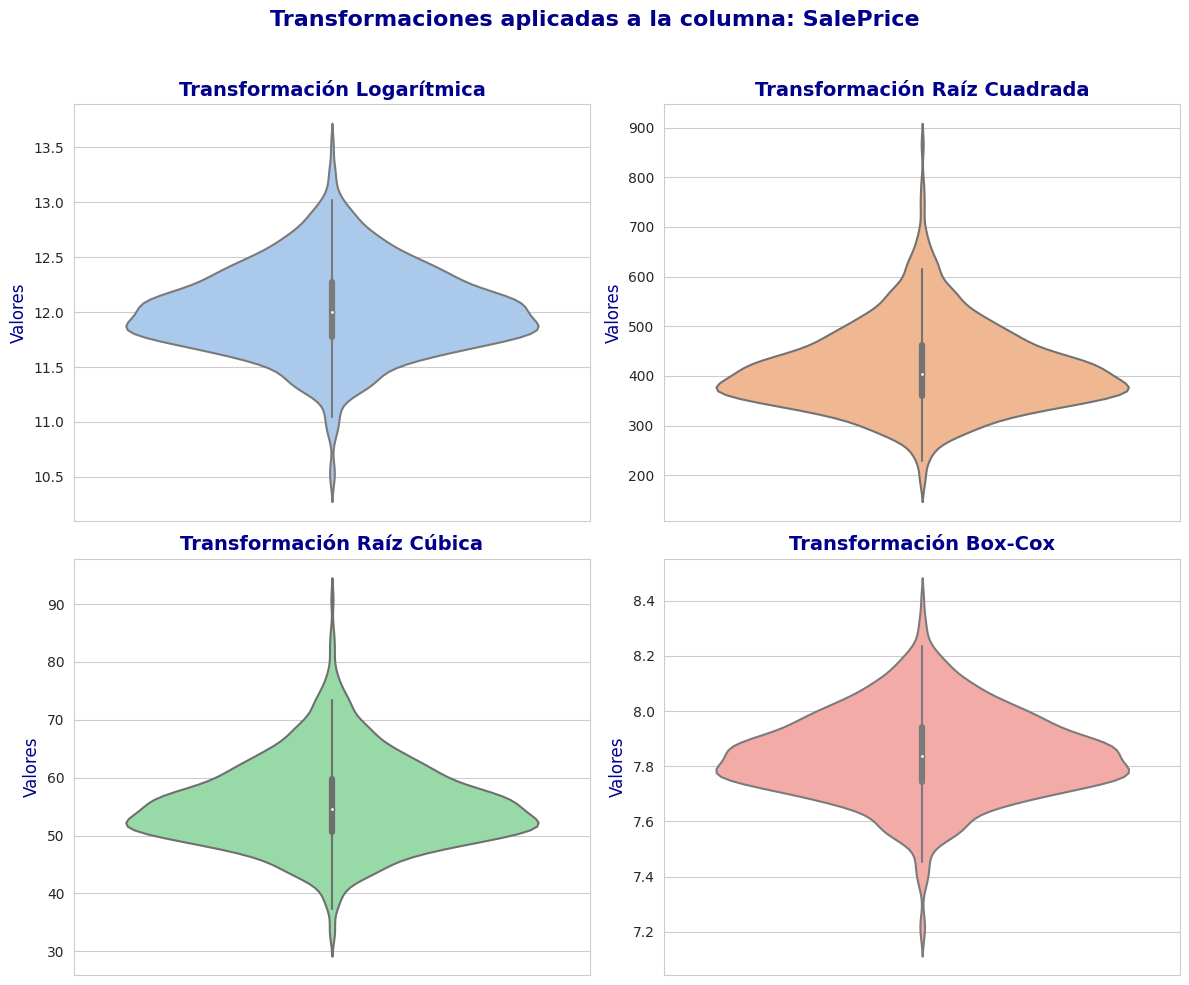

In [115]:
transformar_y_graficar_violin(datos_num, name_col_num[37])

## Variables Categóricas

## Variable Objetivo

## Relación entre Variables

# Conclución

#### Datos Faltantes

> Existen varias variables con un alto porcentaje de datos faltantes o nulos. Algunas de ellas serán eliminadas debido a su elevado porcentaje de ausencia, mientras que aquellas con un menor porcentaje de datos faltantes podrán ser imputadas, dependiendo de su importancia en el modelo.

variables a categorizar:
* **MSSubClass**
* **OverallQual**
* **OverallCond**
* **LowQualFinSF**
* **BsmtFullBath**
* **BsmtHalfBath**
* **FullBath**
* **HalfBath**

variables a agrupar categorias con margen de tolerancia:
* **MSSubClass**

variables para aplicar transformacion:
* **LotFrontage** (Logarítmica, Raíz Cúbica)
* **LotArea** (Logarítmica, Box-Cox)
* **MasVnrArea** (logarítmica, Raíz Cúbica)
* **BsmtFinSF1** (logarítmica, Raíz Cúbica, Box-Cox)
* **BsmtFinSF2** (logarítmica, Box-Cox)
* **TotalBsmtSF** (Raíz Cuadrada, Raíz Cúbica)
* **1stFlrSF** (Logarítmica, Box-Cox)
* **2ndFlrSF** (Logarítmica, Box-Cox)
* **GrLivArea** (Logarítmica, Box-Cox)

variables que no es necesario realizar ninguna transformacion:
* **YearBuilt**
* **YearRemodAdd**
* **BsmtUnfSF**